# **E-retail factors for customer activation and retention: A case study from Indian e-commerce customers**

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

### **Importing the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('customer_retention_dataset.xlsx','datasheet')
dfencoded = pd.read_excel('customer_retention_dataset.xlsx','codedsheet')

In [ ]:
df.head()

1Gender of respondent  ... Which of the Indian online retailer would you recommend to a friend?
0                  Male  ...                                       Flipkart.com                  
1                Female  ...                              Amazon.in, Myntra.com                  
2                Female  ...                   Amazon.in, Paytm.com, Myntra.com                  
3                  Male  ...                            Amazon.in, Flipkart.com                  
4                Female  ...                              Amazon.in, Myntra.com                  

[5 rows x 71 columns]

In [ ]:
dfencoded.head()

1Gender of respondent  ...  Which of the Indian online retailer would you recommend to a friend?
0                      0  ...                                       Flipkart.com                   
1                      1  ...                              Amazon.in, Myntra.com                   
2                      1  ...                   Amazon.in, Paytm.com, Myntra.com                   
3                      0  ...                            Amazon.in, Flipkart.com                   
4                      1  ...                              Amazon.in, Myntra.com                   

[5 rows x 71 columns]

## **Pre-Processing**

### **rename the columns**

In [4]:
# Let's rename the new column names to the original datastes

columns = ['gender','age','city','pinCode','shoppingSince','shoppingFrequency','internetAccessibility','deviceUsed',
           'screenSize','OS', 'browserUsed','channelFirstUsed','loginMode','timeSpentDeciding','paymentMode','cancellingFrequency',
          'cancellationReason','contentReadability','similarProductInfo','sellerProductInfo','productInfoClarity','navigationEase',
          'loadingProcessingSpeed','userFrienlyInterface','conveninetPaymentMode','timelyFulfilmentTrust','custSupportResponse',
          'custPrivacyGuarantee','variousChannelResponses','benefit','enjoy','convenience','returnReplacementPolicy','loyaltyProgramsAccess',
          'infoSatisfaction','siteQualitySatisfaction','netBenefitSatisfaction','trust','productSeveralCategory','relevantProductInfo','monetarySavings',
          'patronizingConvenience','adventureSense','socialStatus','gratification','roleFulfilment','moneyWorthy','shoppedFrom','easyWebApp',
           'visuallyAppealingWebApp','productVariety','completeProductInfo','fastWebApp','reliableWebApp','quickPurchase','paymentOptionsAvailability',
           'fastDelivery','custInfoPrivacy','finInfoSecurity','perceivedTrustworthiness','multiChannelAssistance','longLoginTime','longDisplayTime',
           'latePriceDeclare','longLoadingTime','limitedPaymentMode','lateDelivery','webAppDesignChange','pageDisruption','webAppEfficiency',
           'recommendation']

df.columns = columns
dfencoded.columns = columns

In [ ]:
df.head()

gender  ...                    recommendation
0    Male  ...                      Flipkart.com
1  Female  ...             Amazon.in, Myntra.com
2  Female  ...  Amazon.in, Paytm.com, Myntra.com
3    Male  ...           Amazon.in, Flipkart.com
4  Female  ...             Amazon.in, Myntra.com

[5 rows x 71 columns]

In [ ]:
df.isnull().sum()

gender                0
age                   0
city                  0
pinCode               0
shoppingSince         0
                     ..
lateDelivery          0
webAppDesignChange    0
pageDisruption        0
webAppEfficiency      0
recommendation        0
Length: 71, dtype: int64

In [ ]:
encoded_data.isnull().sum()

gender                0
age                   0
city                  0
pinCode               0
shoppingSince         0
                     ..
lateDelivery          0
webAppDesignChange    0
pageDisruption        0
webAppEfficiency      0
recommendation        0
Length: 71, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   gender                      269 non-null    object
 1   age                         269 non-null    object
 2   city                        269 non-null    object
 3   pinCode                     269 non-null    int64 
 4   shoppingSince               269 non-null    object
 5   shoppingFrequency           269 non-null    object
 6   internetAccessibility       269 non-null    object
 7   deviceUsed                  269 non-null    object
 8   screenSize                  269 non-null    object
 9   OS                          269 non-null    object
 10  browserUsed                 269 non-null    object
 11  channelFirstUsed            269 non-null    object
 12  loginMode                   269 non-null    object
 13  timeSpentDeciding           269 non-null    object

In [ ]:
dfencoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   gender                      269 non-null    int64 
 1   age                         269 non-null    int64 
 2   city                        269 non-null    object
 3   pinCode                     269 non-null    int64 
 4   shoppingSince               269 non-null    int64 
 5   shoppingFrequency           269 non-null    int64 
 6   internetAccessibility       269 non-null    int64 
 7   deviceUsed                  269 non-null    int64 
 8   screenSize                  269 non-null    int64 
 9   OS                          269 non-null    int64 
 10  browserUsed                 269 non-null    int64 
 11  channelFirstUsed            269 non-null    int64 
 12  loginMode                   269 non-null    int64 
 13  timeSpentDeciding           269 non-null    int64 

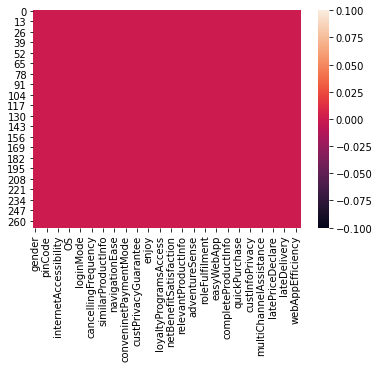

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull());

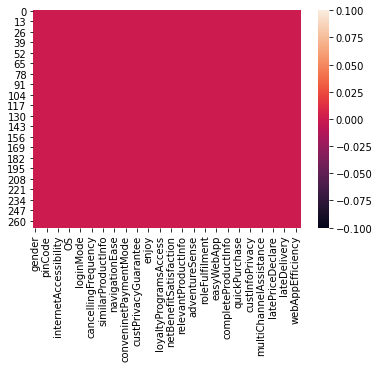

In [ ]:
import seaborn as sns
sns.heatmap(dfencoded.isnull());

In [5]:
df.replace('indifferent (3)','Indifferent (3)',inplace=True)
df.replace('indifferent  (3)','Indifferent (3)',inplace=True)
df.replace('Dis-agree (2)','Disagree (2)',inplace=True)

## **DATA VISUALIZATION**

In [ ]:
for i in df.columns:
  print(df[i].value_counts())
  print("-------------------------------")

Female    181
Male       88
Name: gender, dtype: int64
-------------------------------
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: age, dtype: int64
-------------------------------
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: city, dtype: int64
-------------------------------
201308    38
132001    19
201310    18
110044    16
173212     9
250001     9
173229     9
560037     8
132036     8
560010     8
122018     8
110011     7
201306     7
110008     7
110014     6
110018     6
244001     5
201312     5
530068     5
201305     5
201009     5
201008     5
201005     4
201001     4
201304     4
110039     4
110030     4
110009     4
560018     4
560003     4
122009     4
560002     4
110042     4
201303     4
560013     3


Text(0.5, 1.0, 'Gender')

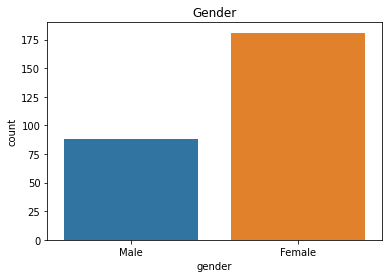

In [6]:
sns.countplot(df['gender'])
plt.title('Gender')

**INFERENCE**: we can see that female shop online higher than male.

In [5]:
import plotly.express as px

In [ ]:
city_count = pd.DataFrame(df['city'].value_counts()).reset_index()
city_count.columns = ['city','count']
fig = px.bar(city_count, x='city',y='count',
           color='city',
           title = 'Online Shopping is preferred in which cities?')
fig.show()

**INFERENCE:** People from Delhi, Greater Noida and Noida shop frequently when compared to Merrut,Moradabad and Bulandshahr.

In [ ]:
dataset = df[['age','city','gender']]

fig = px.histogram(dataset,x='city',color='gender',title='Online shopping in cities based on Gender:')
fig.show()

**INFERENCE:** Only In Delhi and Noida Male shopers are higher when compared to other city.

In [6]:
fig = px.histogram(df,x='city',color='age',title='Online shopping in cities based on various age groups : ')
fig.show()

**INFERENCE:**

 In city like Bangalore and Karnal Young people(21-30) shop higher. 

In city like Delhi,Noida, Greater Noida Mid age(31-40) prople shop higher.

And In city like Solan we can see that kids and teen age(under 20) people shop higher.

In [11]:
fig = px.histogram(df,x='shoppingFrequency',color='shoppingSince',
                   color_discrete_map={'Above 4 years':'#40E0D0','3-4 years':'#DE3163','2-3 years':'#FF7F50',
                                       'Less than 1 year':'#FFBF00','1-2 years':'#DFFF00'})
fig.update_layout(title='Shopping frequency of people in past one year : ', title_x=0.5)
            
fig.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
reasons = pd.DataFrame(df['cancellationReason'].value_counts()).reset_index()
reasons.columns = ['Reason','Count']

fig = go.Figure(go.Funnelarea(
    text = reasons['Reason'],
    values = reasons['Count'],
    marker = {"colors": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat"], "width": [0, 1, 5, 0, 4]}}
    ))

fig.update_layout(title = 'Reasons for not purchasing any product :',title_x=0.5)
fig.show()

**INFERENCE:** Reasons for not purchasing any product is Better alternative offer.

In [ ]:
df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

gender       age  ...  webAppEfficiency  recommendation
gender              1.000000  0.034475  ...         -0.035515       -0.085315
age                 0.034475  1.000000  ...          0.048604        0.337155
city                0.196291  0.163532  ...          0.160467        0.314567
pinCode             0.077270 -0.019154  ...          0.029517        0.164432
shoppingSince       0.037380  0.090323  ...          0.225815        0.029341
...                      ...       ...  ...               ...             ...
lateDelivery        0.070612  0.279299  ...          0.298125        0.522393
webAppDesignChange  0.067428  0.057116  ...          0.341939        0.055993
pageDisruption      0.020797 -0.087987  ...          0.455047        0.209739
webAppEfficiency   -0.035515  0.048604  ...          1.000000        0.025755
recommendation     -0.085315  0.337155  ...          0.025755        1.000000

[71 rows x 71 columns]

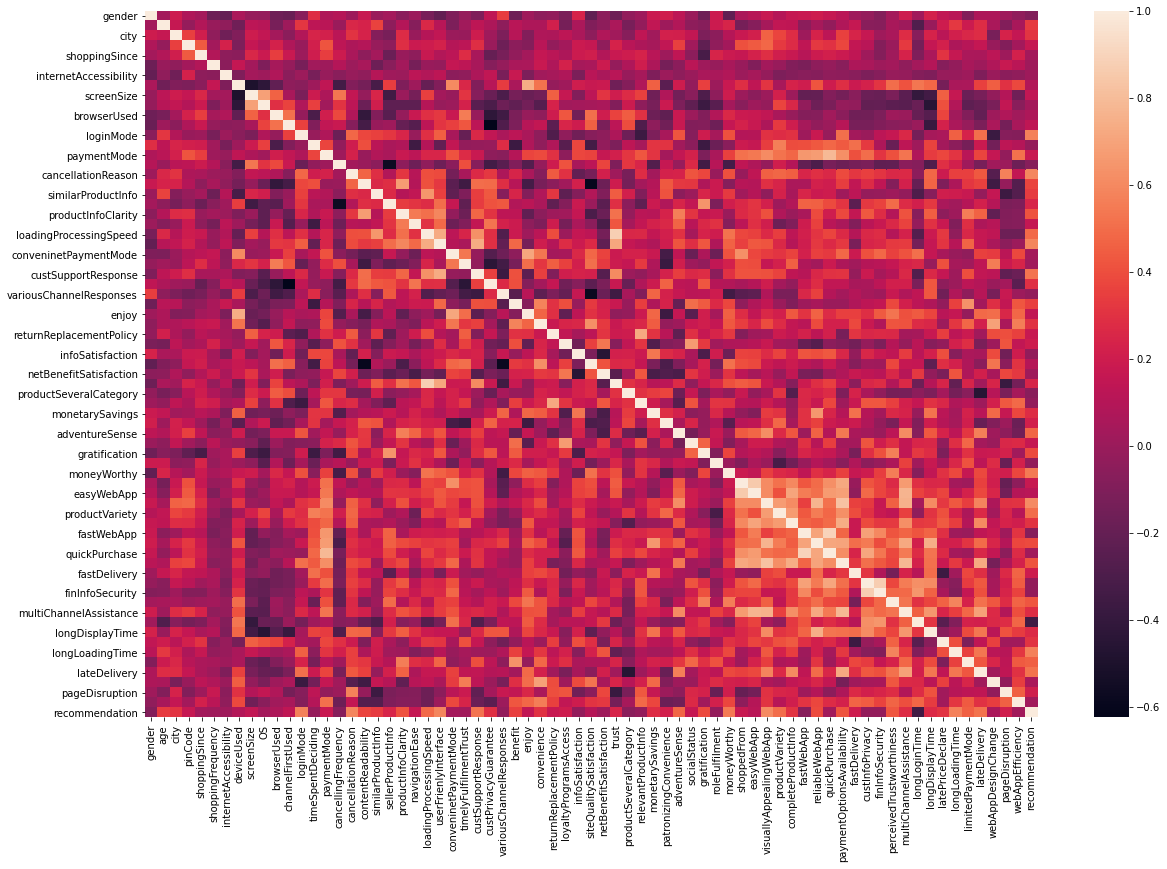

In [5]:
df_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
plt.figure(figsize=(20,13))
sns.heatmap(df_corr)
plt.show()

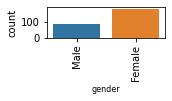

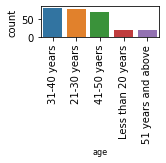

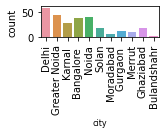

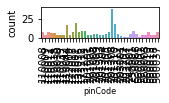

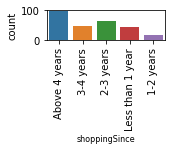

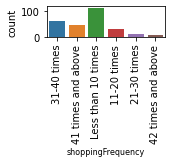

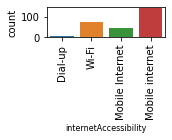

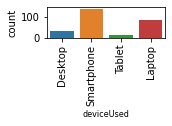

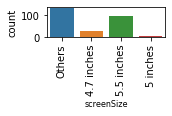

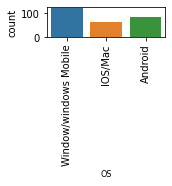

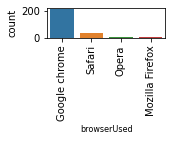

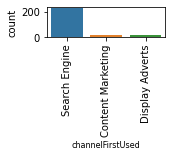

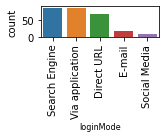

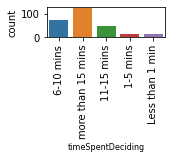

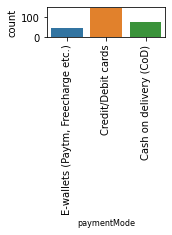

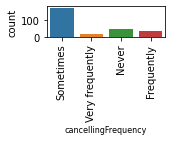

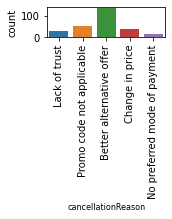

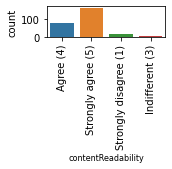

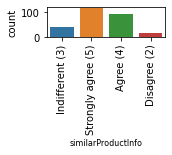

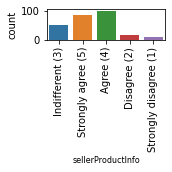

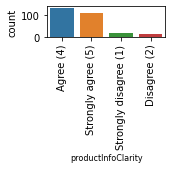

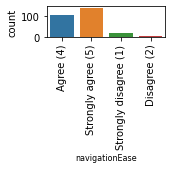

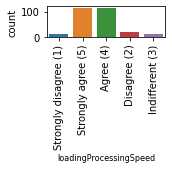

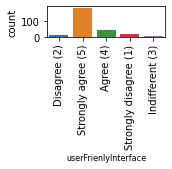

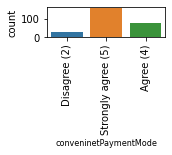

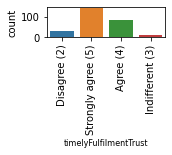

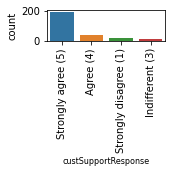

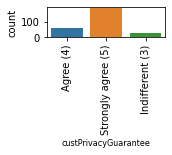

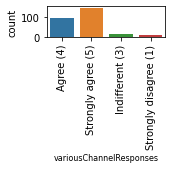

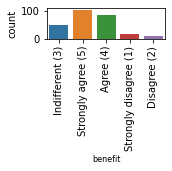

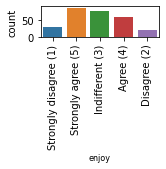

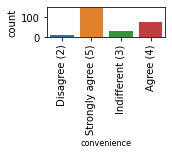

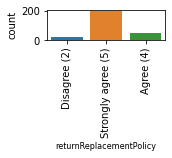

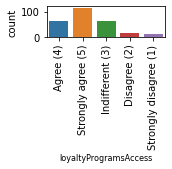

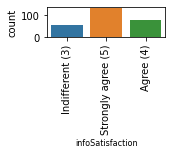

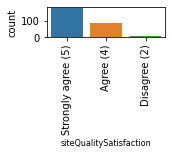

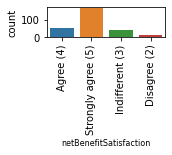

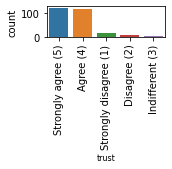

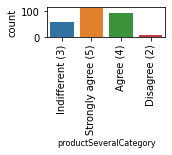

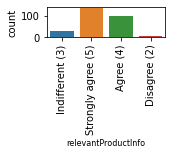

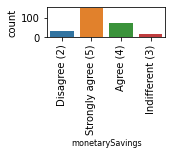

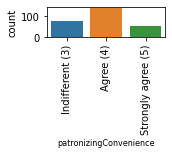

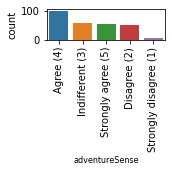

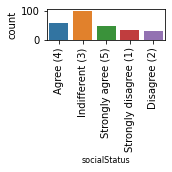

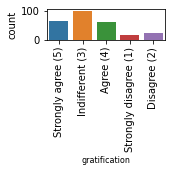

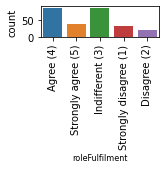

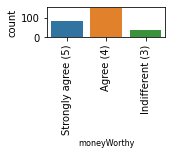

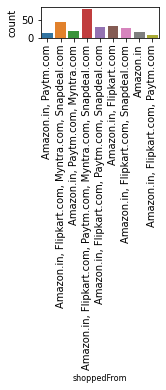

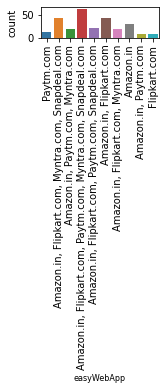

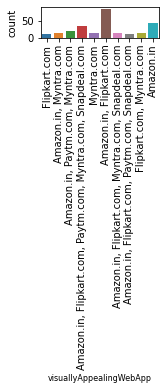

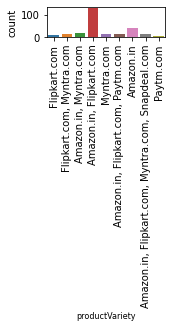

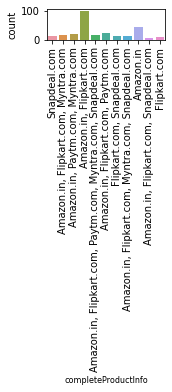

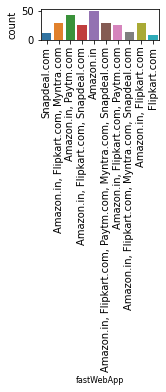

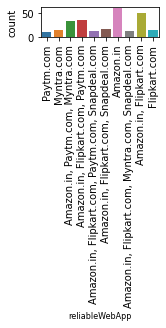

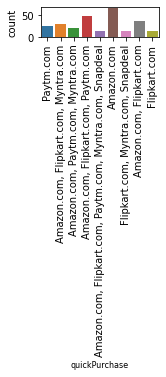

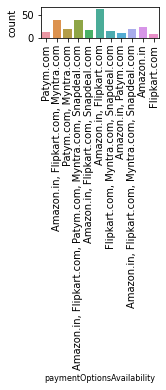

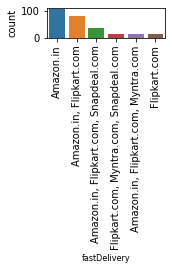

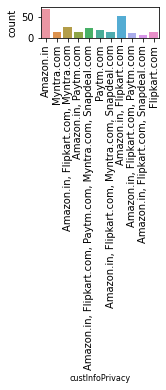

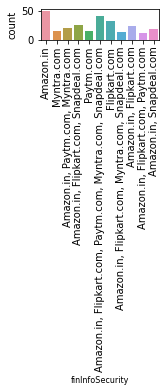

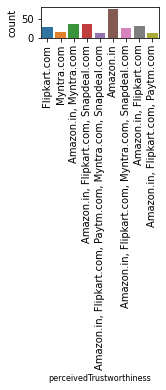

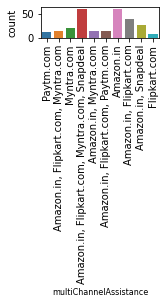

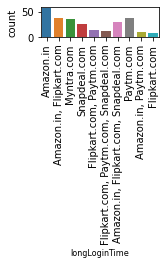

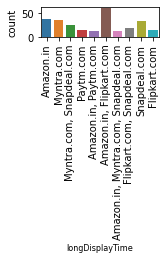

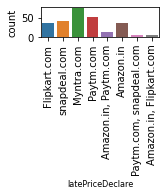

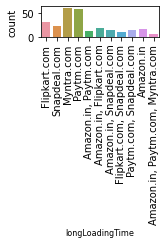

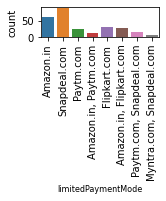

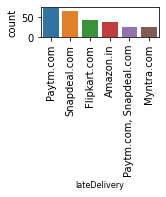

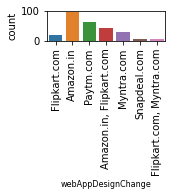

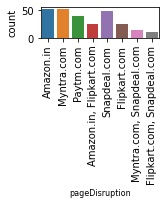

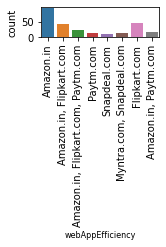

In [9]:
plotno=1
for column in df:  
    if plotno<=70:
        plt.figure(figsize=(25,10))
        ax=plt.subplot(15,10,plotno)
        plt.xticks(rotation = 90)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=8)
    plotno+=1
plt.show()

**INFERENCE:**

Age: 85% of the people are within age group 20-50 years. 

Very small percentage of people are less than 20 or more than 50 years old.

Delhi, Greater Noida, Noida and Bangalore have the maximum participants.

Maximum number of participants have been using Online Shopping platforms for more than 4 years.

Purchases in last 1 year: Maximum People have made purchases less than 10 times. Next in line are 30-40 and 40+

Most people use Mobile internet during shopping on-line.

Very few people use desktops or tablets; while most are using Smartphones and laptops.

A large percentage of people use Google Chrome.

Search Engines are the most used channel which guide people to their favourite online store.

Most people take purchase decision after spending more than 15 minutes.

Credit/Debit cards are the most used mode of payment.

Maximum people abondon the items in cart 'sometimes' as opposed to never or frequently.

The biggest reason to abandon is 'Better alternative offer.

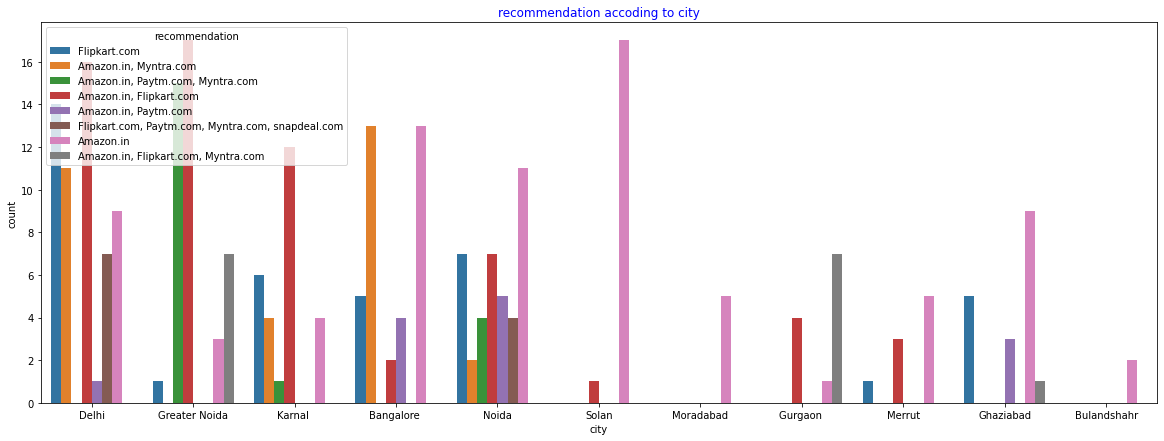

In [ ]:
plt.figure(figsize=(20,7))
plt.title('recommendation accoding to city',color='blue')
sns.countplot(x='city',data=df,hue='recommendation') 
plt.show()

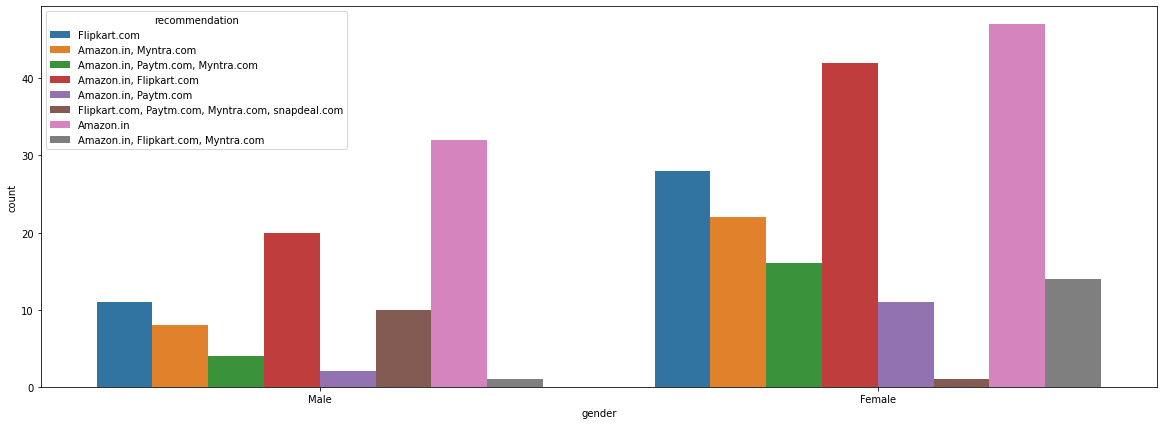

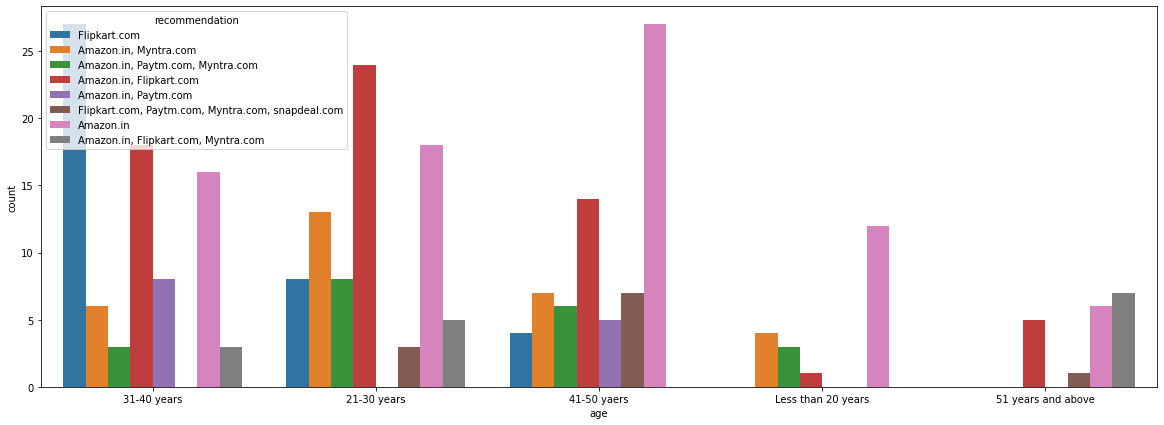

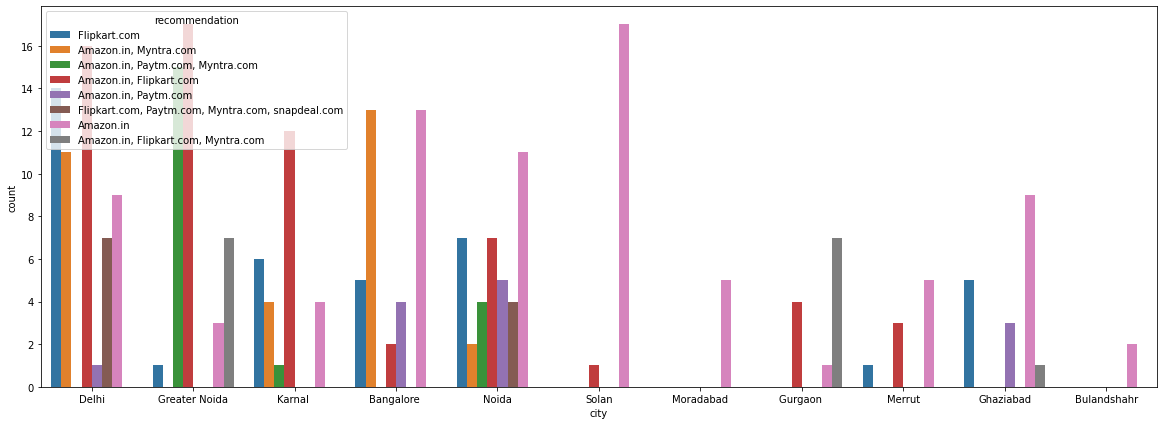

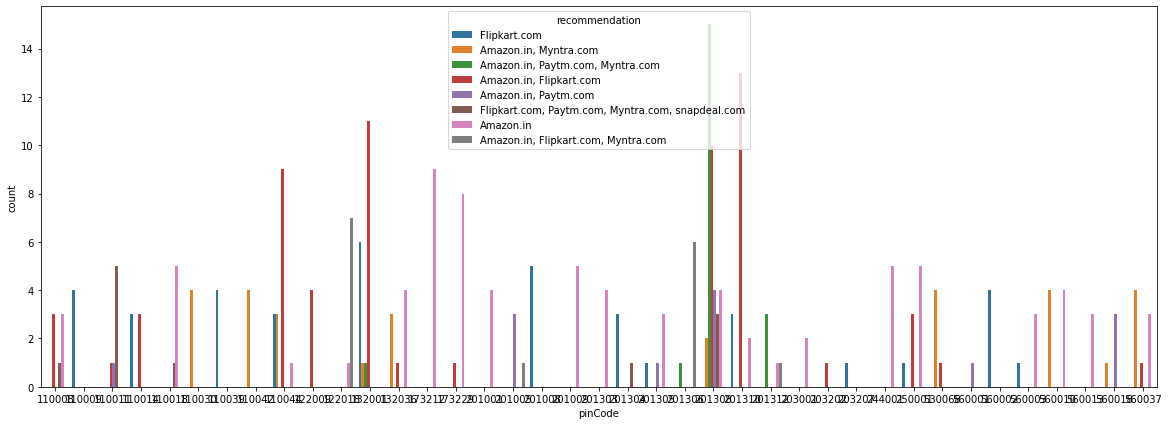

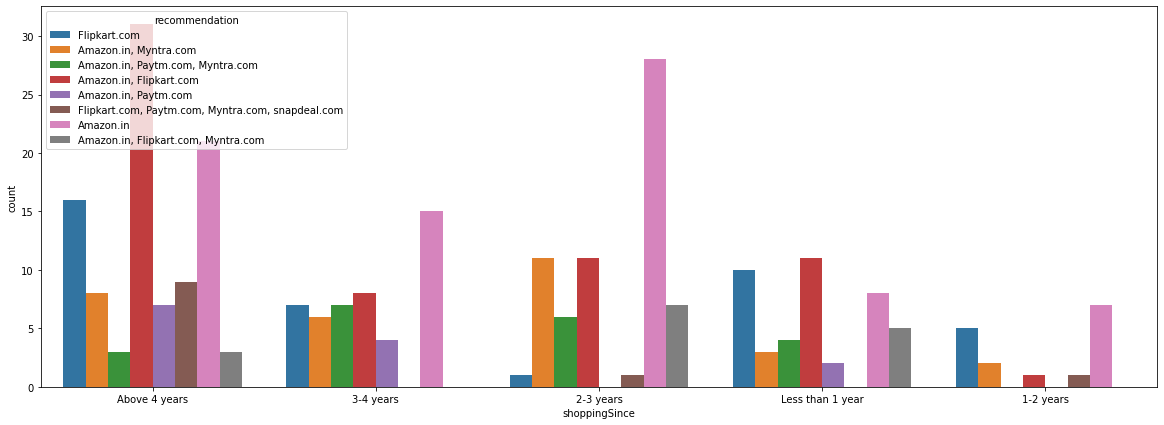

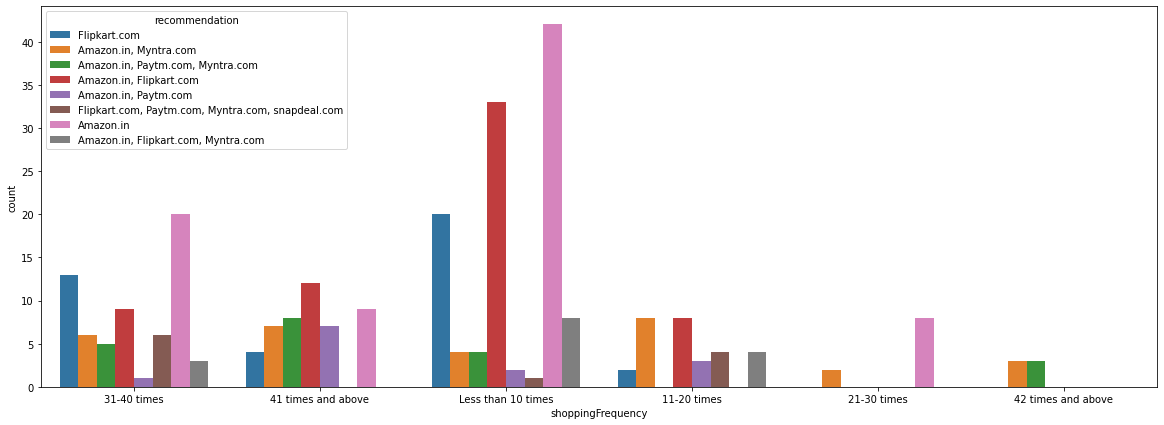

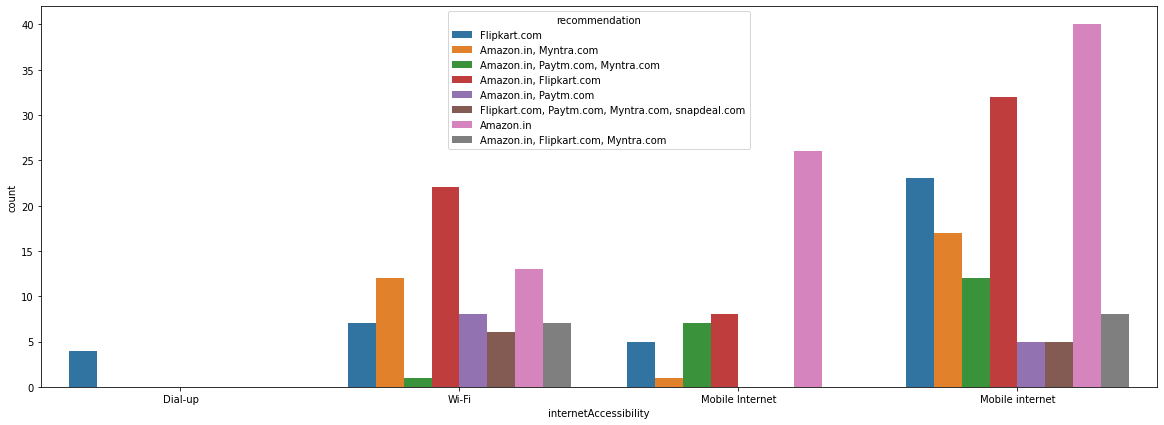

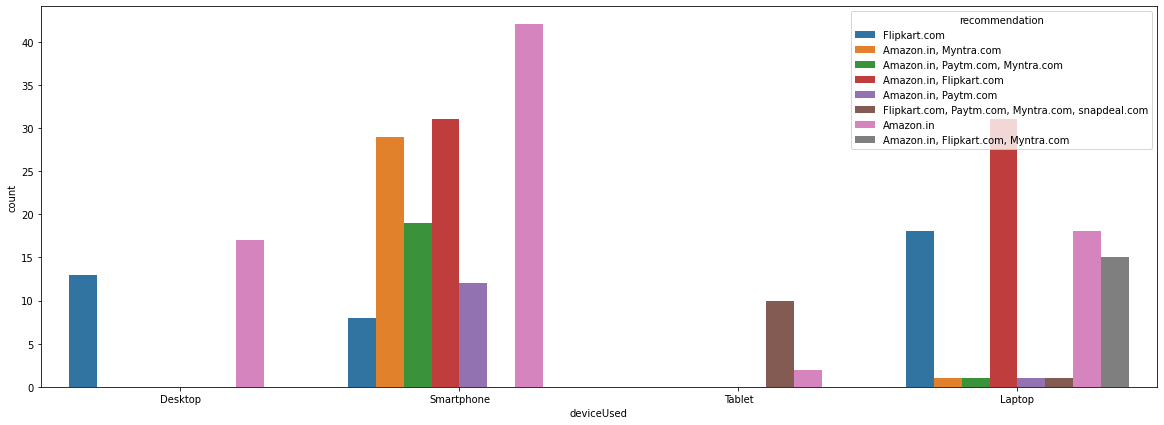

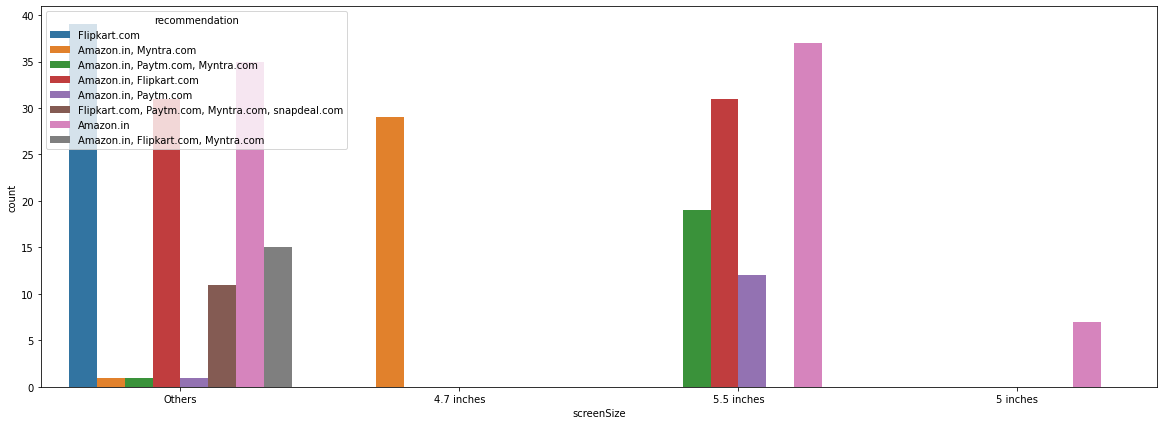

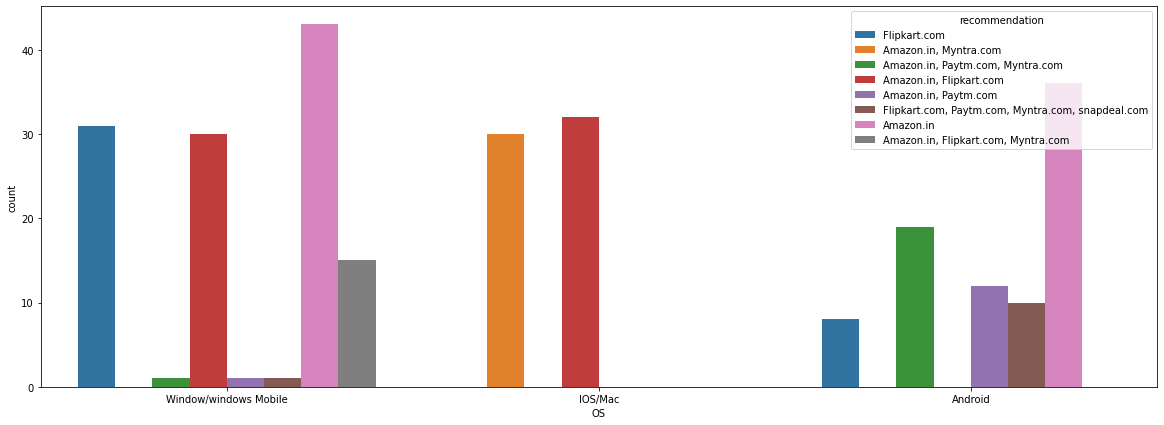

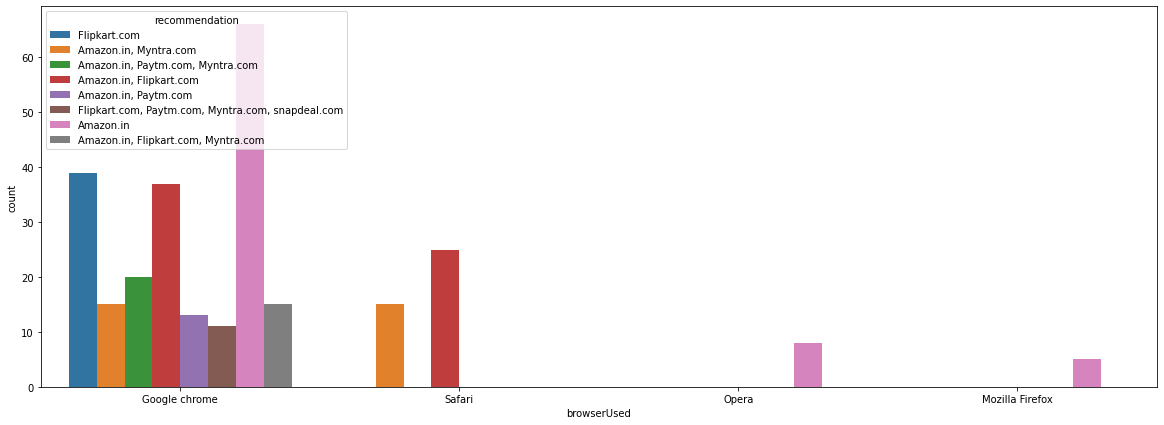

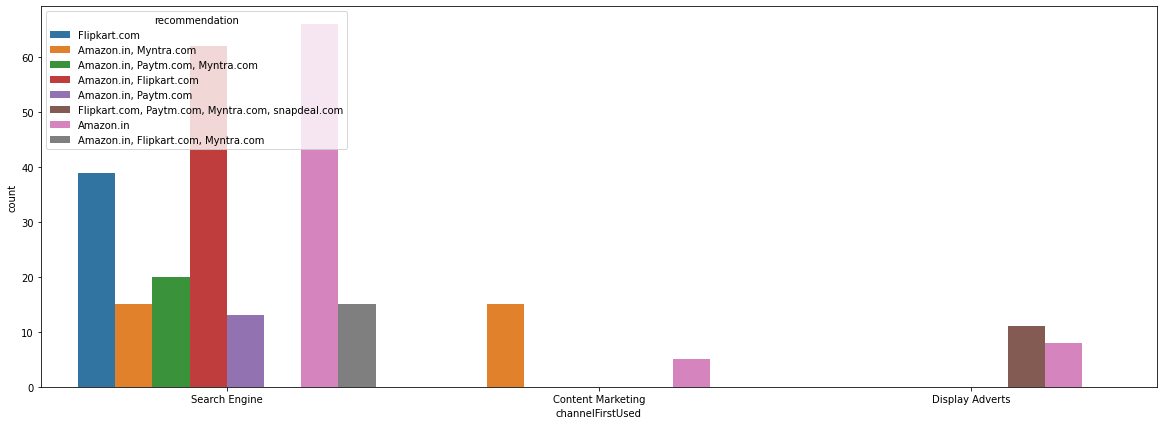

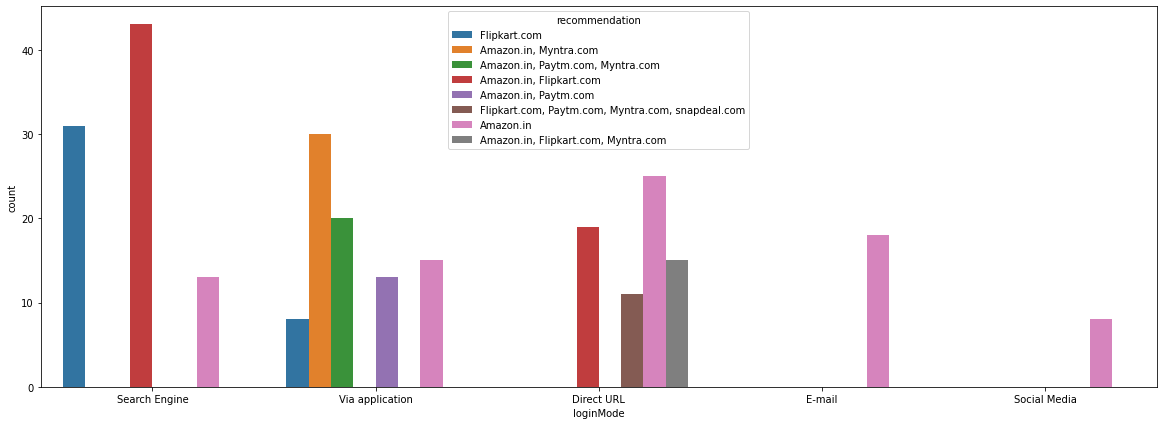

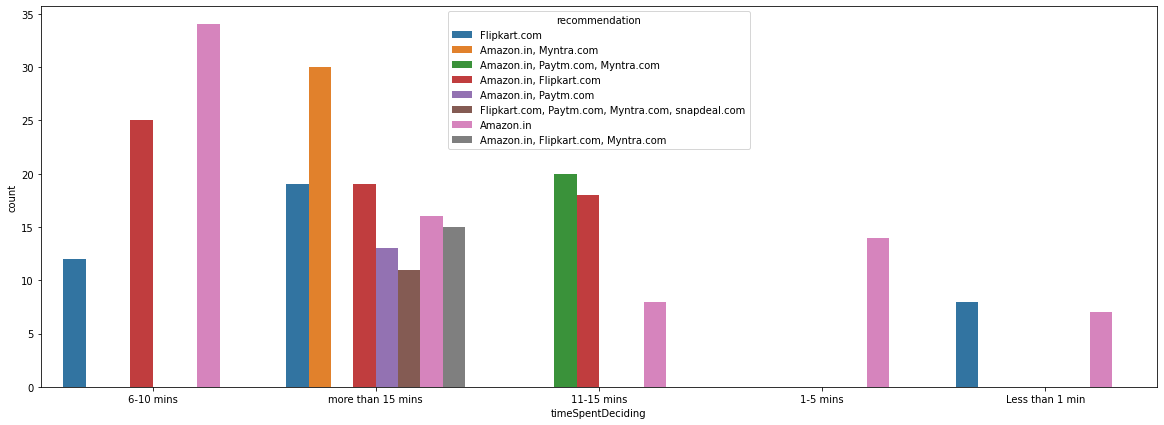

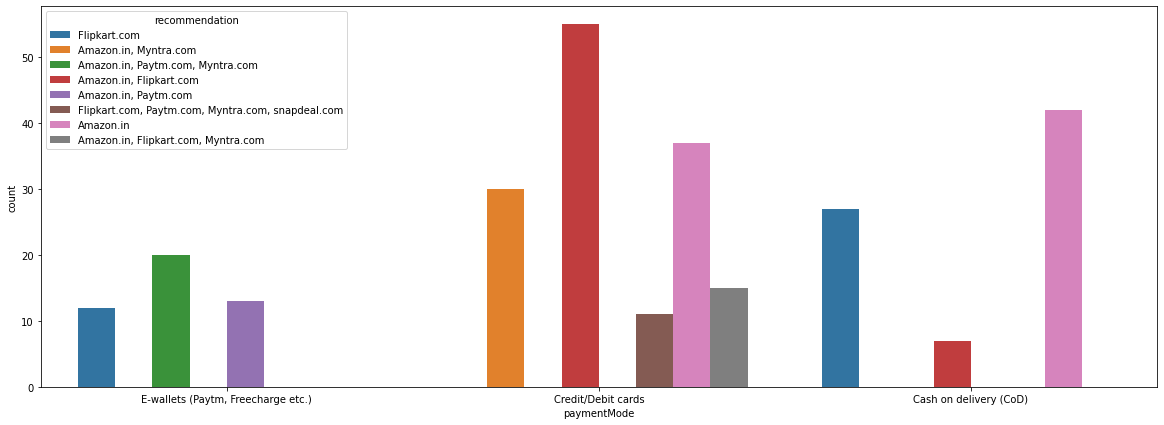

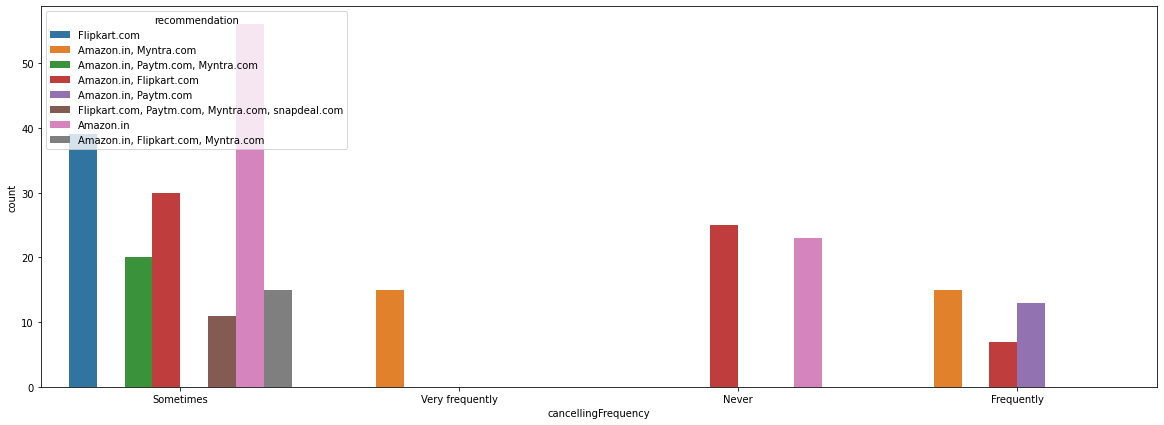

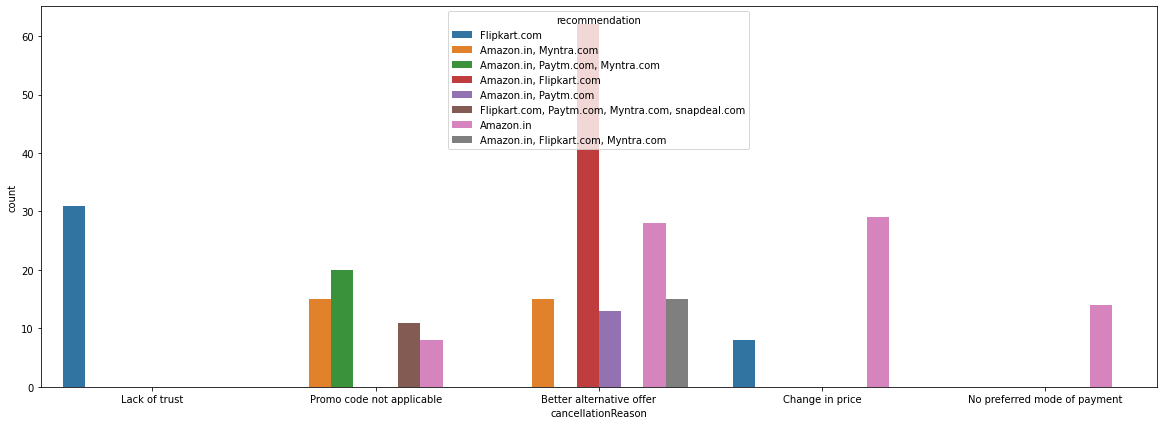

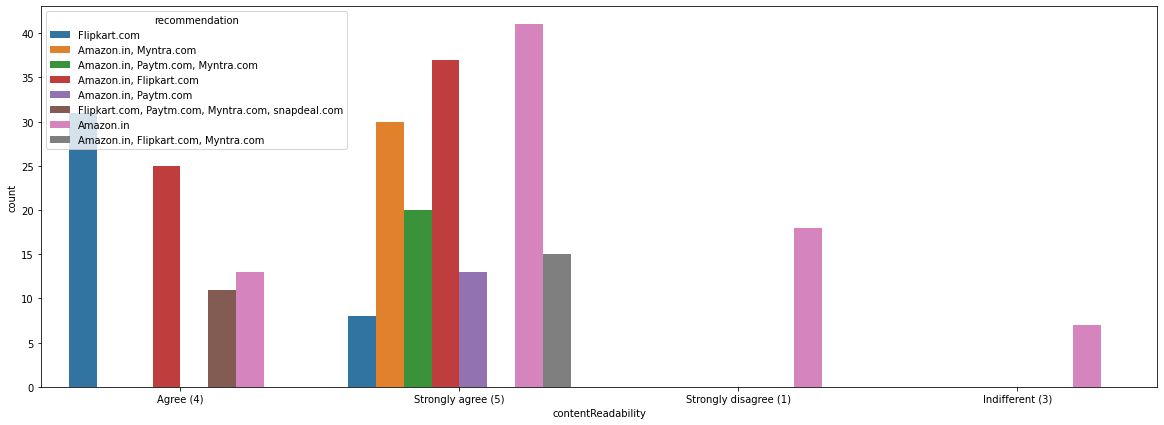

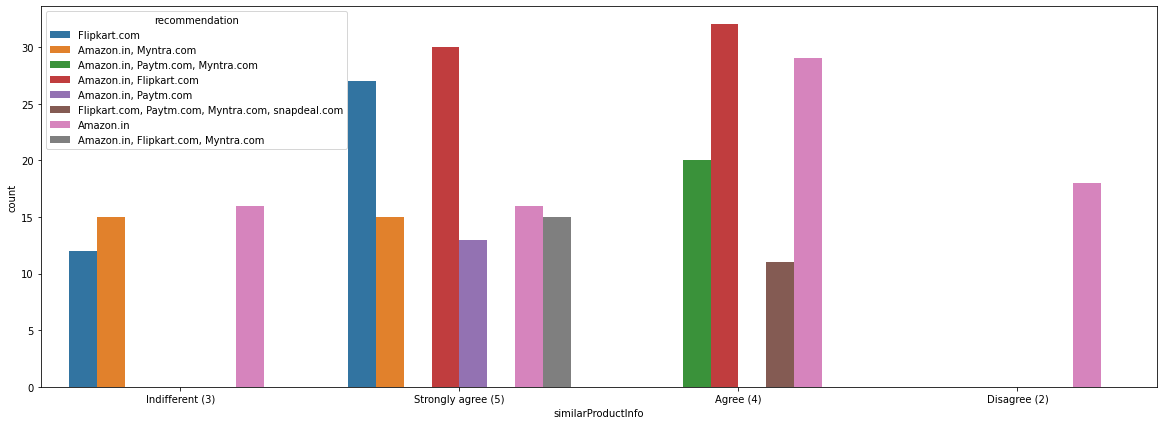

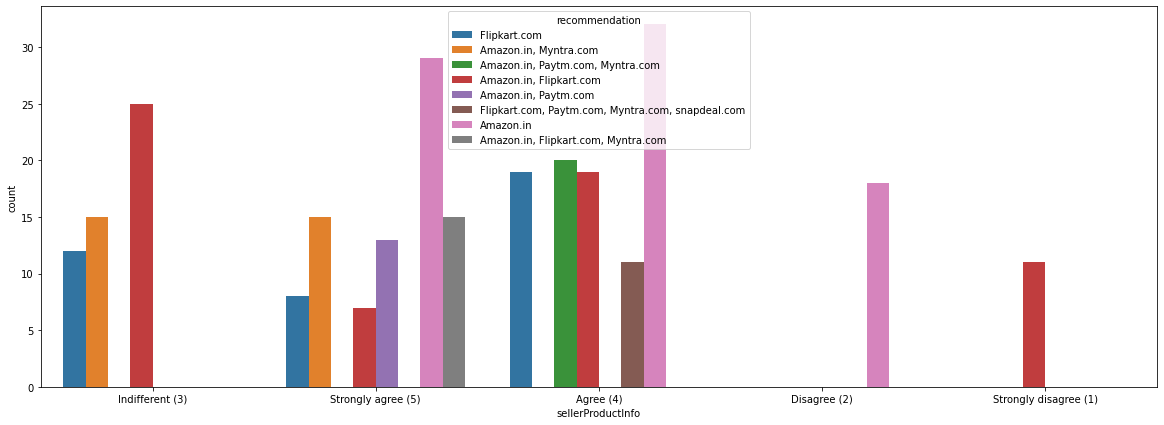

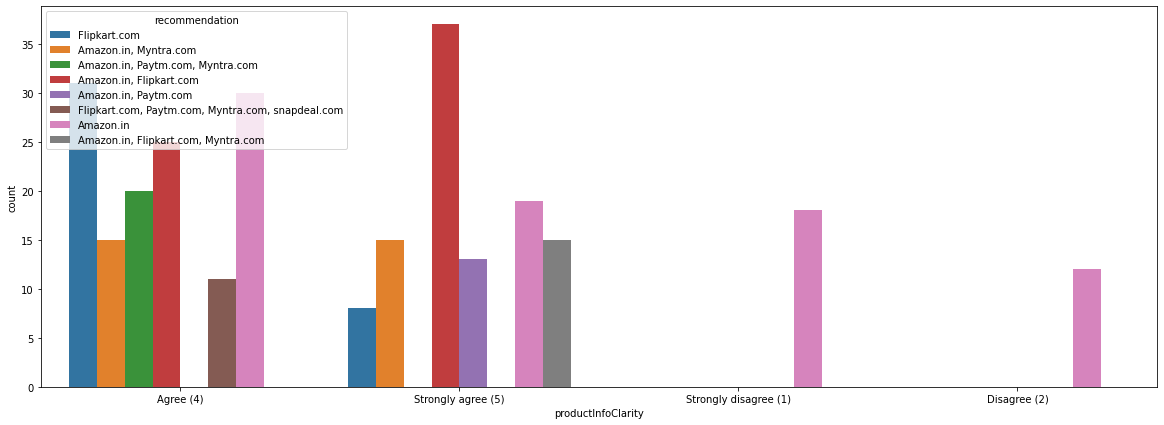

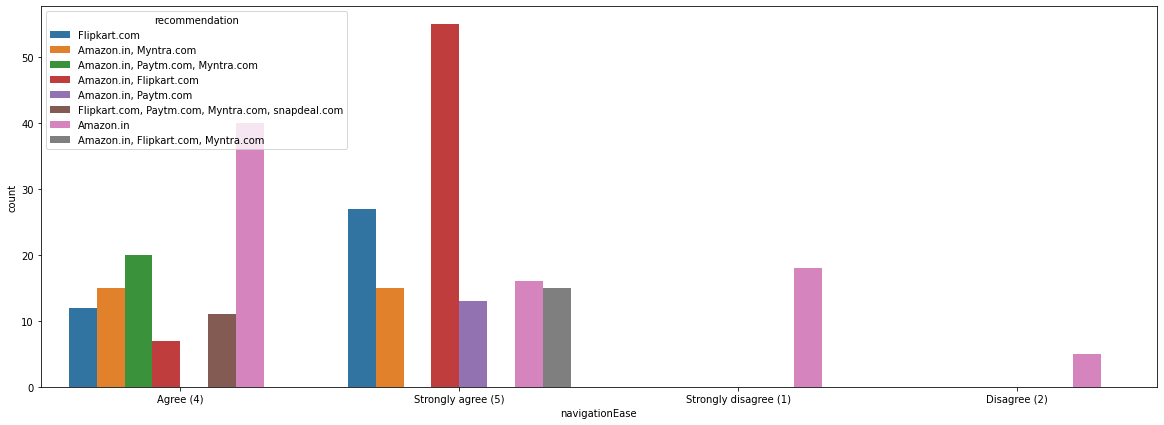

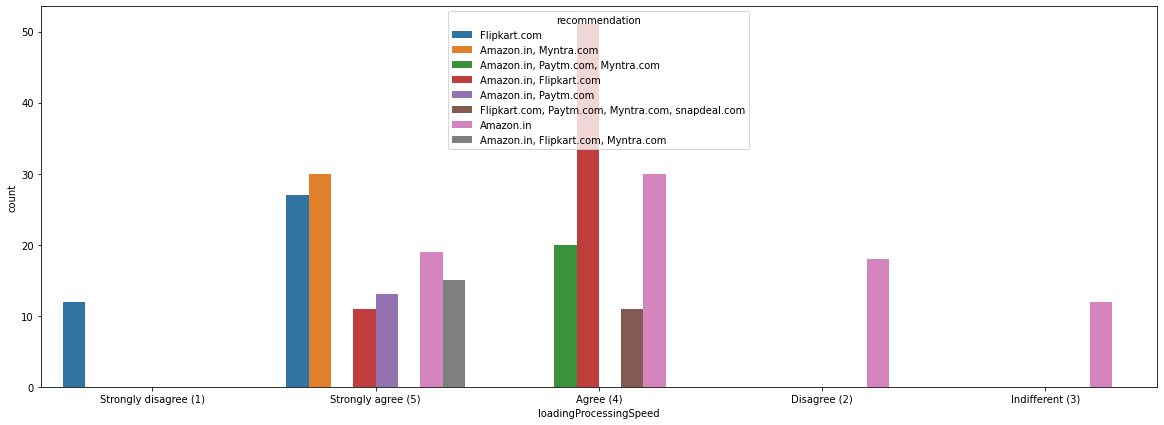

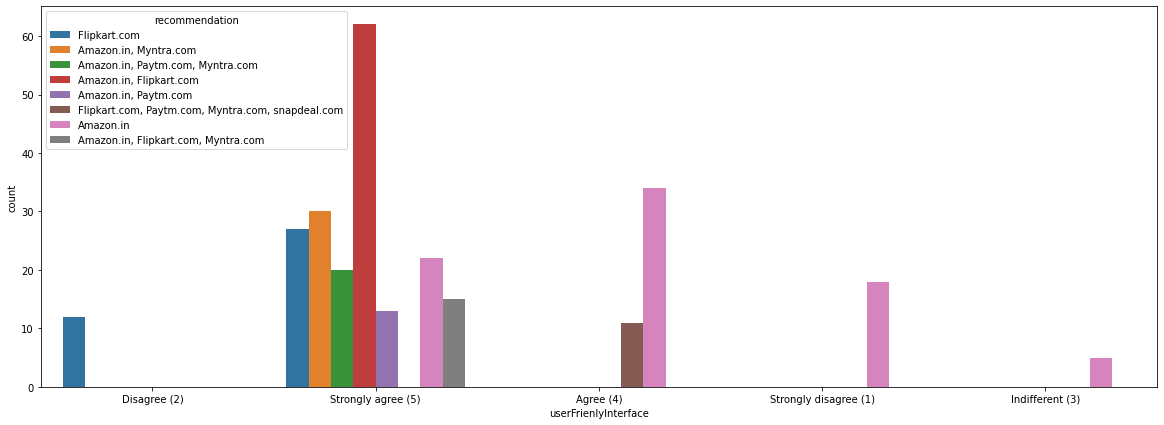

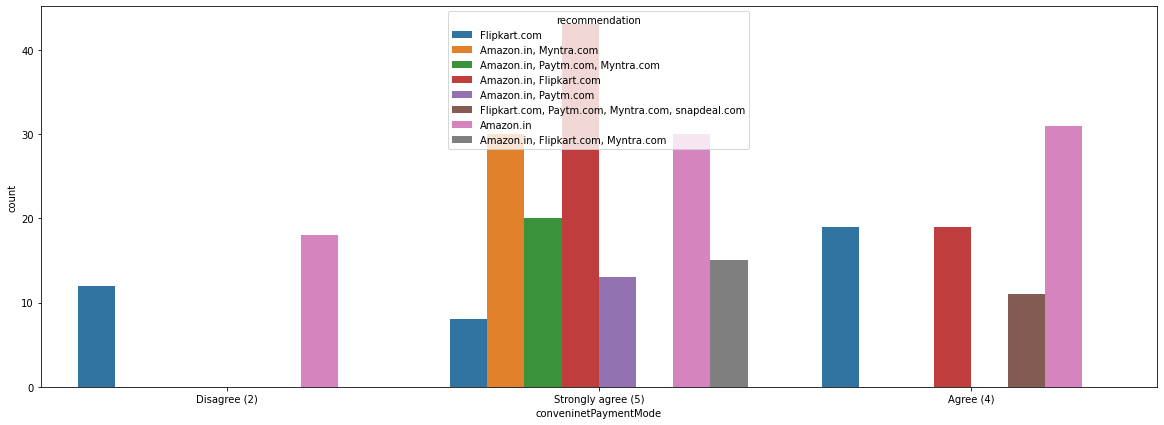

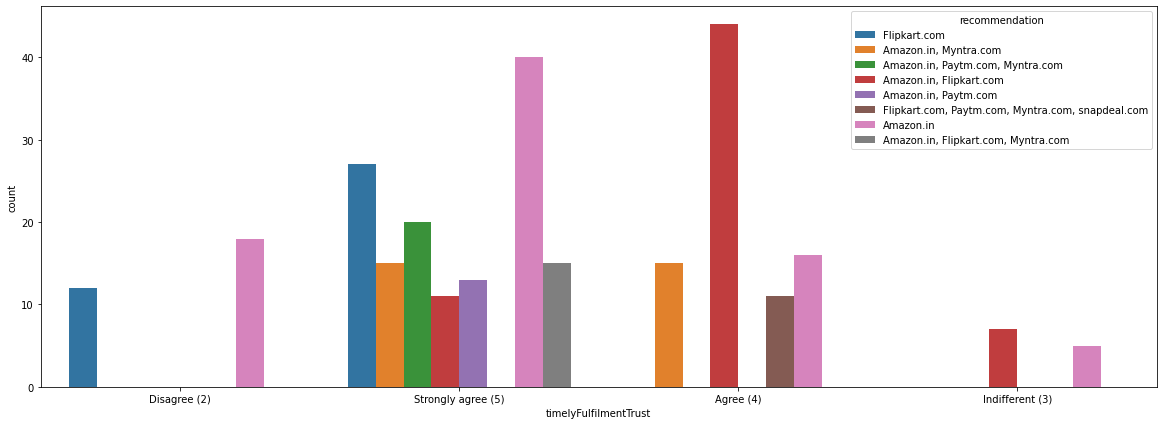

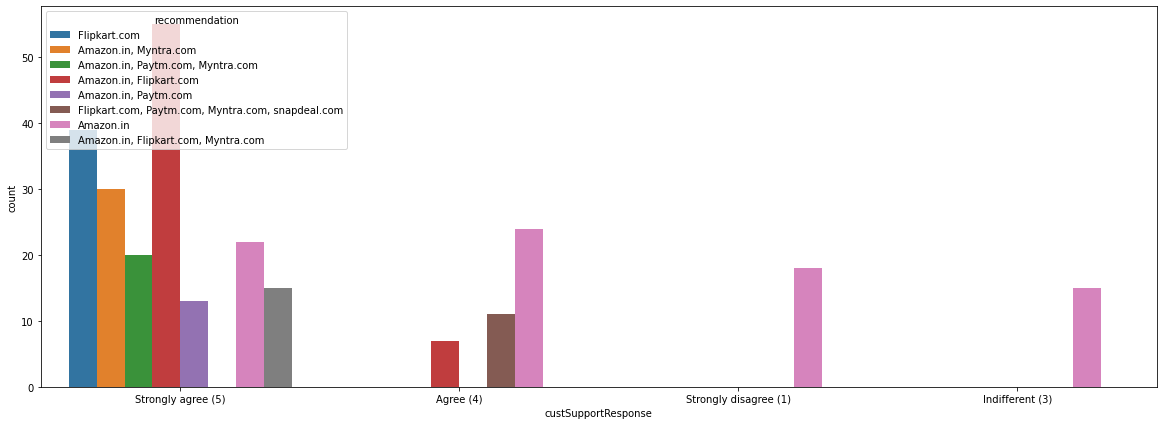

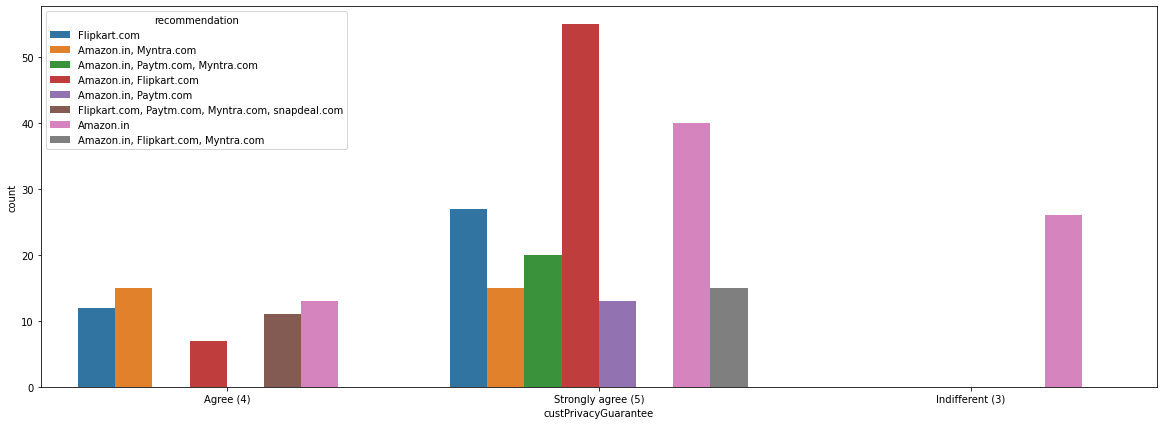

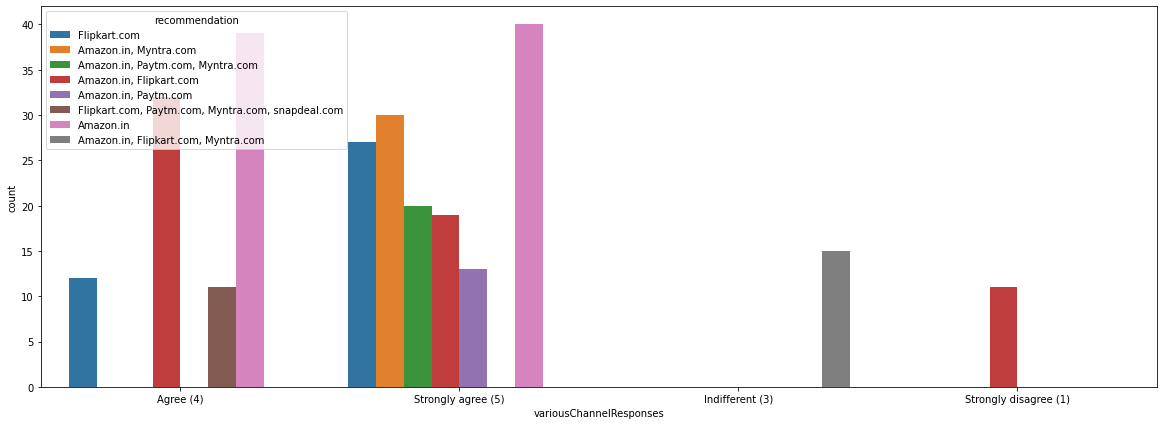

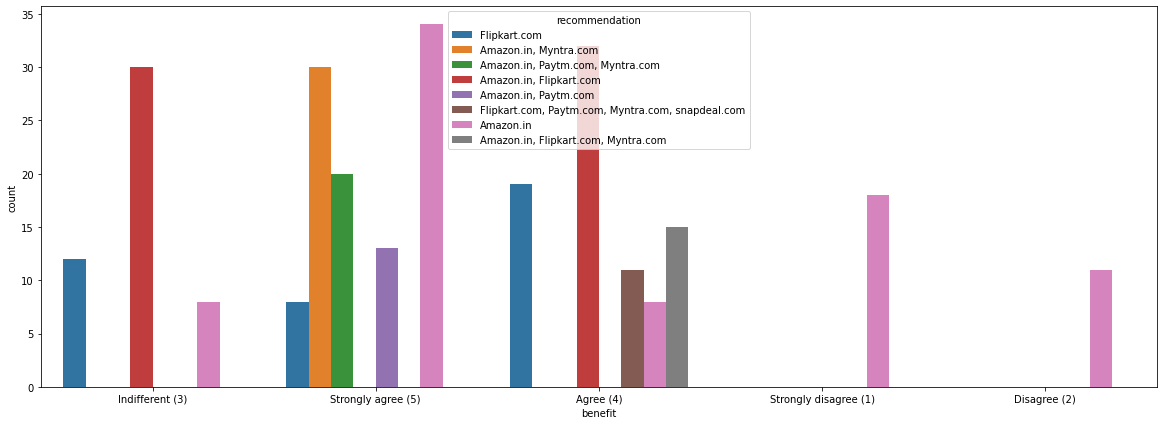

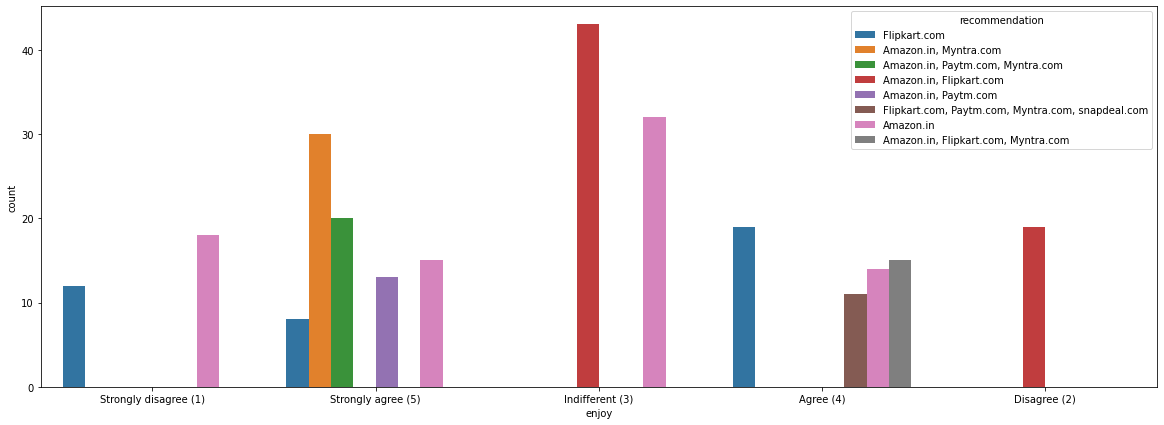

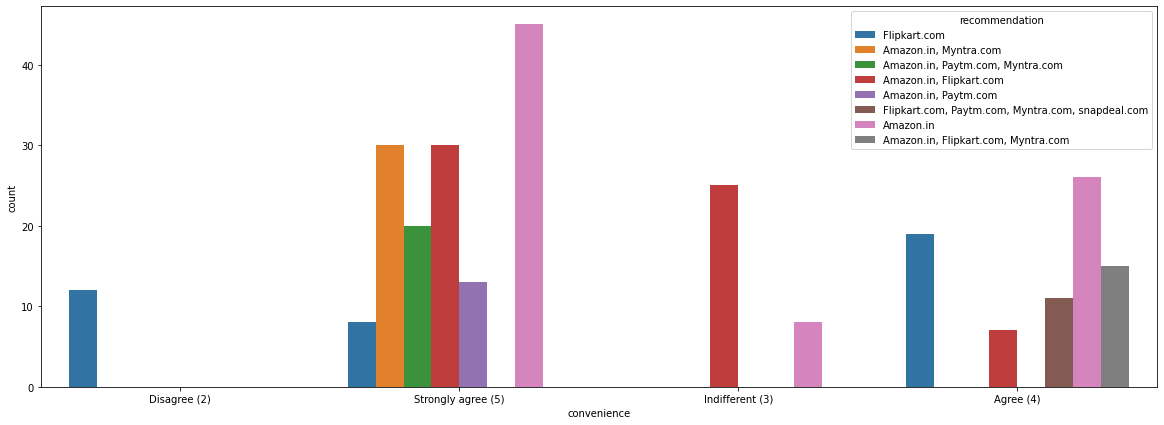

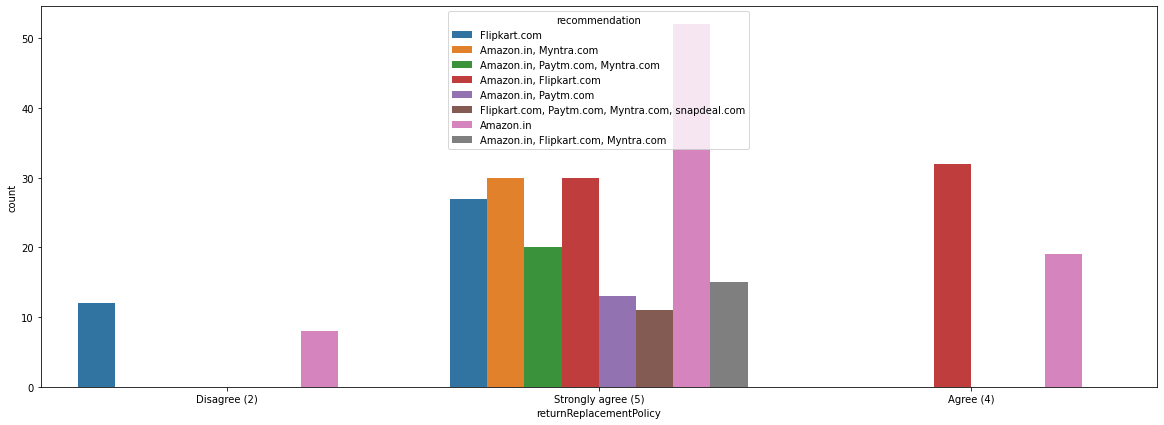

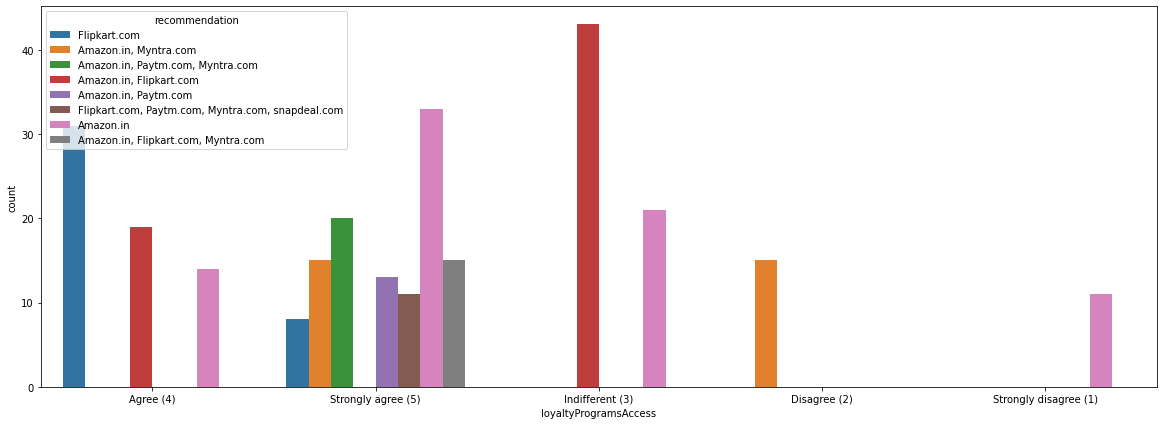

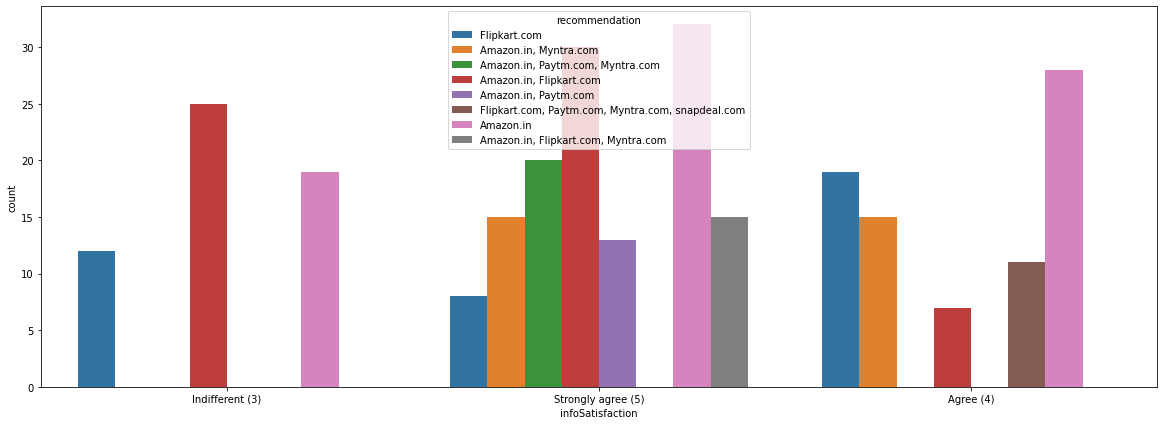

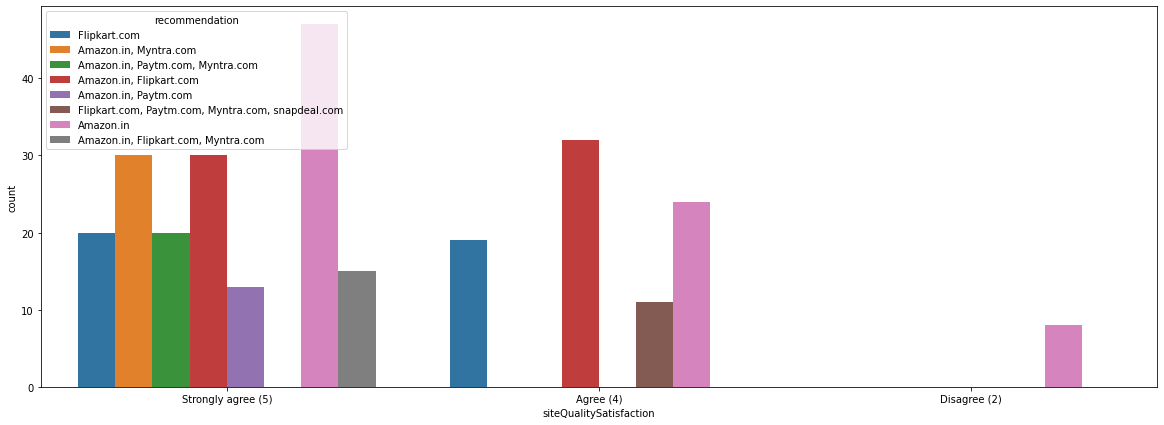

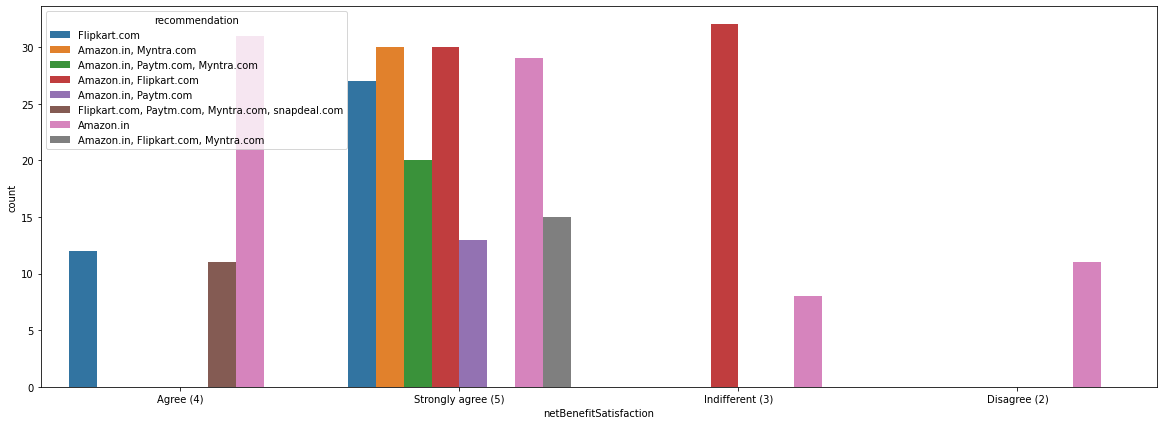

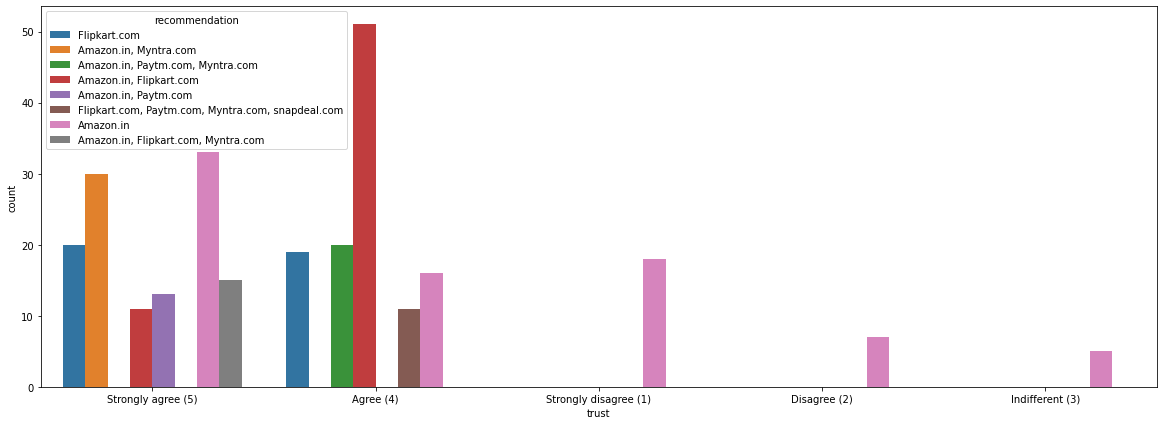

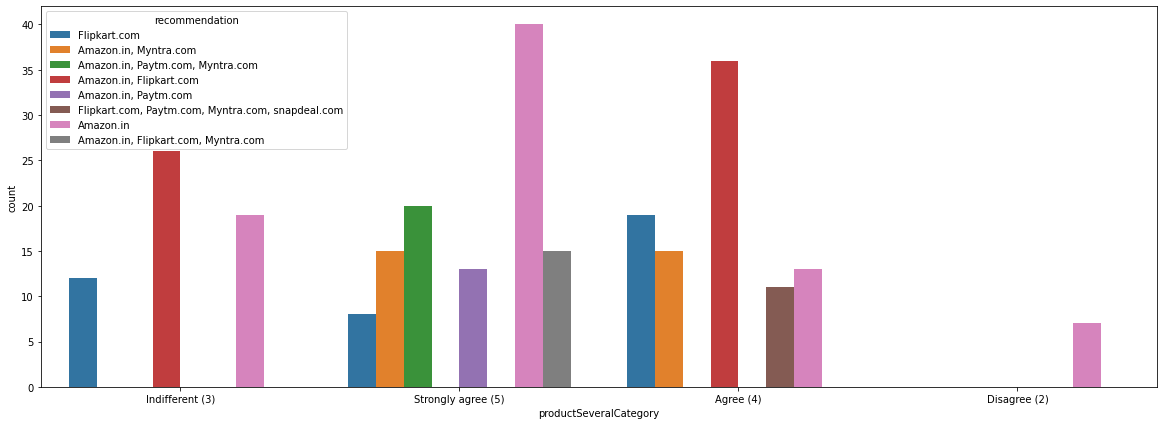

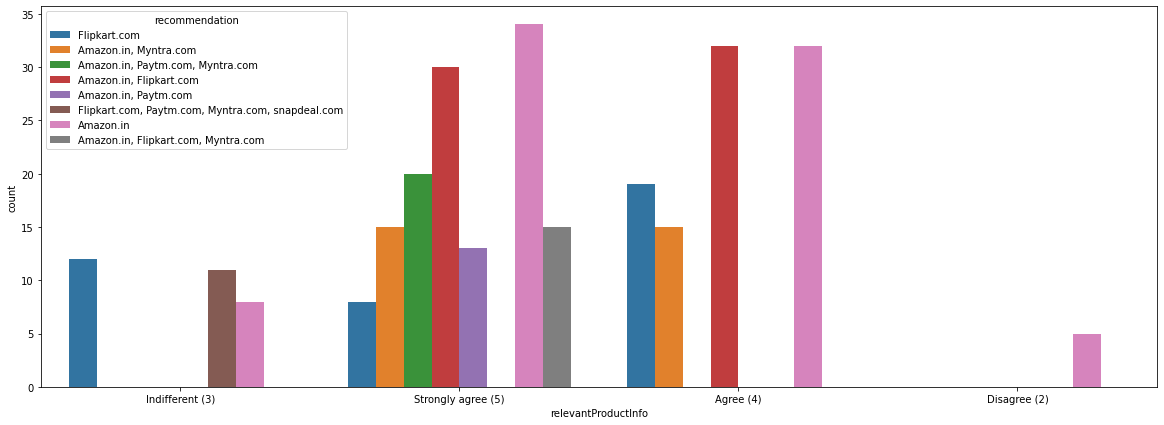

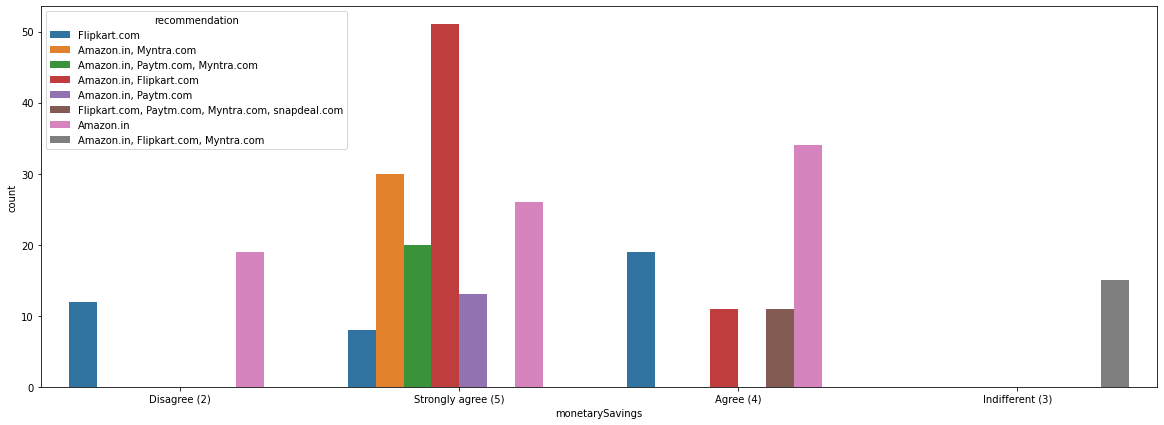

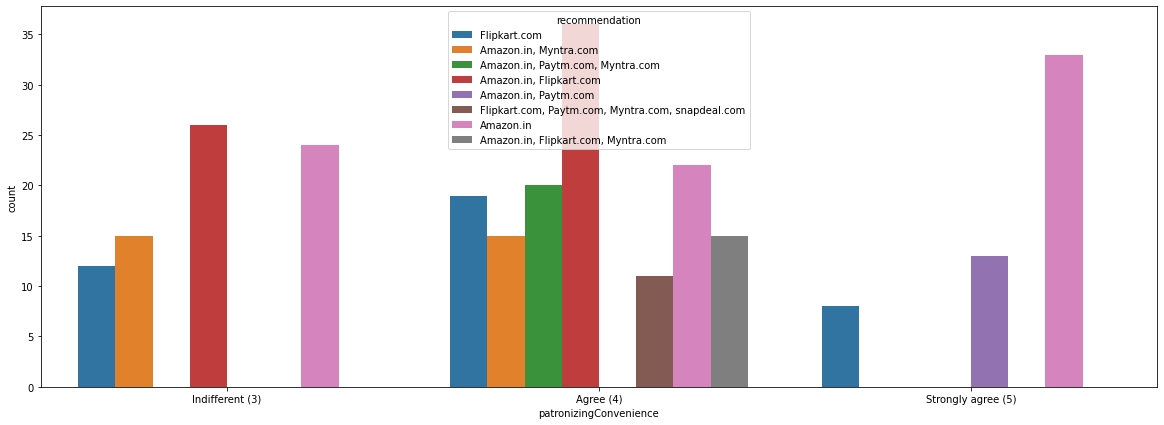

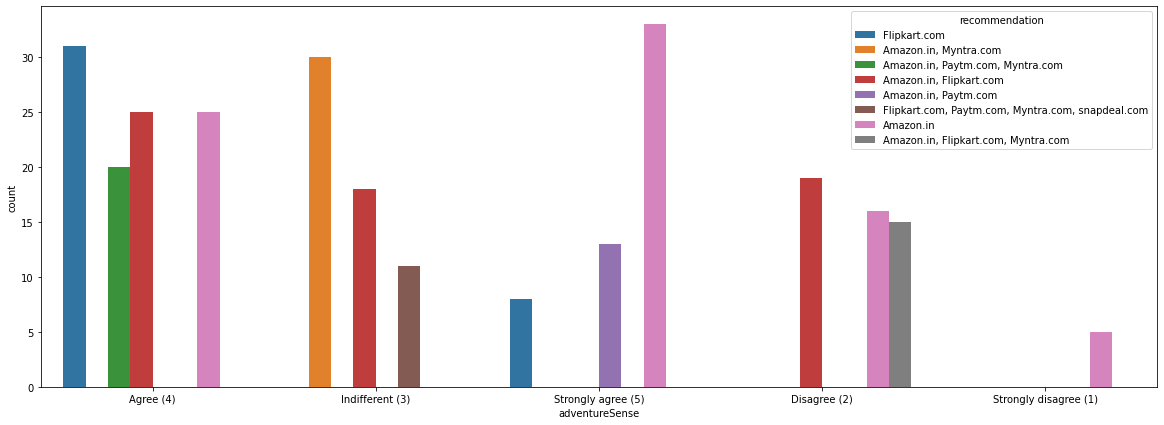

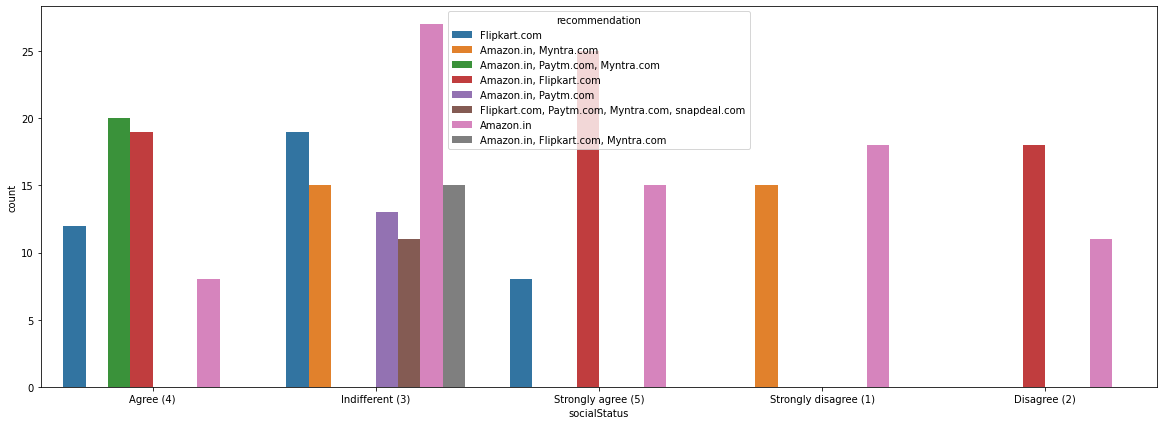

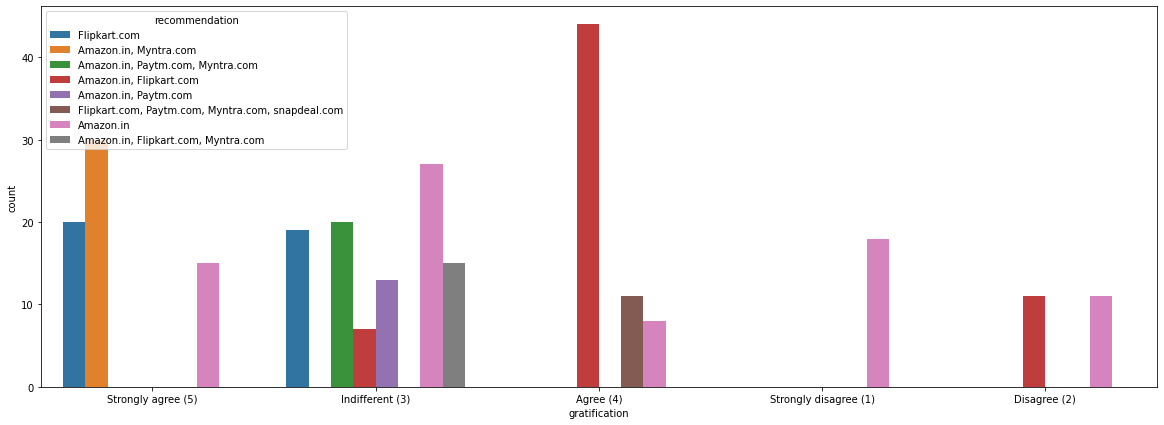

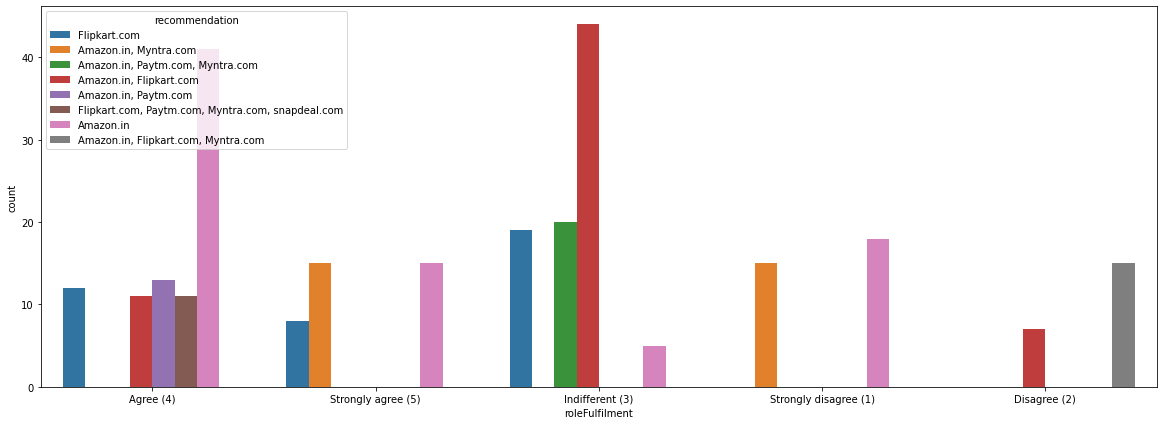

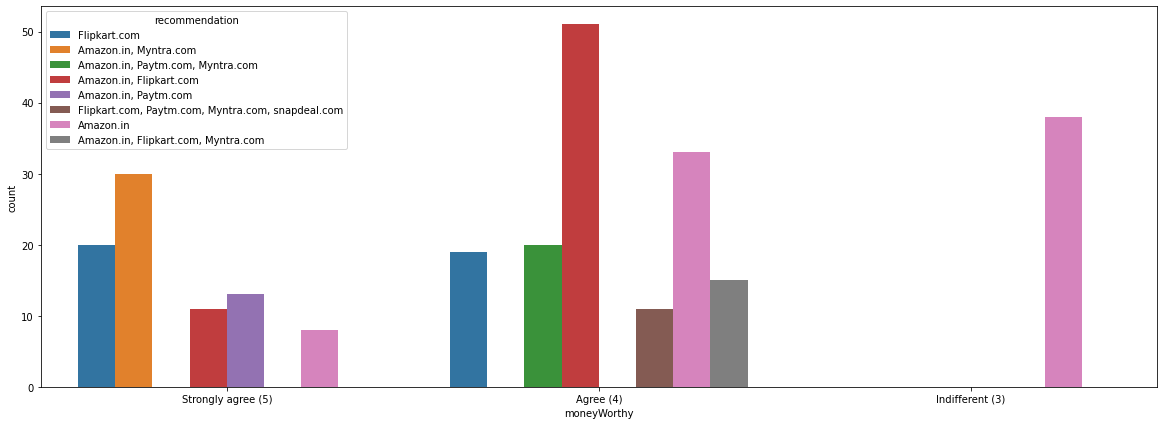

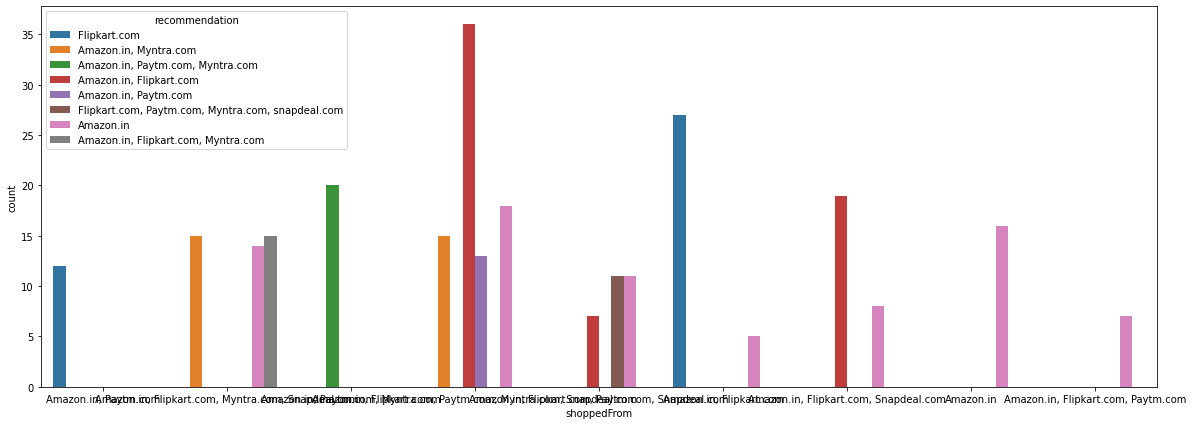

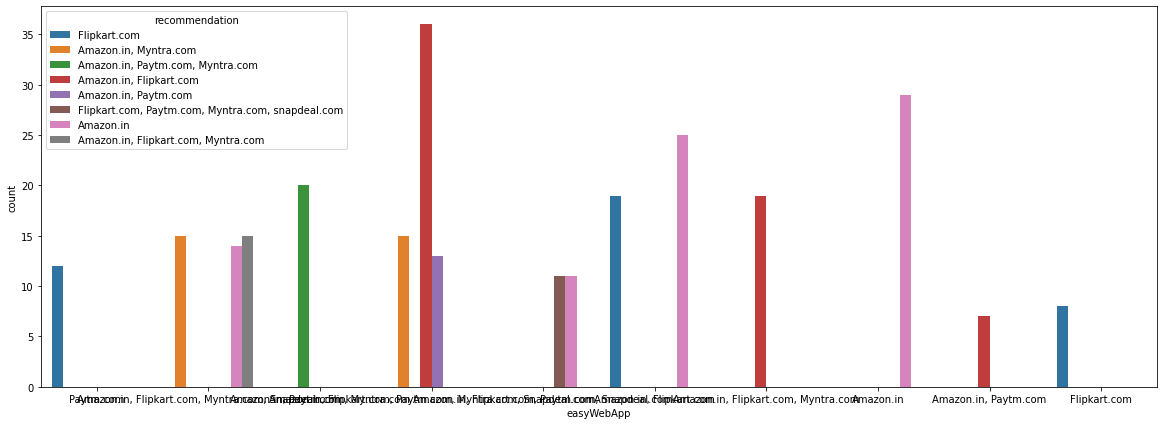

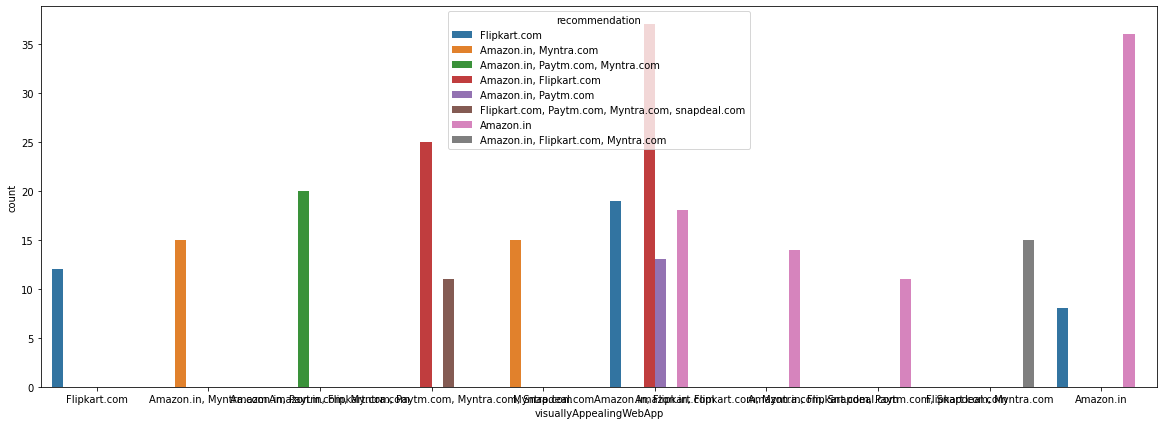

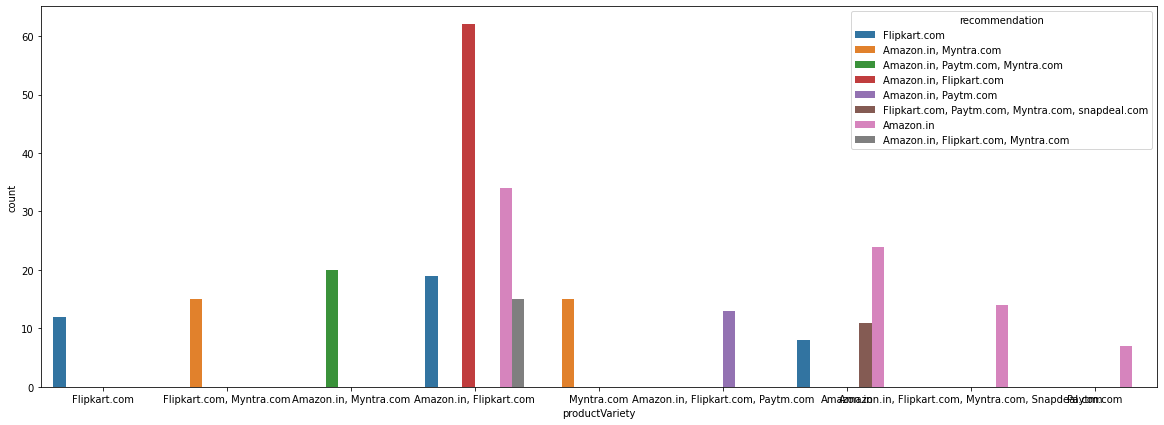

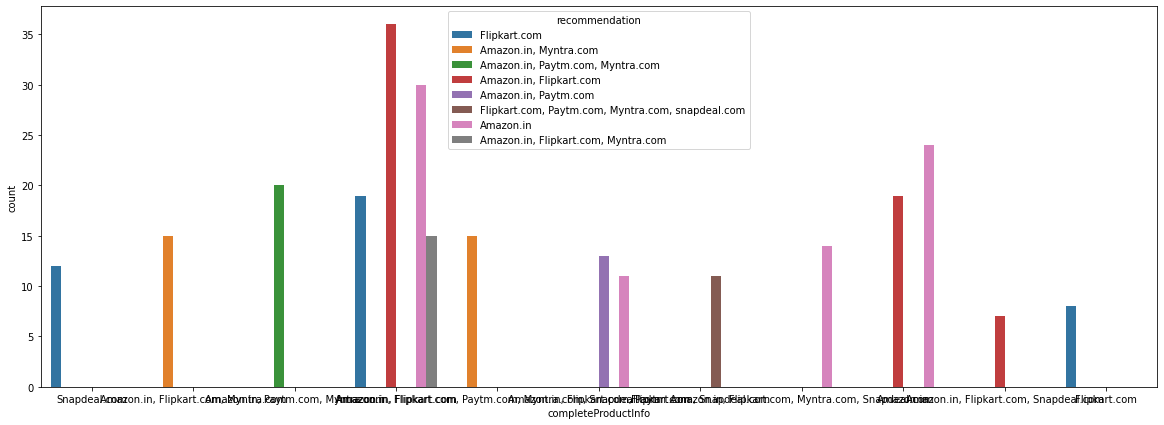

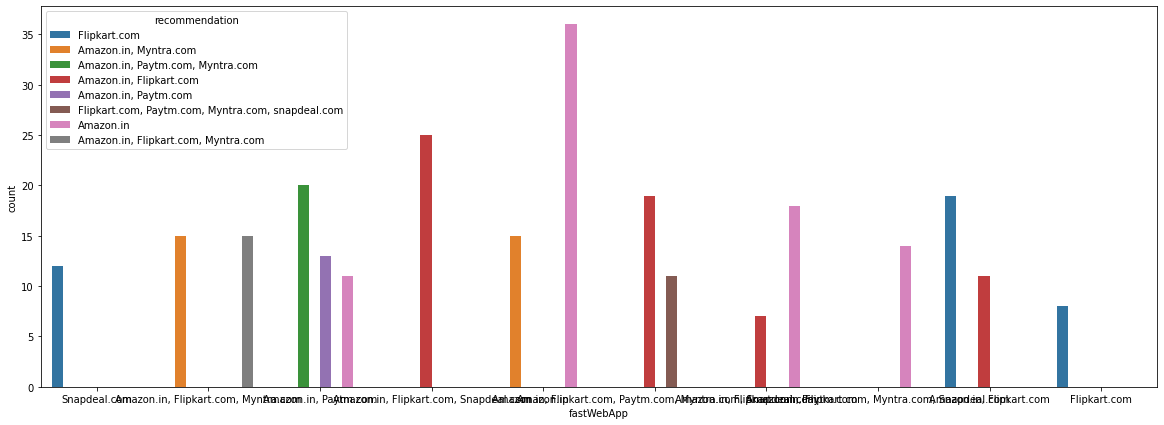

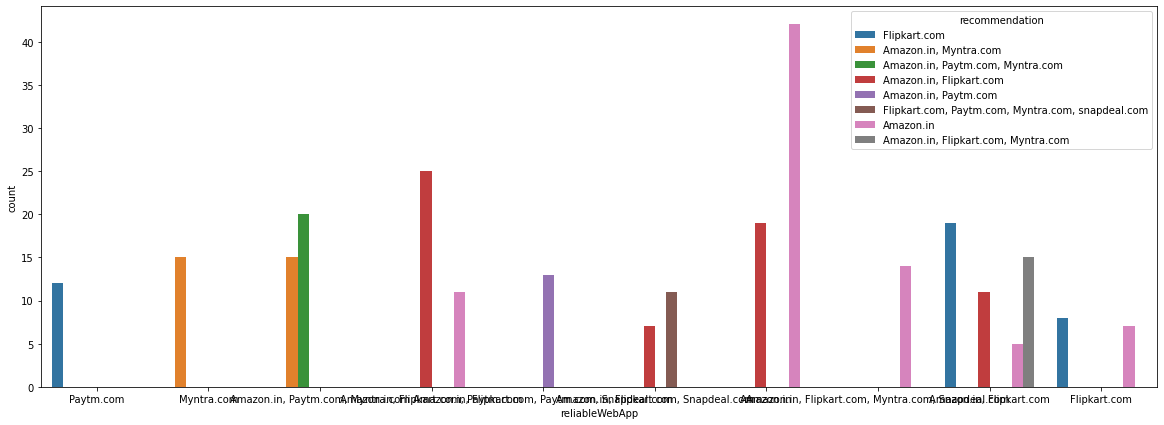

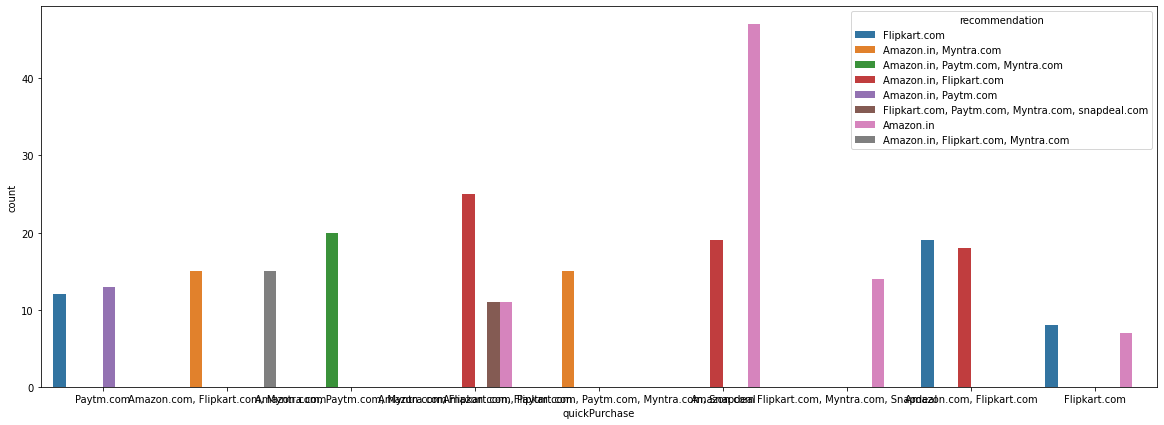

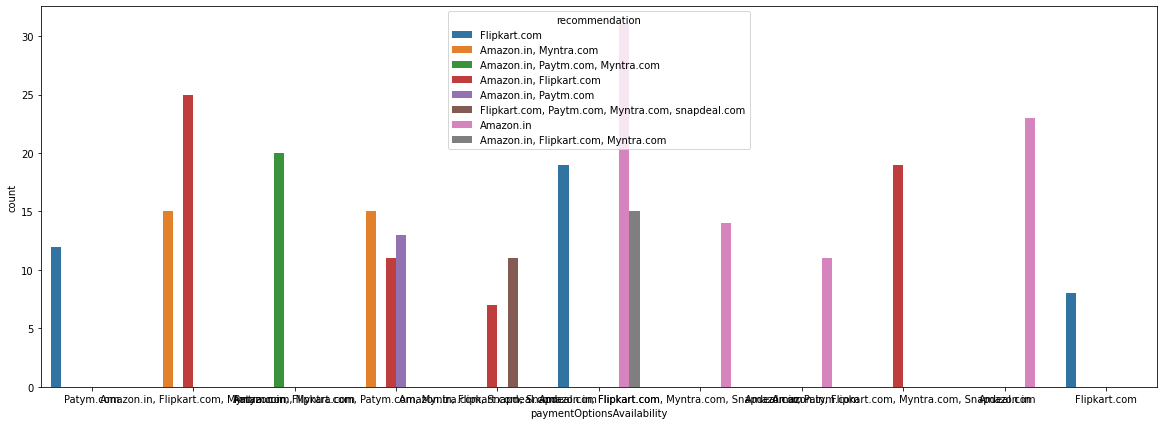

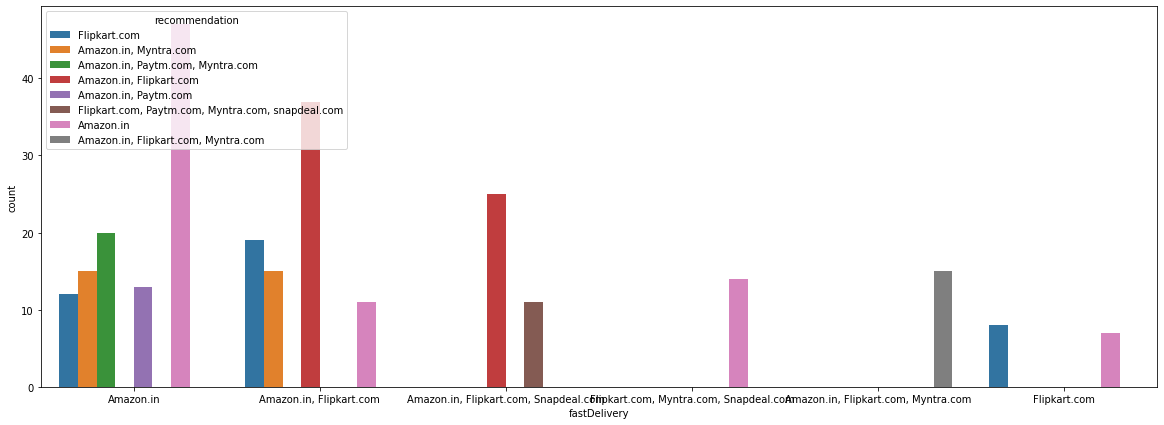

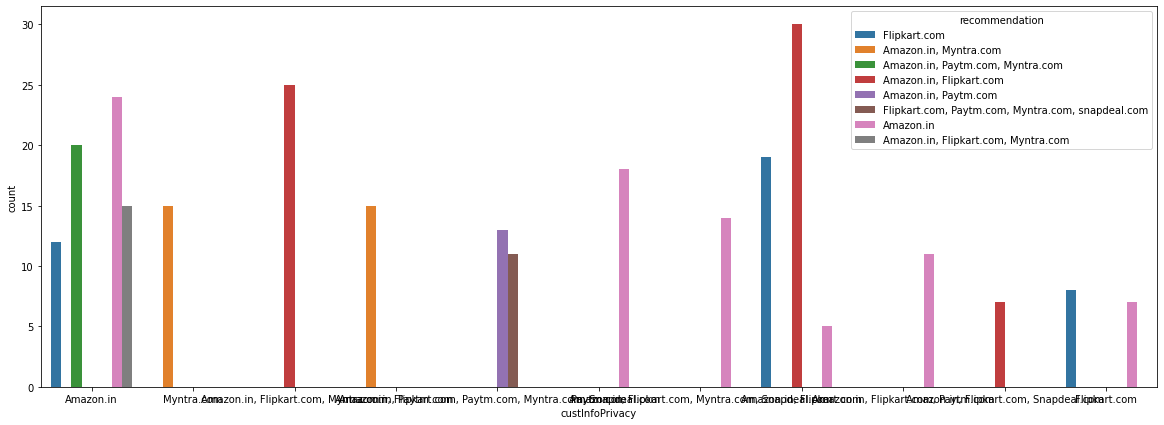

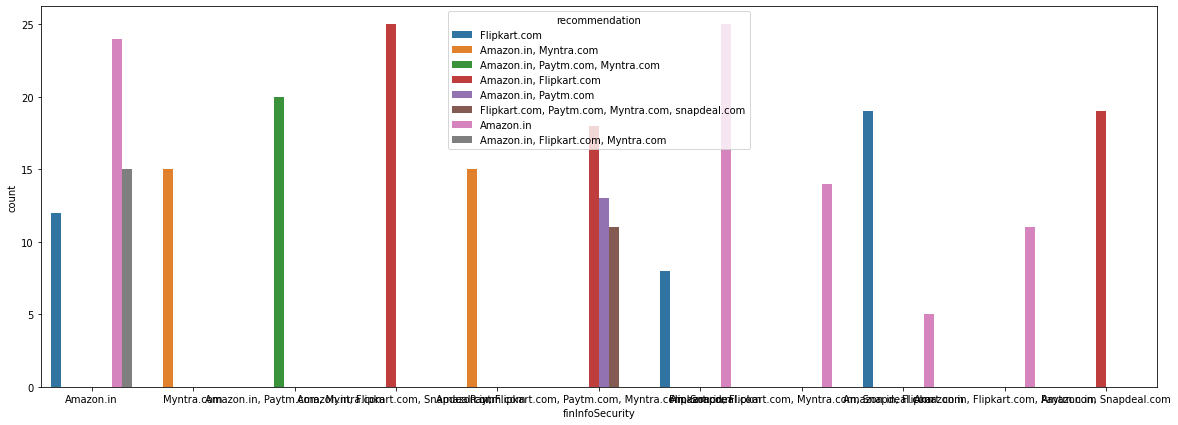

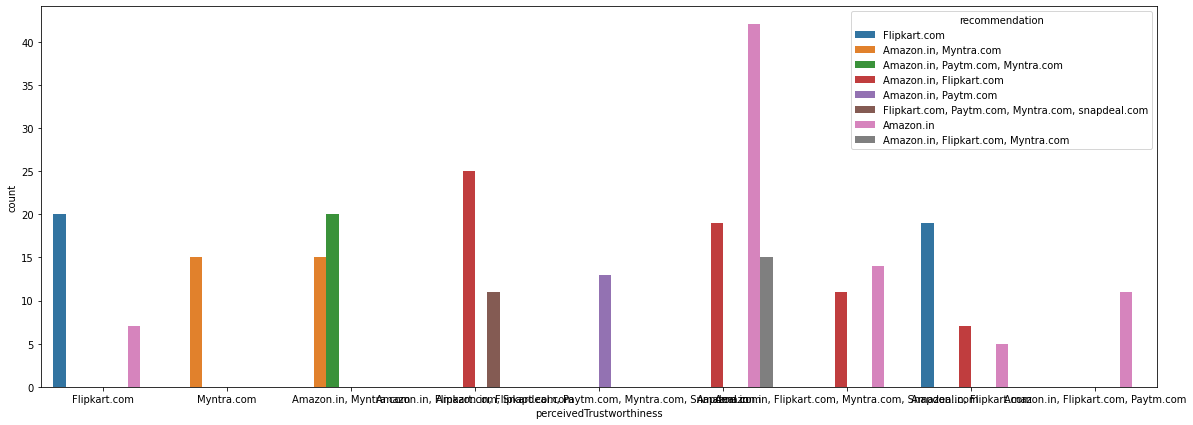

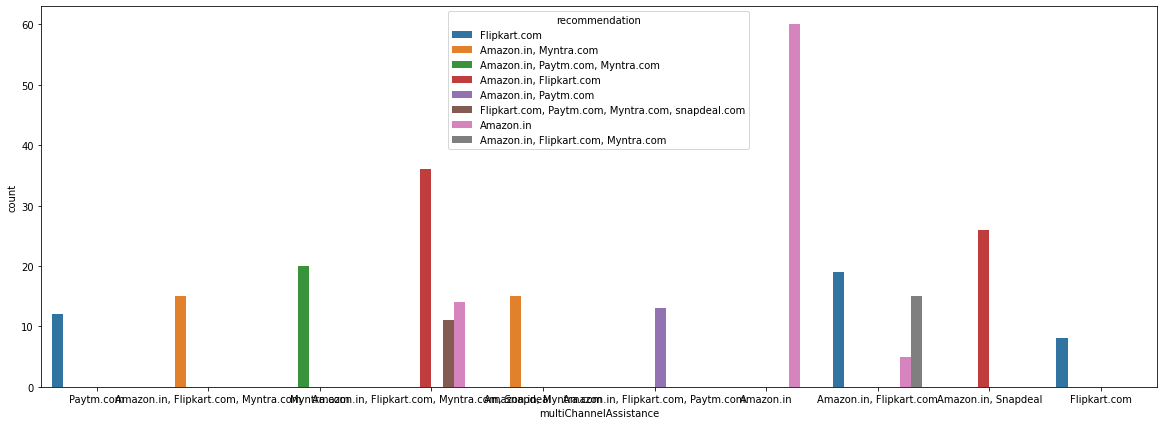

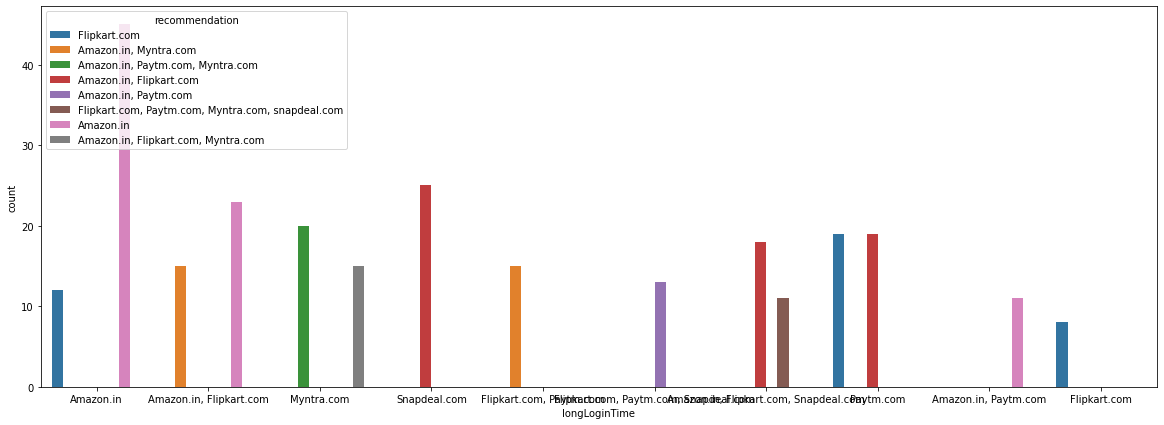

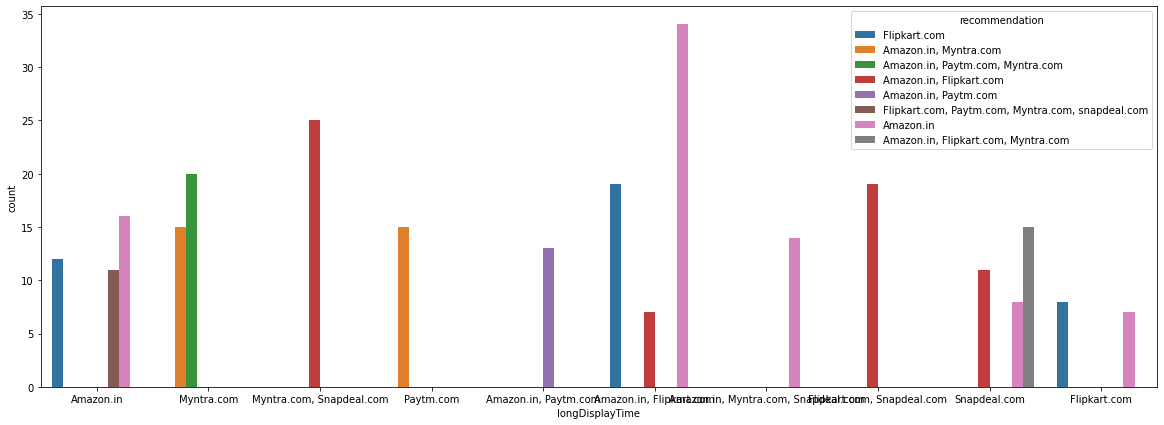

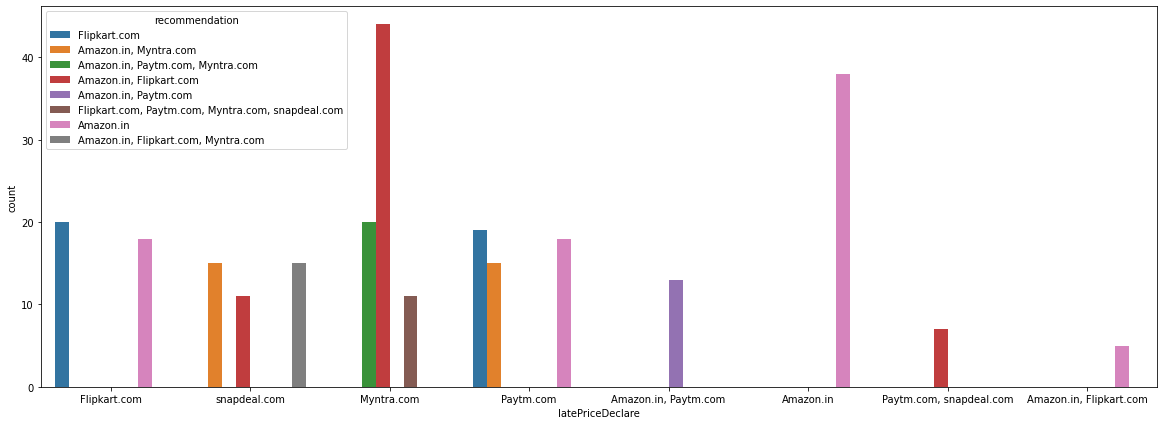

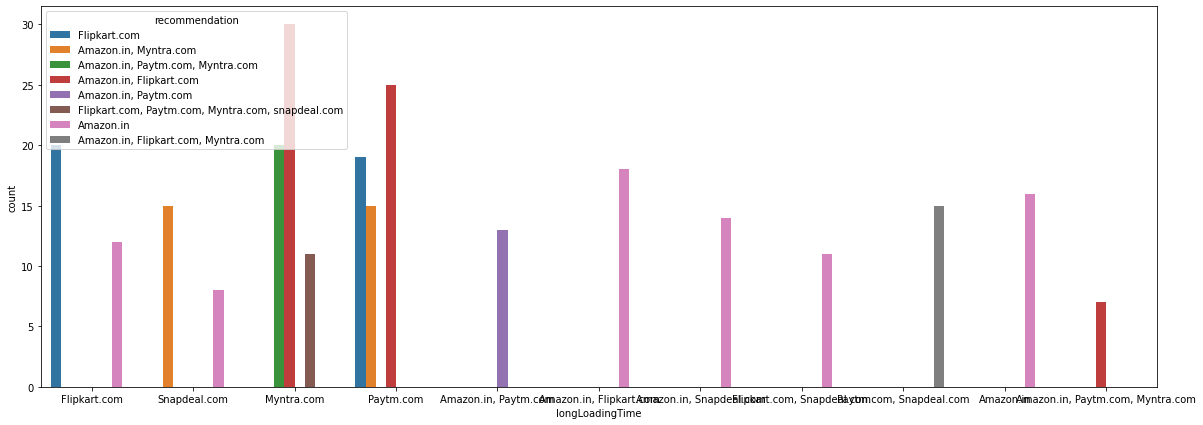

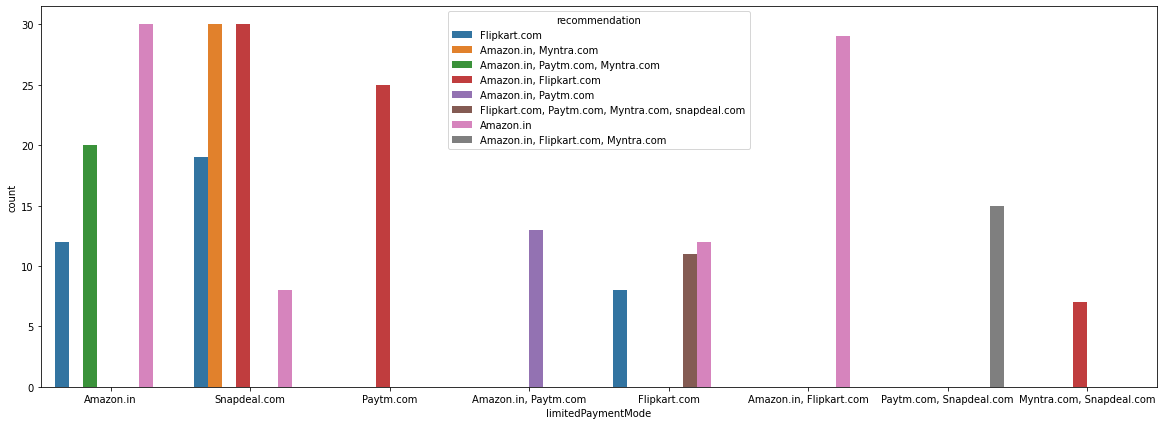

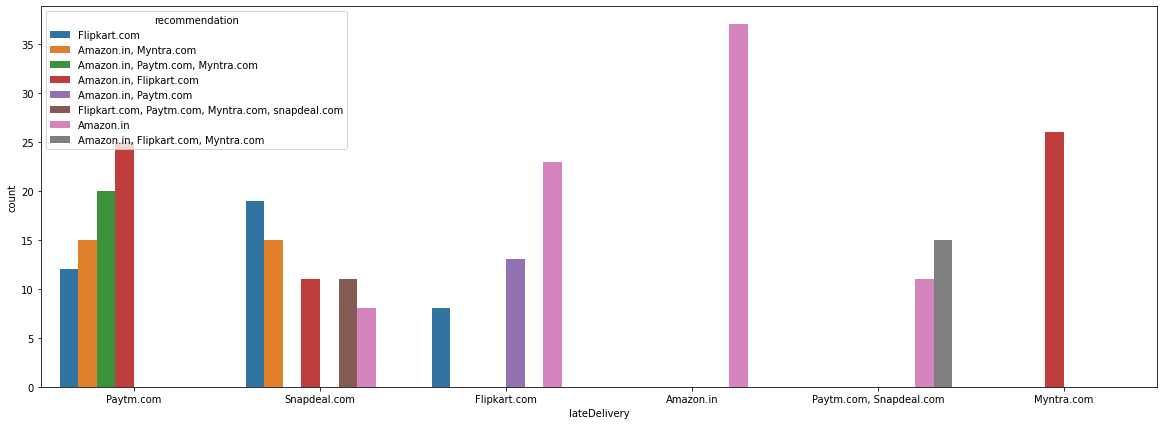

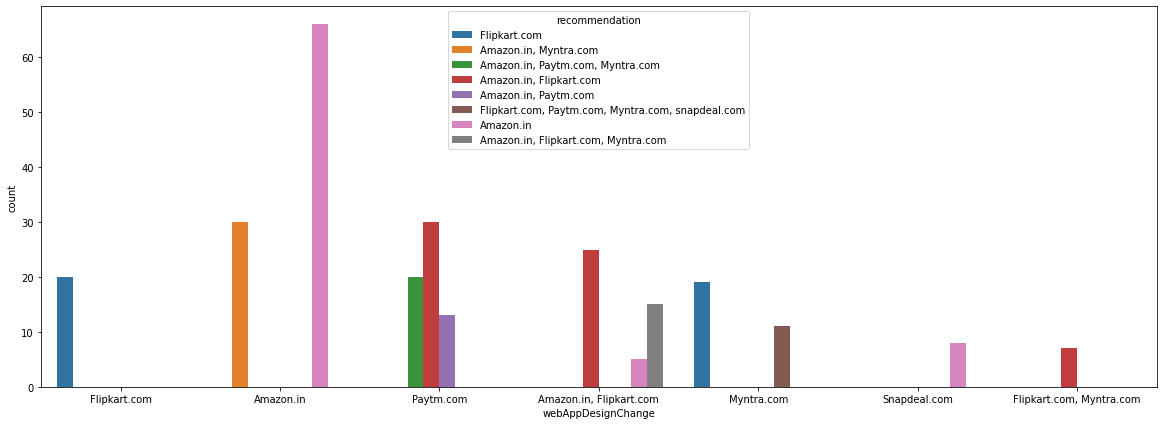

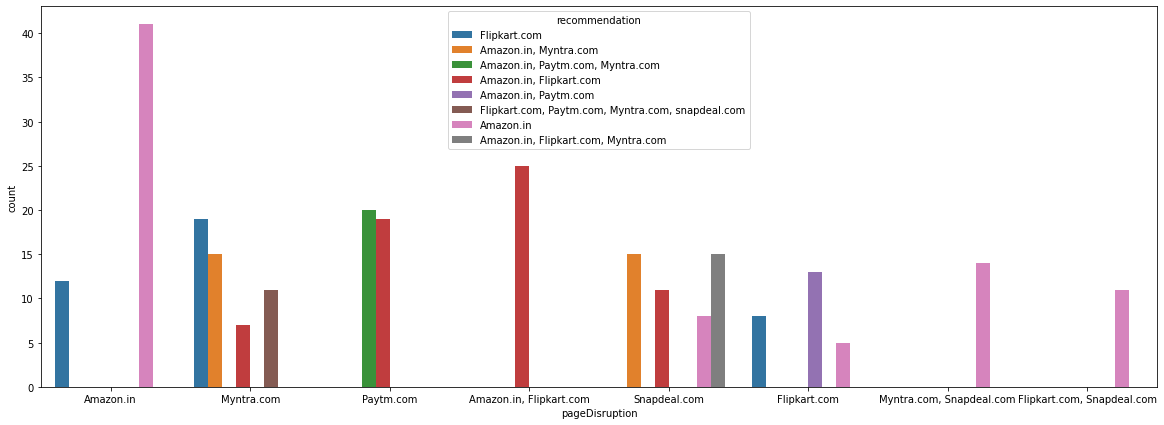

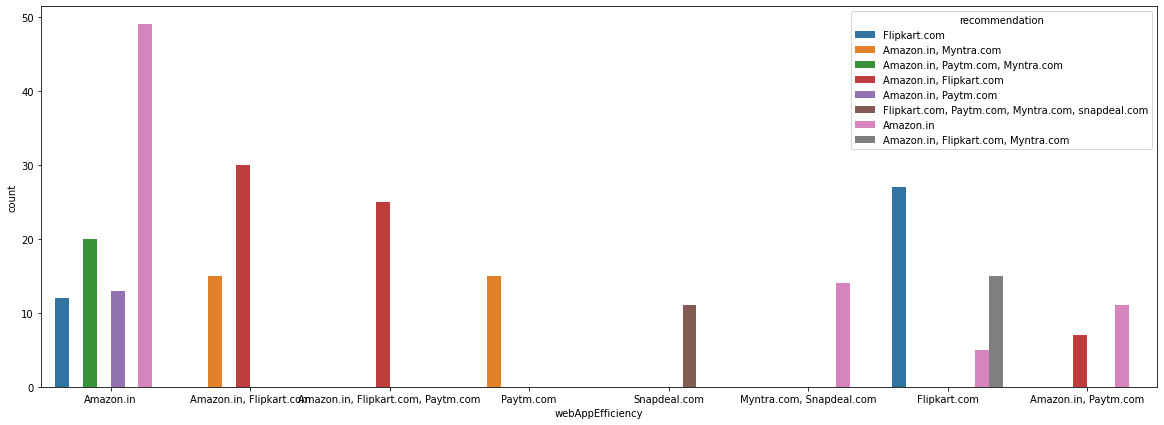

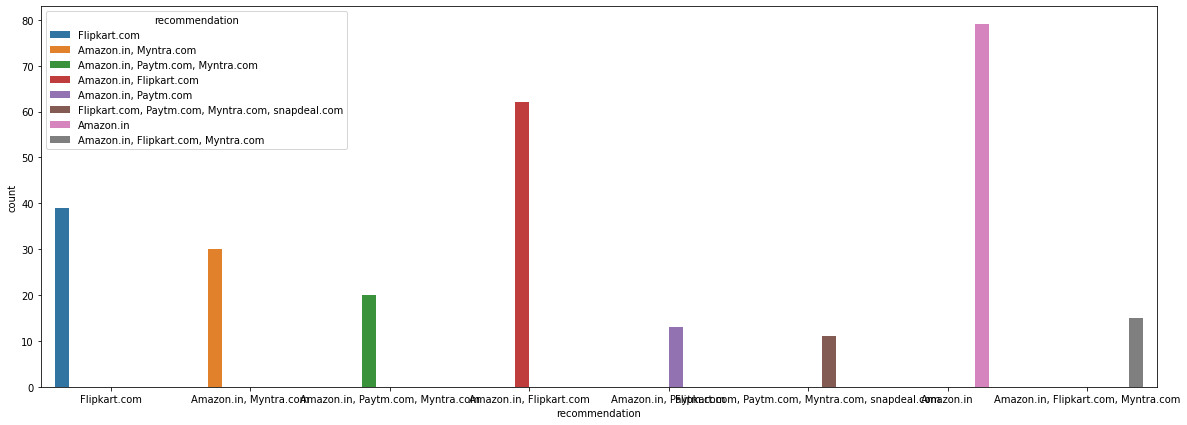

In [ ]:
for i in df.columns:
  plt.figure(figsize=(20,7))
  sns.countplot(x=df[i],data=df,hue='recommendation')
  plt.show()

In [47]:
ecommerce_columns=df.iloc[:,47:].columns
ecommerce_columns=ecommerce_columns.to_list()

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: shoppedFrom, dtype: int64


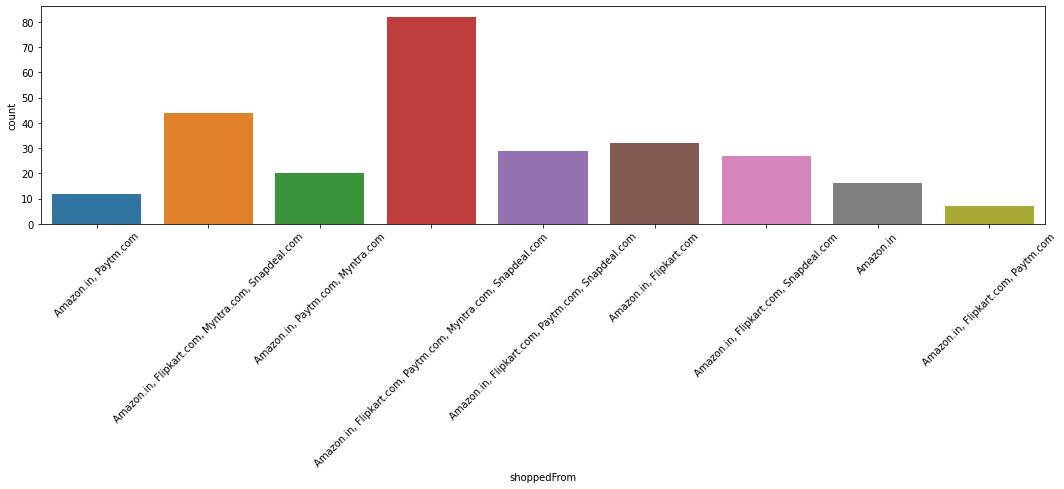

-----------------------------------------------------------------------------------------------------------------------------
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: easyWebApp, dtype: int64


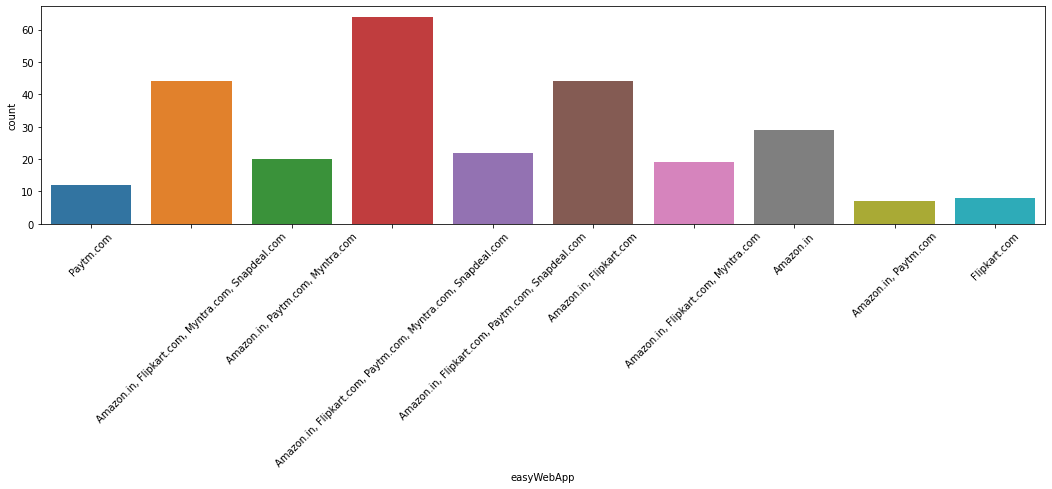

-----------------------------------------------------------------------------------------------------------------------------
Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Myntra.com                                           15
Flipkart.com, Myntra.com                                        15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: visuallyAppealingWebApp, dtype: int64


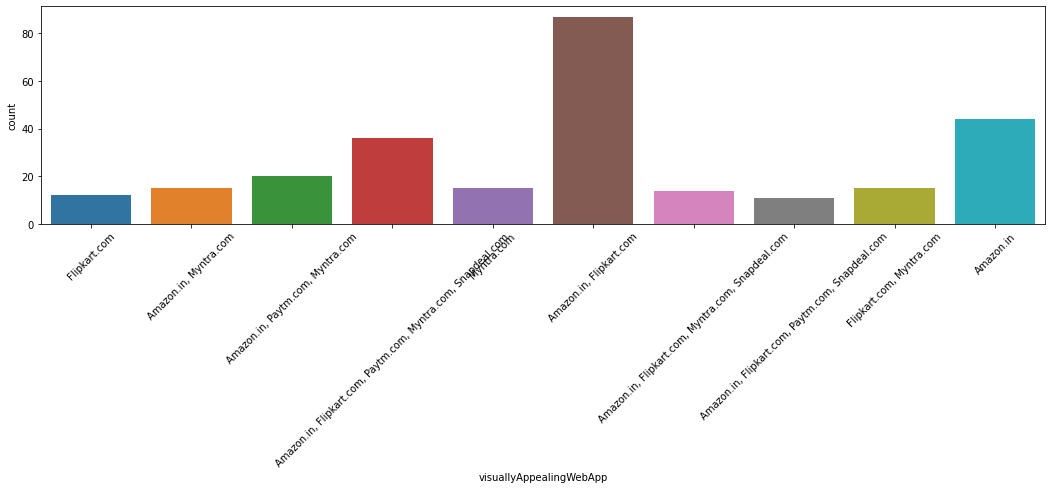

-----------------------------------------------------------------------------------------------------------------------------
Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Flipkart.com, Myntra.com                              15
Myntra.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: productVariety, dtype: int64


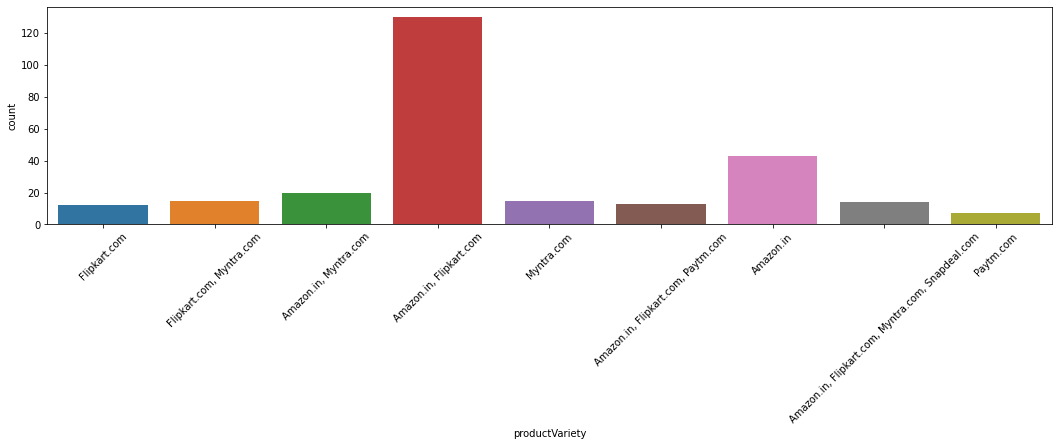

-----------------------------------------------------------------------------------------------------------------------------
Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: completeProductInfo, dtype: int64


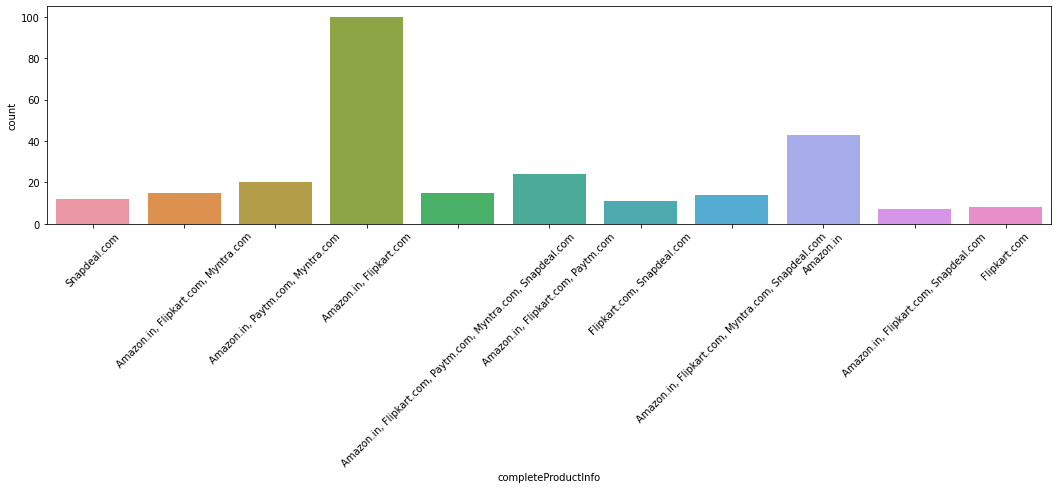

-----------------------------------------------------------------------------------------------------------------------------
Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: fastWebApp, dtype: int64


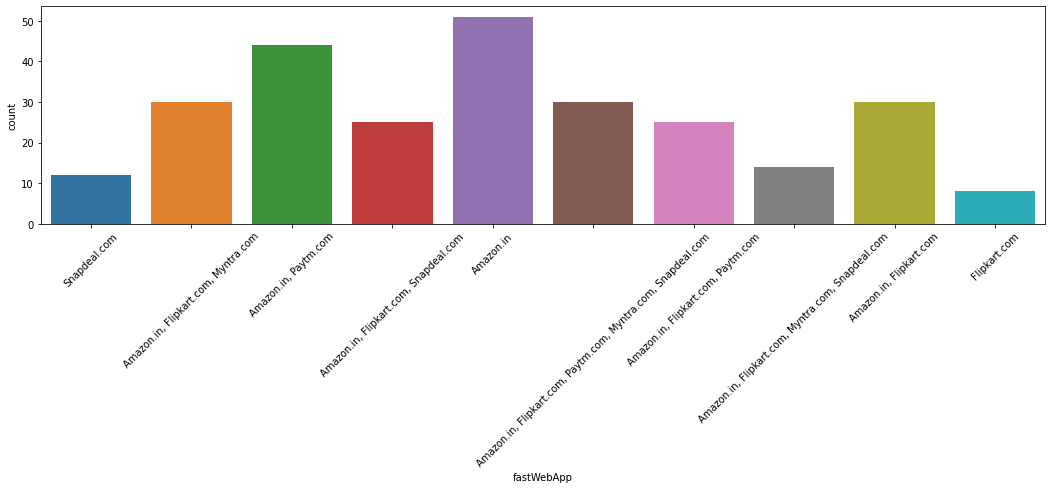

-----------------------------------------------------------------------------------------------------------------------------
Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Flipkart.com                                         15
Myntra.com                                           15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: reliableWebApp, dtype: int64


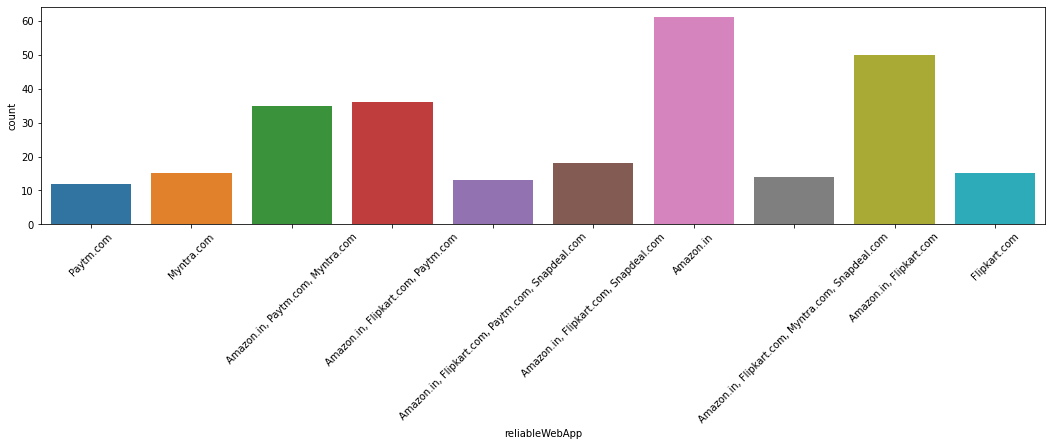

-----------------------------------------------------------------------------------------------------------------------------
Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Flipkart.com                                                 15
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: quickPurchase, dtype: int64


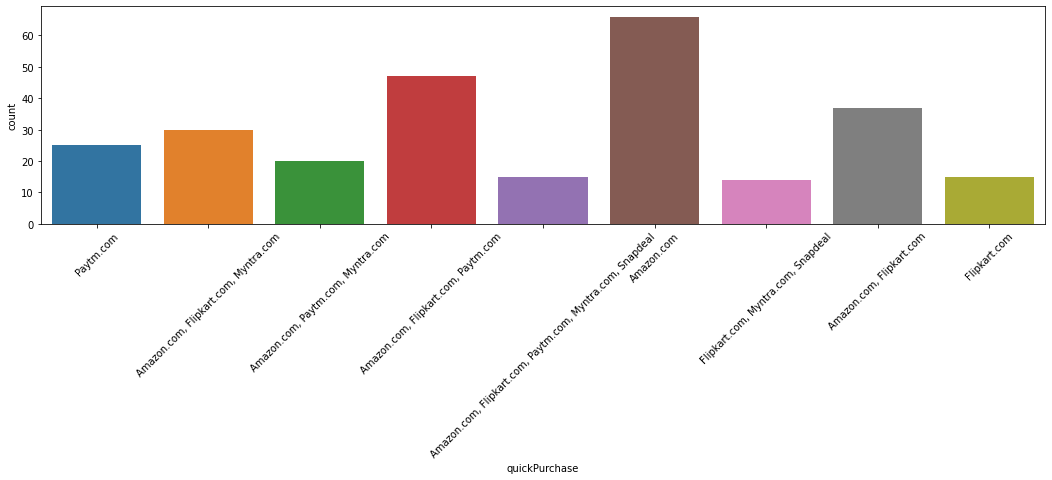

-----------------------------------------------------------------------------------------------------------------------------
Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: paymentOptionsAvailability, dtype: int64


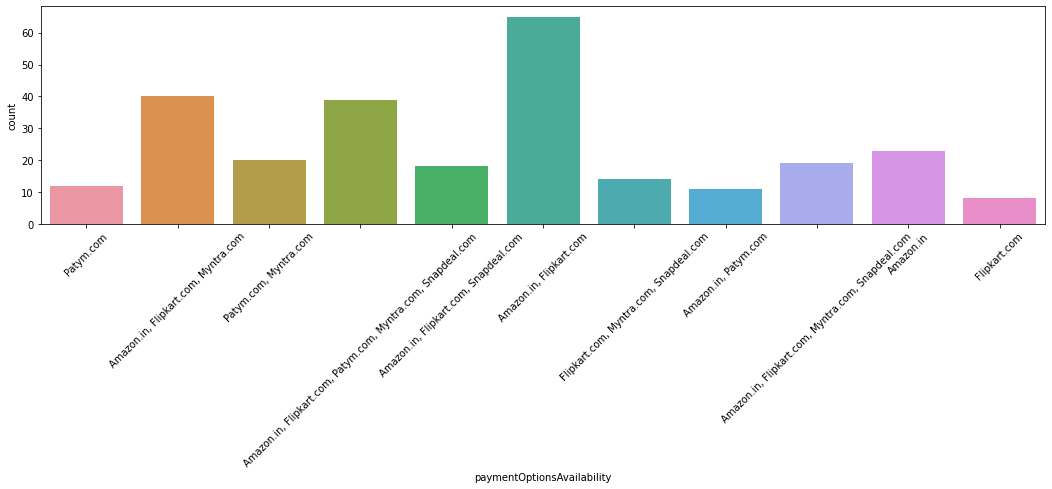

-----------------------------------------------------------------------------------------------------------------------------
Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Flipkart.com                               15
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: fastDelivery, dtype: int64


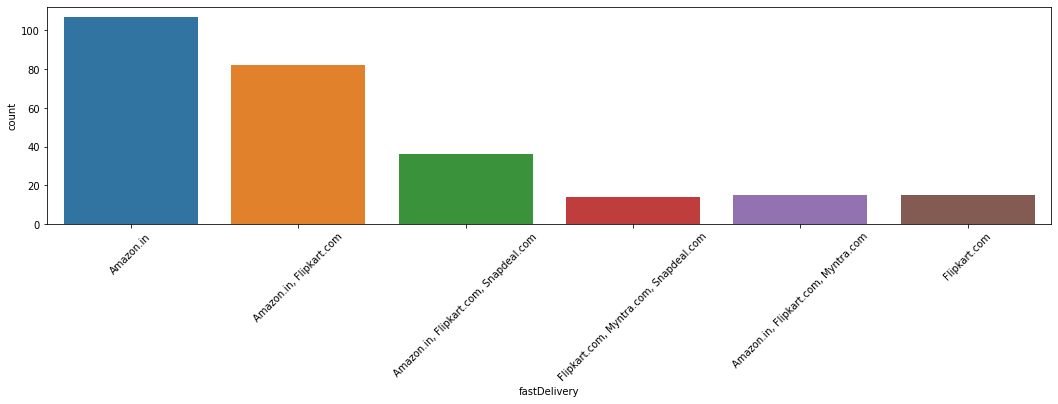

-----------------------------------------------------------------------------------------------------------------------------
Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Flipkart.com                                                    15
Amazon.in, Paytm.com                                            15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: custInfoPrivacy, dtype: int64


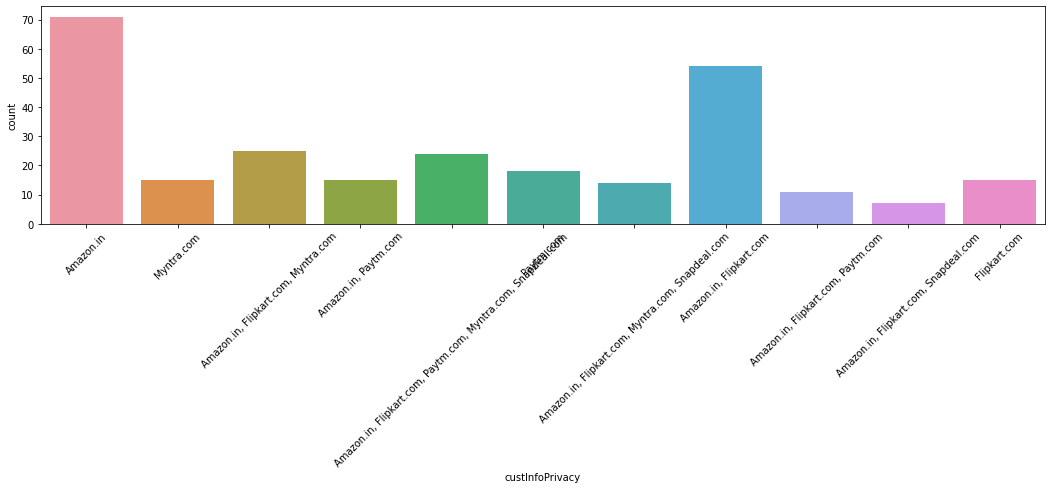

-----------------------------------------------------------------------------------------------------------------------------
Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Paytm.com                                                       15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: finInfoSecurity, dtype: int64


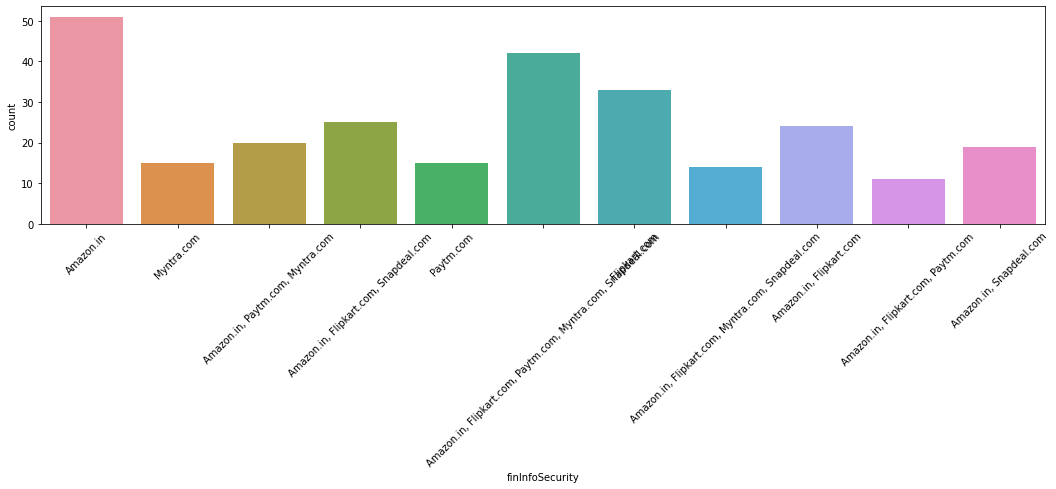

-----------------------------------------------------------------------------------------------------------------------------
Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: perceivedTrustworthiness, dtype: int64


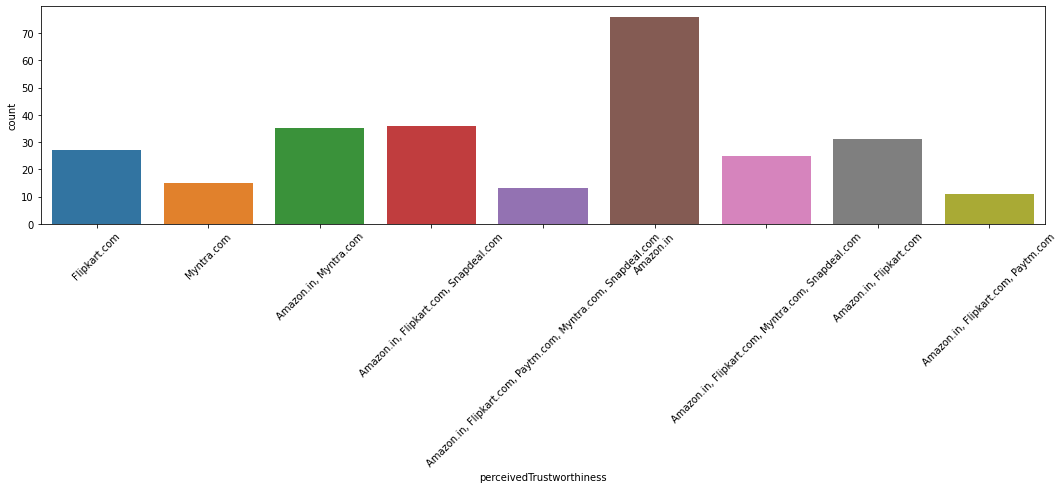

-----------------------------------------------------------------------------------------------------------------------------
Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: multiChannelAssistance, dtype: int64


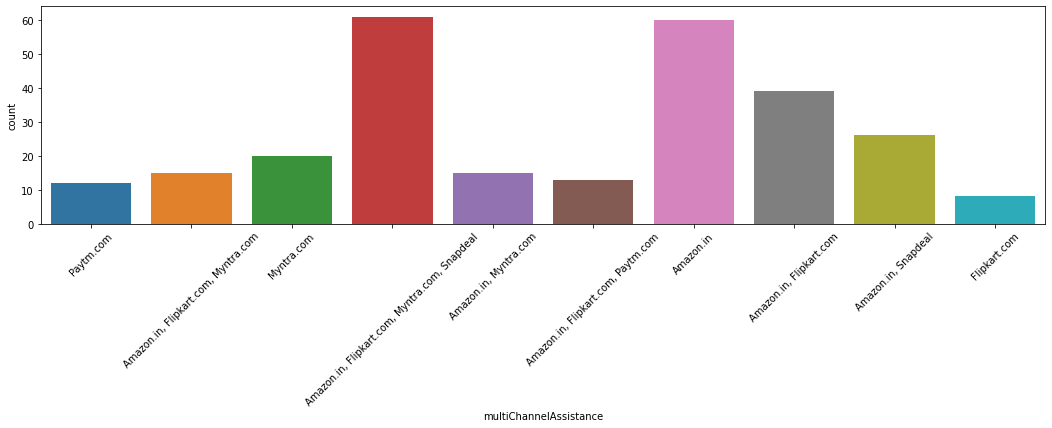

-----------------------------------------------------------------------------------------------------------------------------
Amazon.in                                57
Paytm.com                                38
Amazon.in, Flipkart.com                  38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: longLoginTime, dtype: int64


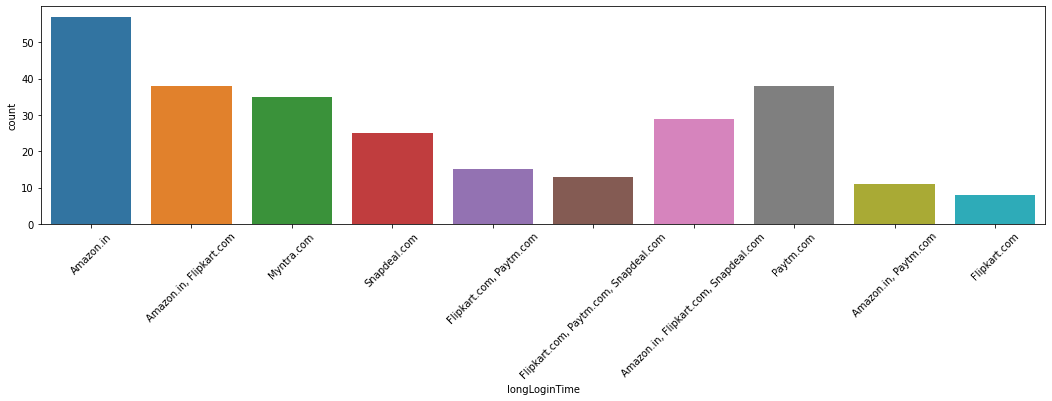

-----------------------------------------------------------------------------------------------------------------------------
Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Flipkart.com                           15
Paytm.com                              15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: longDisplayTime, dtype: int64


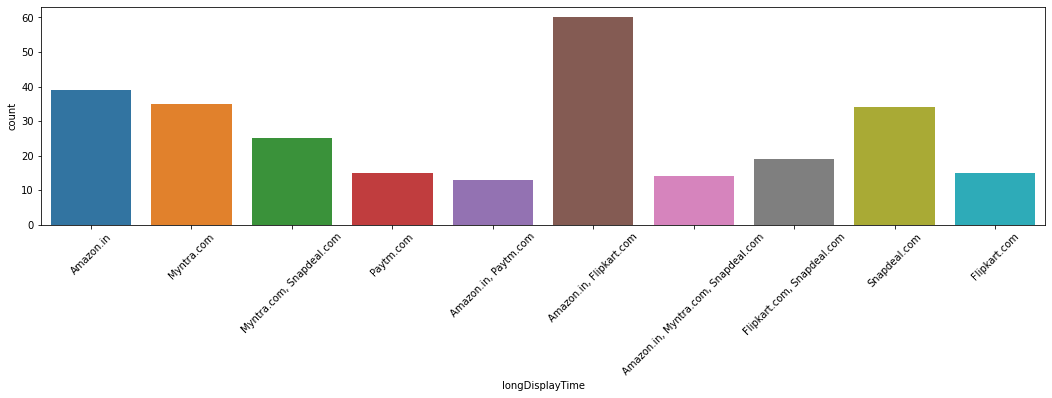

-----------------------------------------------------------------------------------------------------------------------------
Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Flipkart.com               38
Amazon.in                  38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: latePriceDeclare, dtype: int64


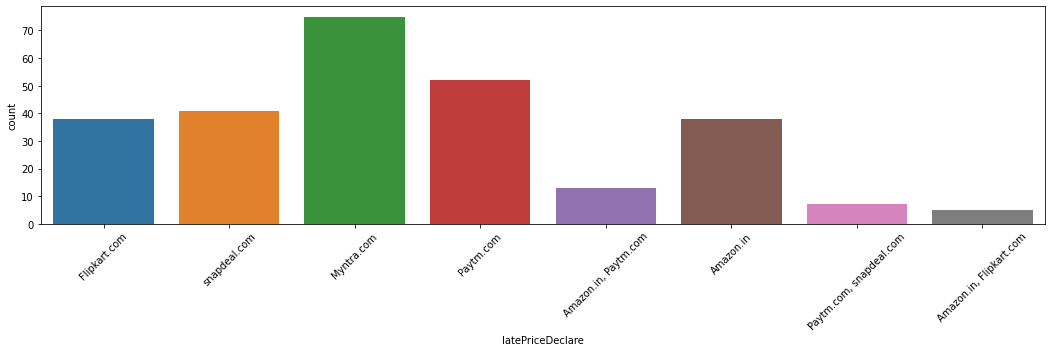

-----------------------------------------------------------------------------------------------------------------------------
Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: longLoadingTime, dtype: int64


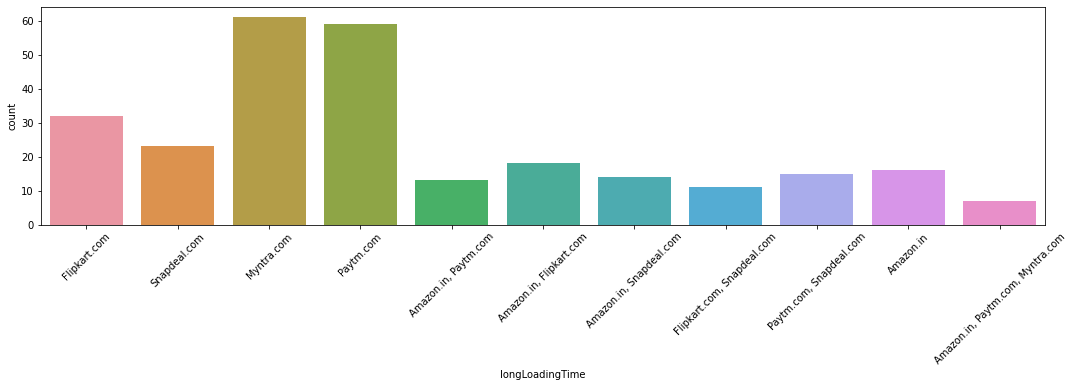

-----------------------------------------------------------------------------------------------------------------------------
Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: limitedPaymentMode, dtype: int64


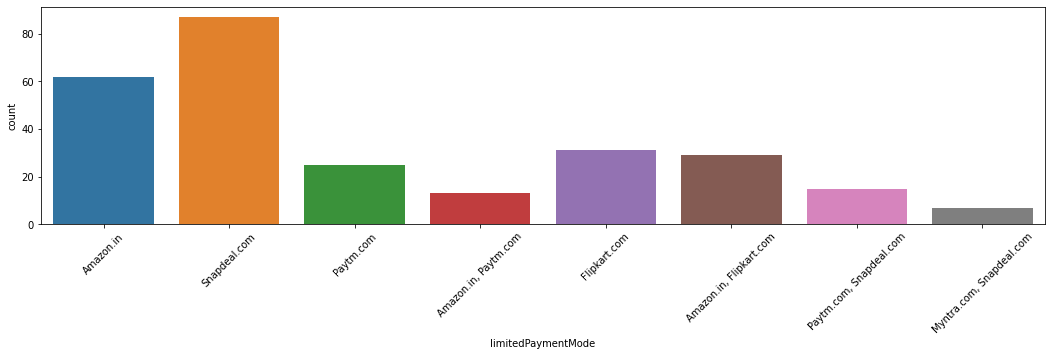

-----------------------------------------------------------------------------------------------------------------------------
Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: lateDelivery, dtype: int64


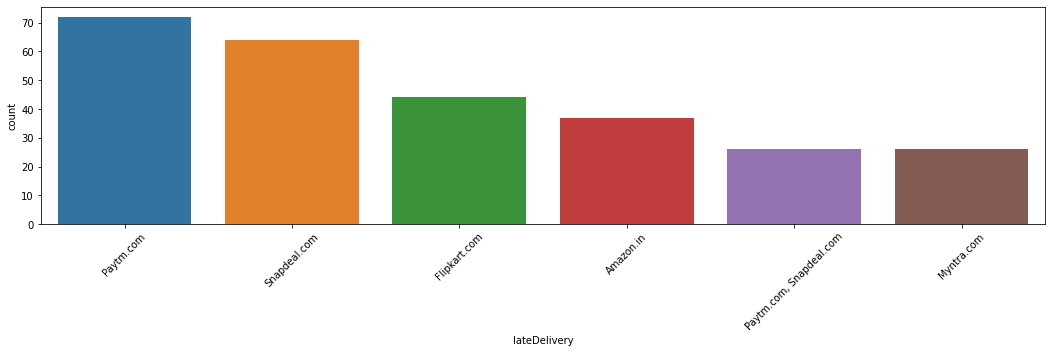

-----------------------------------------------------------------------------------------------------------------------------
Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: webAppDesignChange, dtype: int64


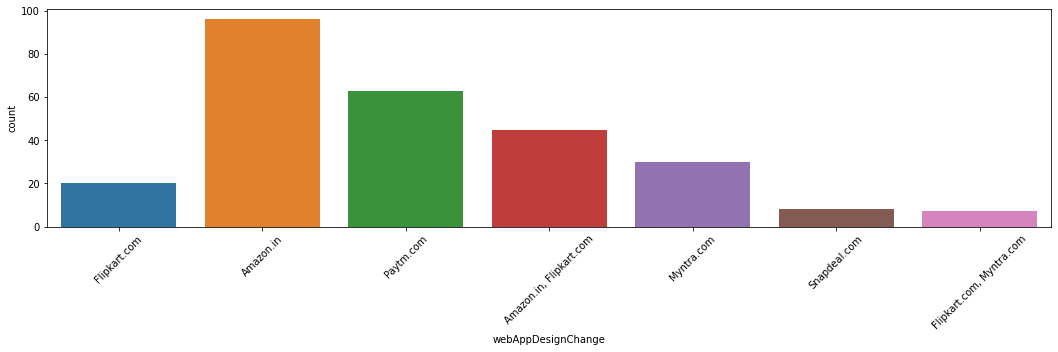

-----------------------------------------------------------------------------------------------------------------------------
Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: pageDisruption, dtype: int64


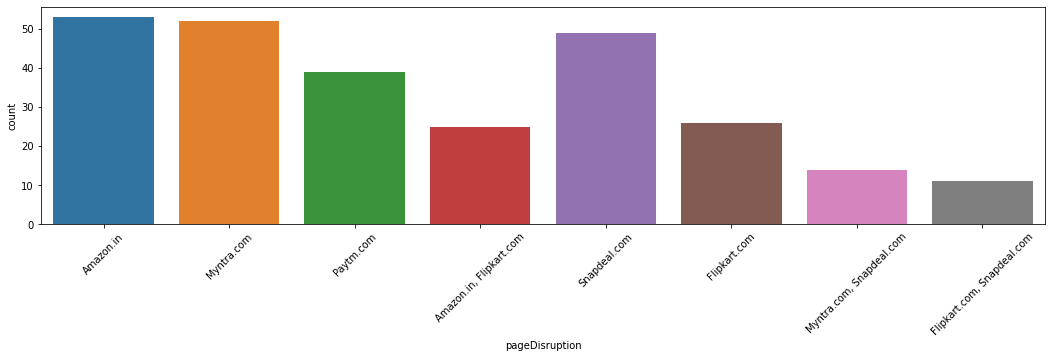

-----------------------------------------------------------------------------------------------------------------------------
Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: webAppEfficiency, dtype: int64


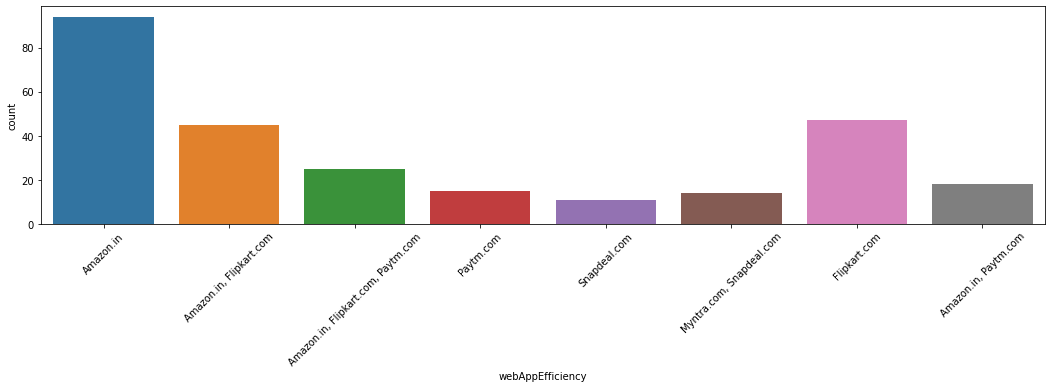

-----------------------------------------------------------------------------------------------------------------------------
Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: recommendation, dtype: int64


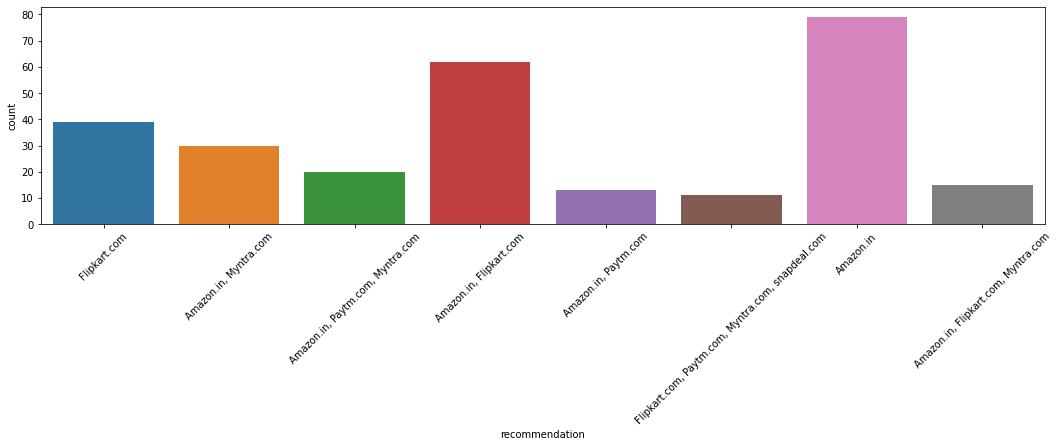

-----------------------------------------------------------------------------------------------------------------------------


In [48]:
for col in ecommerce_columns:
    print(df[col].value_counts())
    plt.figure(figsize=(18,4))
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.show()
    print("_______________________________________________________________________________")

Female    181
Male       88
Name: gender, dtype: int64


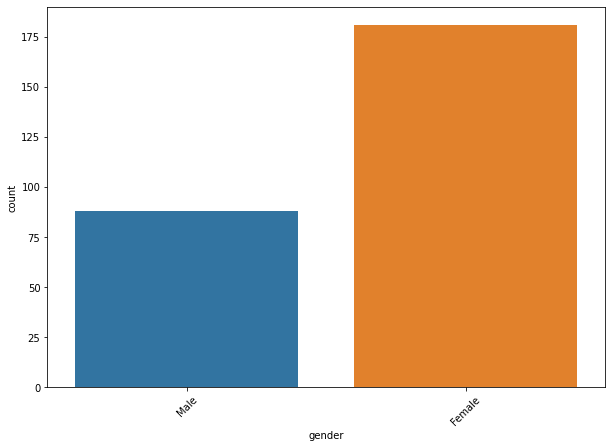

_________________________________________________________--
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: age, dtype: int64


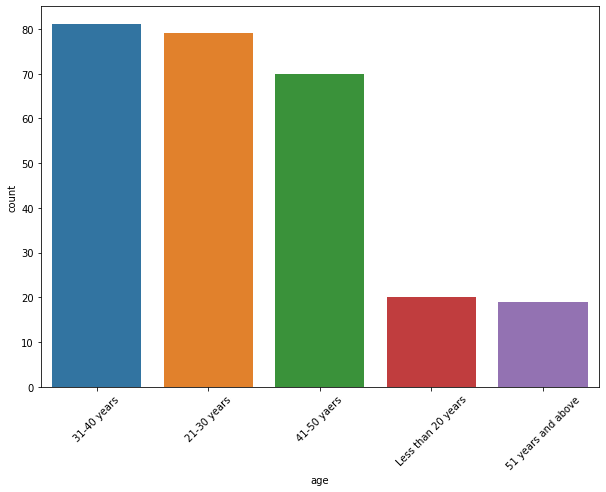

_________________________________________________________--
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: city, dtype: int64


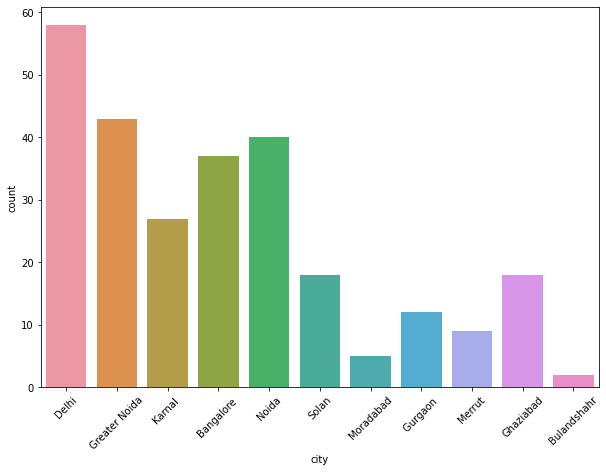

_________________________________________________________--
201308    38
132001    19
201310    18
110044    16
173212     9
250001     9
173229     9
560037     8
132036     8
560010     8
122018     8
110011     7
201306     7
110008     7
110014     6
110018     6
244001     5
201312     5
530068     5
201305     5
201009     5
201008     5
201005     4
201001     4
201304     4
110039     4
110030     4
110009     4
560018     4
560003     4
122009     4
560002     4
110042     4
201303     4
560013     3
203001     2
560001     1
203207     1
203202     1
Name: pinCode, dtype: int64


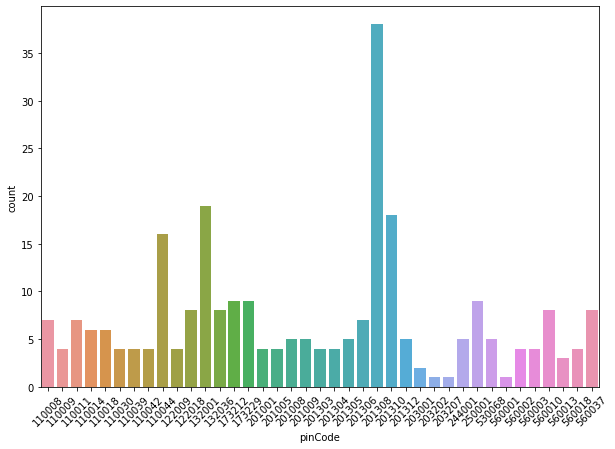

_________________________________________________________--
Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: shoppingSince, dtype: int64


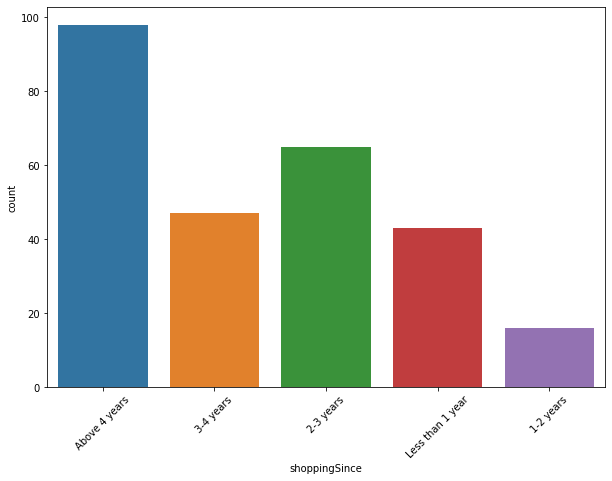

_________________________________________________________--
Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: shoppingFrequency, dtype: int64


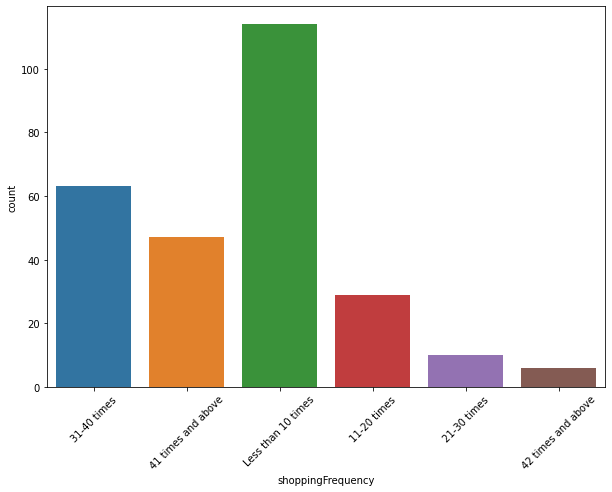

_________________________________________________________--
Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: internetAccessibility, dtype: int64


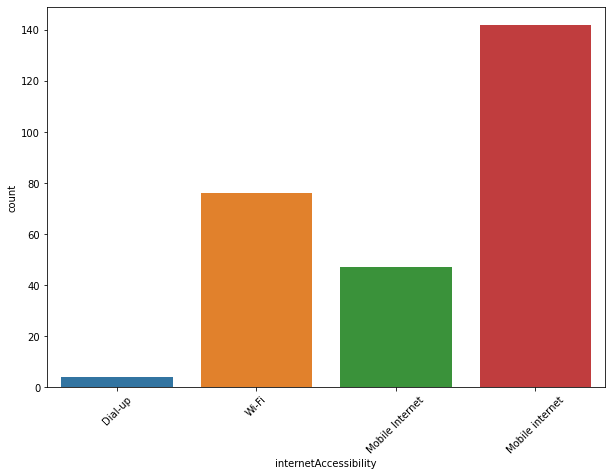

_________________________________________________________--
Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: deviceUsed, dtype: int64


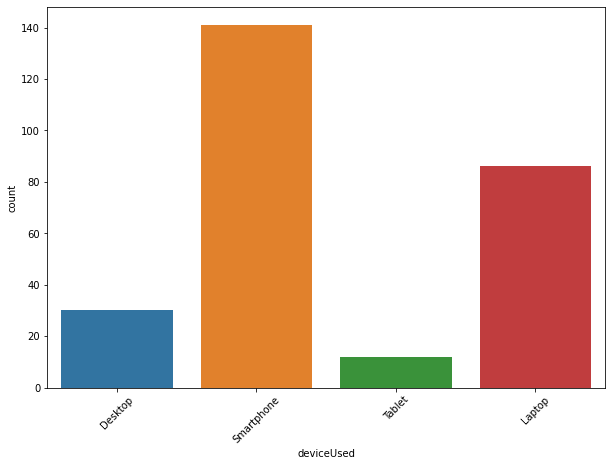

_________________________________________________________--
Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: screenSize, dtype: int64


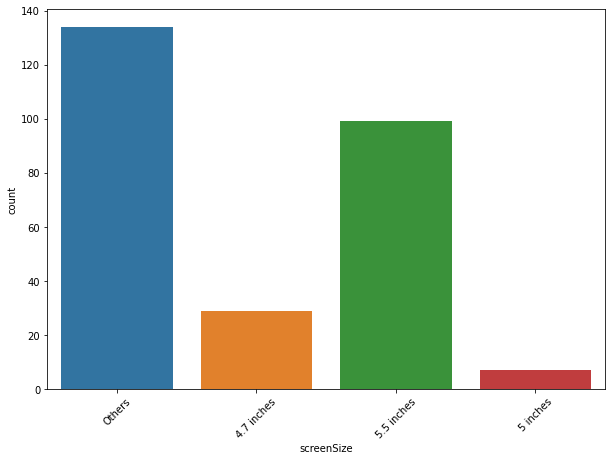

_________________________________________________________--
Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: OS, dtype: int64


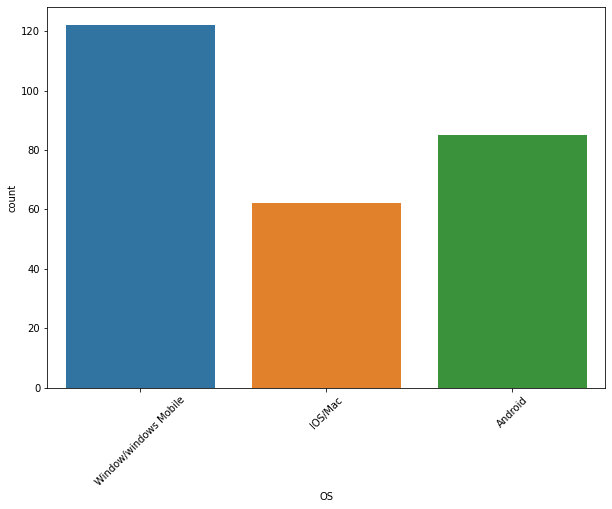

_________________________________________________________--
Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: browserUsed, dtype: int64


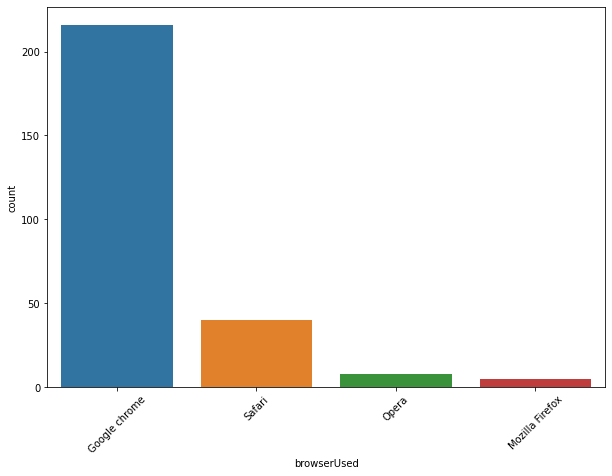

_________________________________________________________--
Search Engine        230
Content Marketing     20
Display Adverts       19
Name: channelFirstUsed, dtype: int64


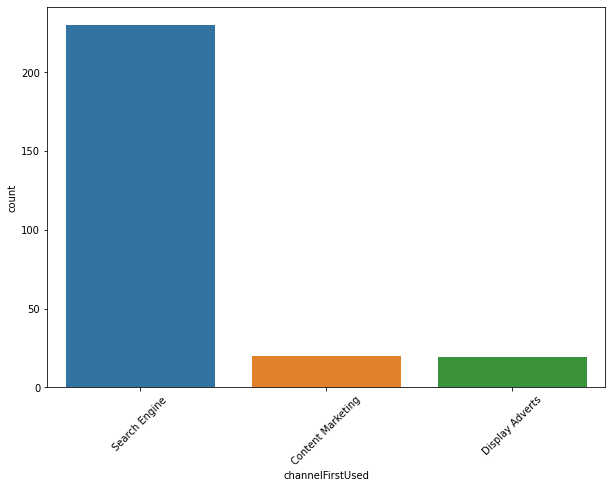

_________________________________________________________--
Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: loginMode, dtype: int64


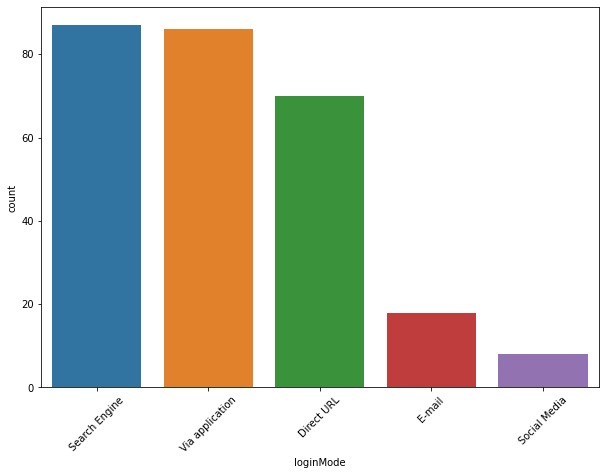

_________________________________________________________--
more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: timeSpentDeciding, dtype: int64


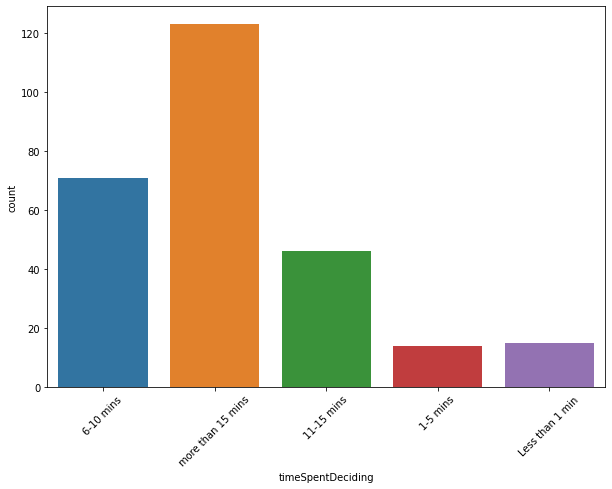

_________________________________________________________--
Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: paymentMode, dtype: int64


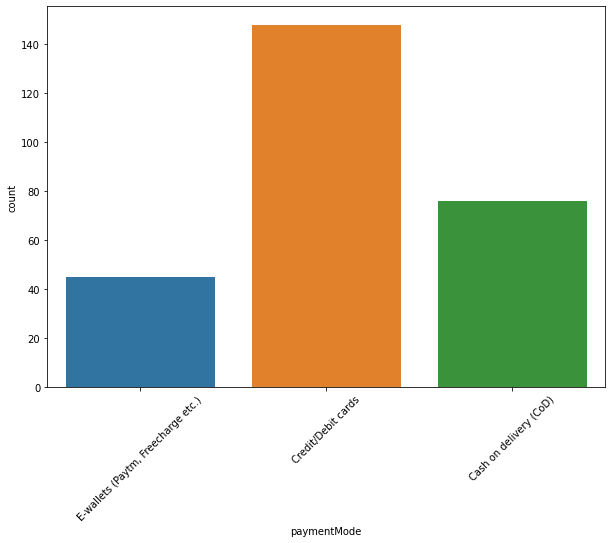

_________________________________________________________--
Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: cancellingFrequency, dtype: int64


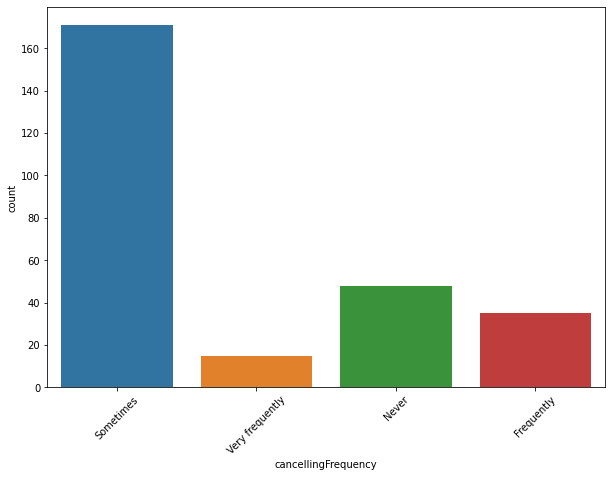

_________________________________________________________--
Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: cancellationReason, dtype: int64


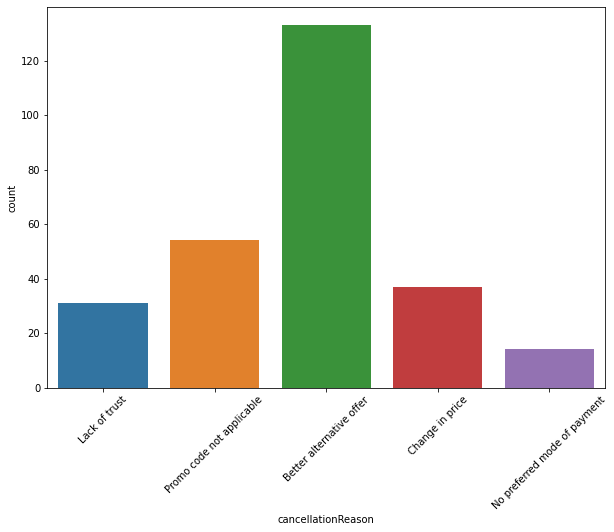

_________________________________________________________--
Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: contentReadability, dtype: int64


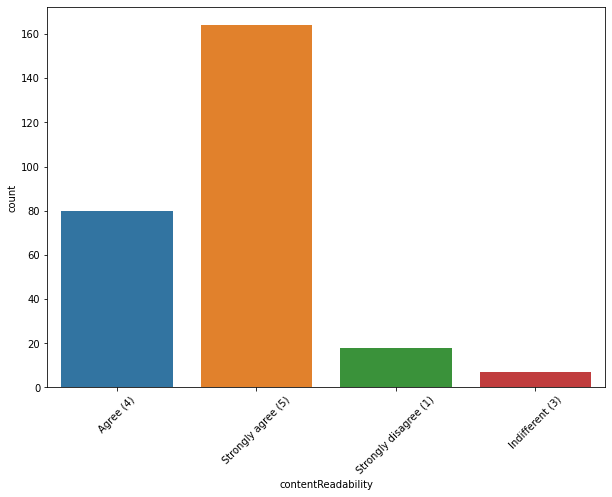

_________________________________________________________--
Strongly agree (5)    116
Agree (4)              92
Indifferent (3)        43
Disagree (2)           18
Name: similarProductInfo, dtype: int64


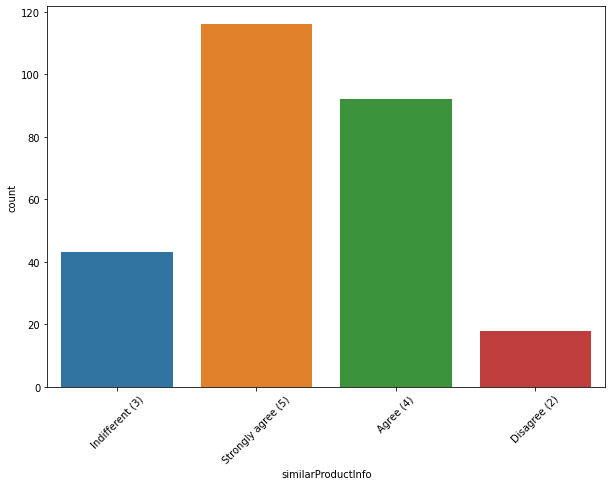

_________________________________________________________--
Agree (4)                101
Strongly agree (5)        87
Indifferent (3)           52
Disagree (2)              18
Strongly disagree (1)     11
Name: sellerProductInfo, dtype: int64


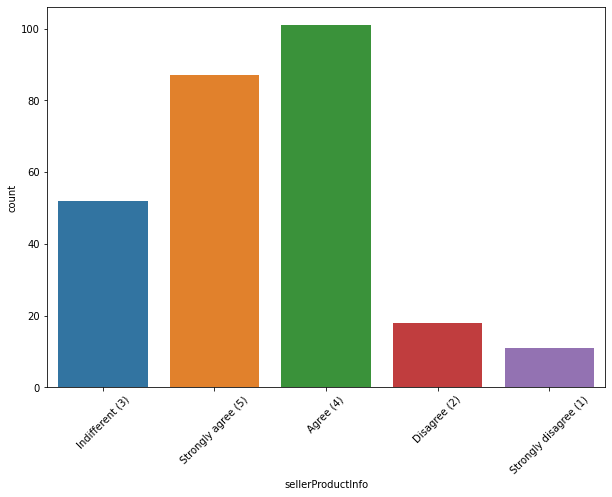

_________________________________________________________--
Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Disagree (2)              12
Name: productInfoClarity, dtype: int64


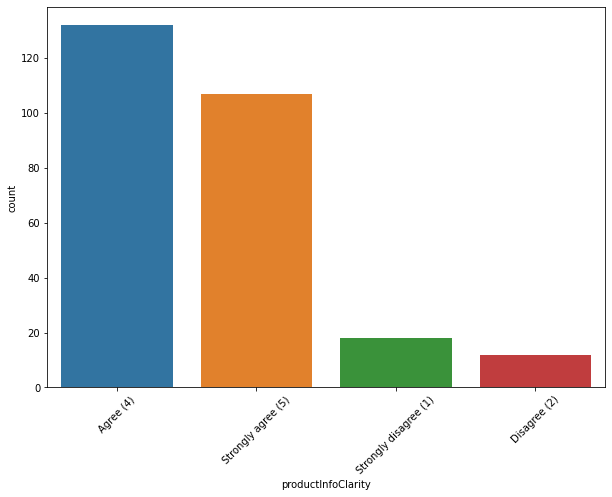

_________________________________________________________--
Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Disagree (2)               5
Name: navigationEase, dtype: int64


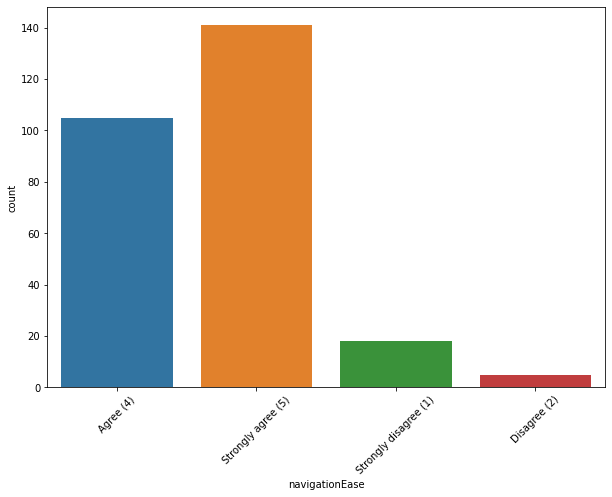

_________________________________________________________--
Strongly agree (5)       115
Agree (4)                112
Disagree (2)              18
Strongly disagree (1)     12
Indifferent (3)           12
Name: loadingProcessingSpeed, dtype: int64


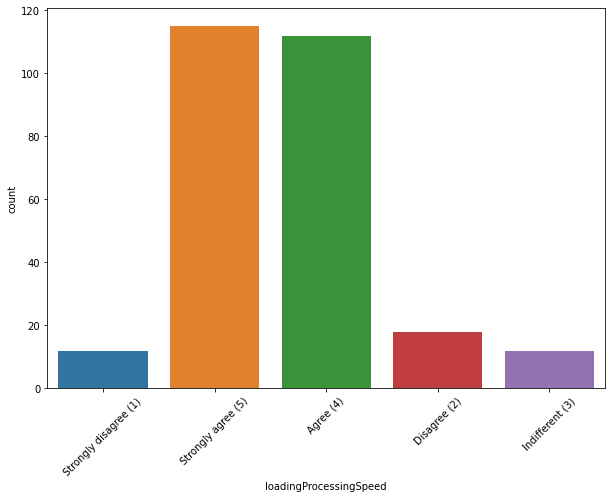

_________________________________________________________--
Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Disagree (2)              12
Indifferent (3)            5
Name: userFrienlyInterface, dtype: int64


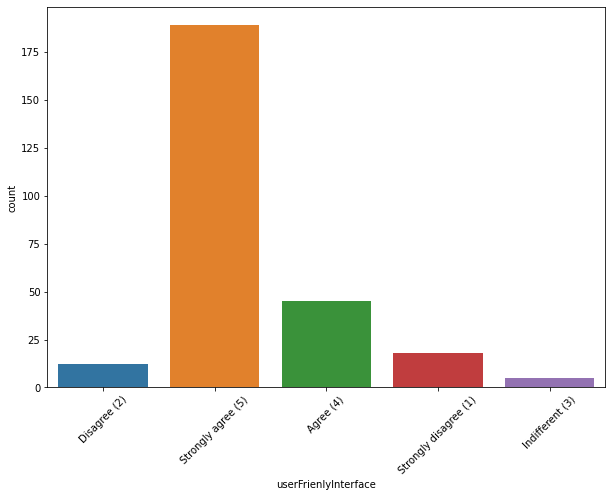

_________________________________________________________--
Strongly agree (5)    159
Agree (4)              80
Disagree (2)           30
Name: conveninetPaymentMode, dtype: int64


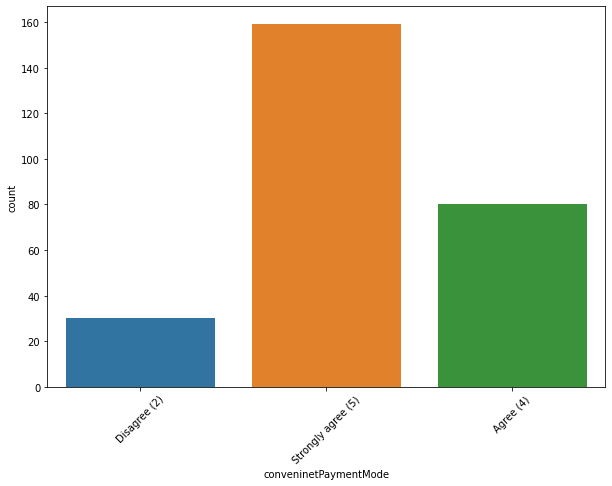

_________________________________________________________--
Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
Indifferent (3)        12
Name: timelyFulfilmentTrust, dtype: int64


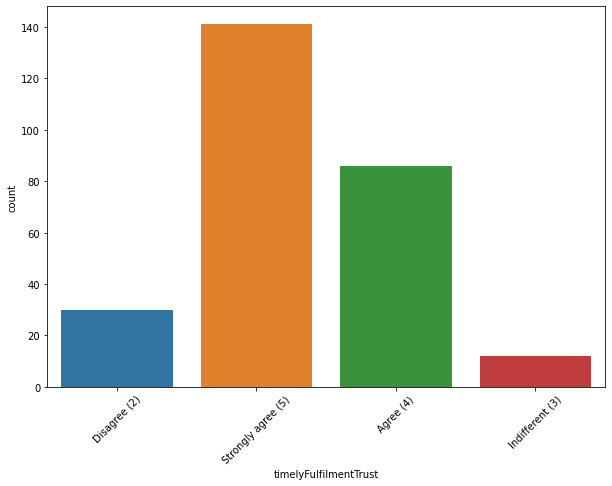

_________________________________________________________--
Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
Indifferent (3)           15
Name: custSupportResponse, dtype: int64


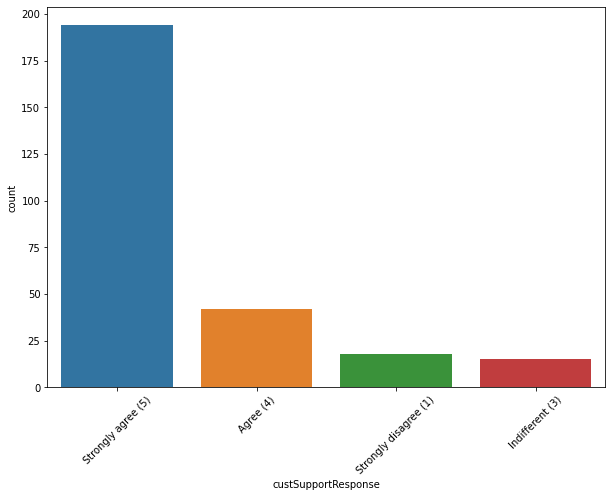

_________________________________________________________--
Strongly agree (5)    185
Agree (4)              58
Indifferent (3)        26
Name: custPrivacyGuarantee, dtype: int64


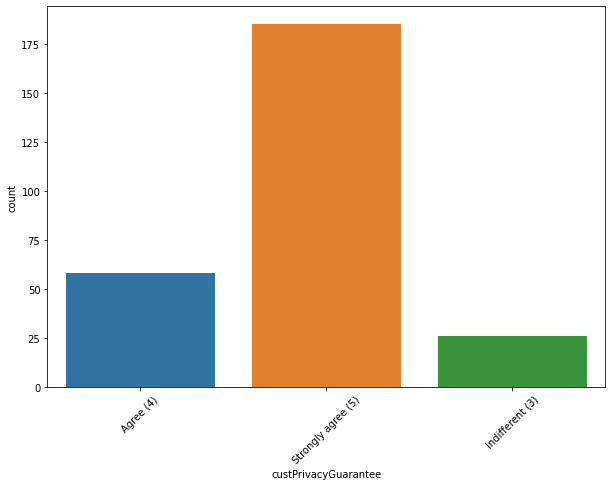

_________________________________________________________--
Strongly agree (5)       149
Agree (4)                 94
Indifferent (3)           15
Strongly disagree (1)     11
Name: variousChannelResponses, dtype: int64


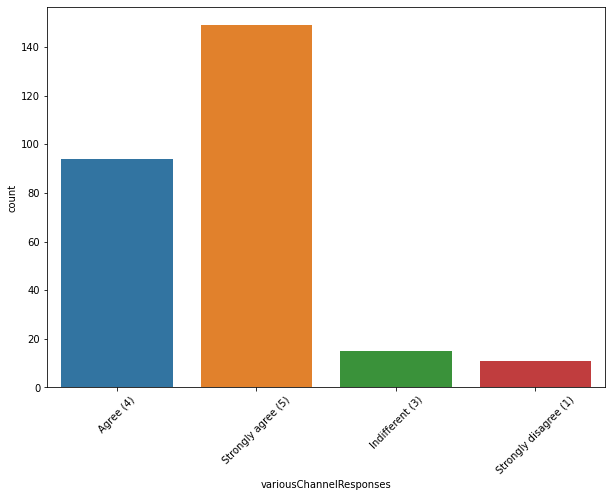

_________________________________________________________--
Strongly agree (5)       105
Agree (4)                 85
Indifferent (3)           50
Strongly disagree (1)     18
Disagree (2)              11
Name: benefit, dtype: int64


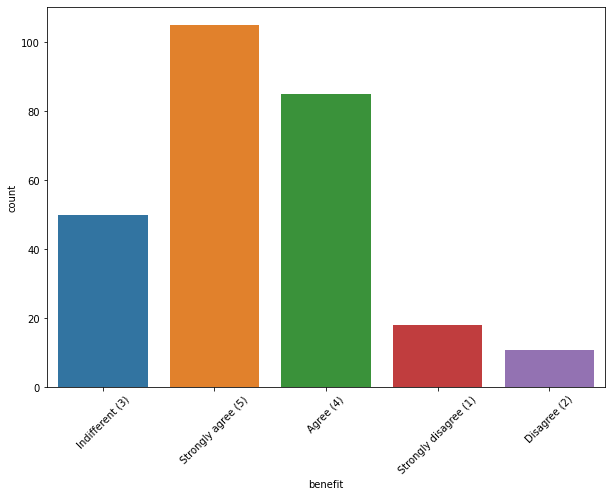

_________________________________________________________--
Strongly agree (5)       86
Indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Disagree (2)             19
Name: enjoy, dtype: int64


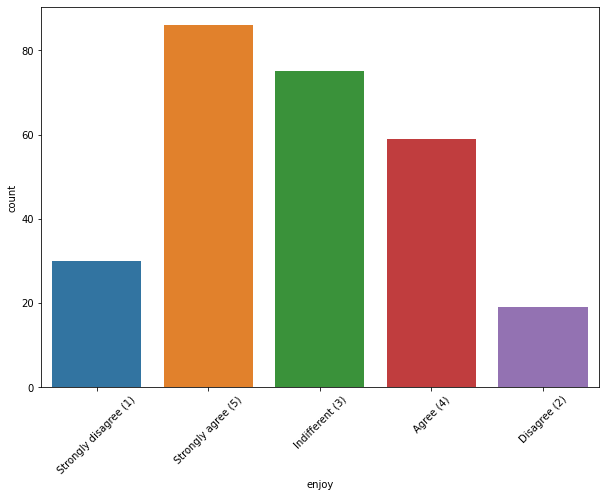

_________________________________________________________--
Strongly agree (5)    146
Agree (4)              78
Indifferent (3)        33
Disagree (2)           12
Name: convenience, dtype: int64


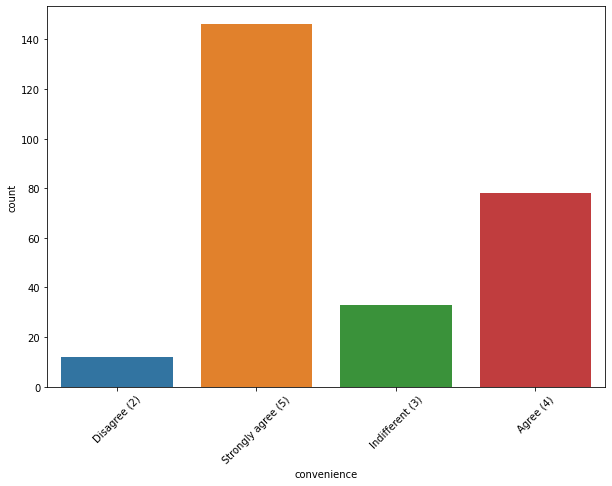

_________________________________________________________--
Strongly agree (5)    198
Agree (4)              51
Disagree (2)           20
Name: returnReplacementPolicy, dtype: int64


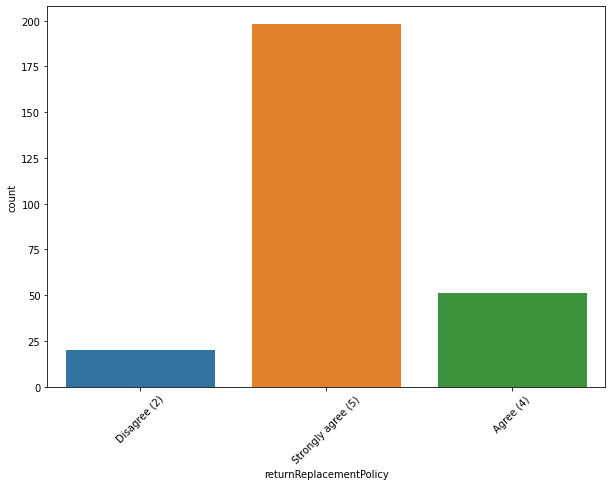

_________________________________________________________--
Strongly agree (5)       115
Agree (4)                 64
Indifferent (3)           64
Disagree (2)              15
Strongly disagree (1)     11
Name: loyaltyProgramsAccess, dtype: int64


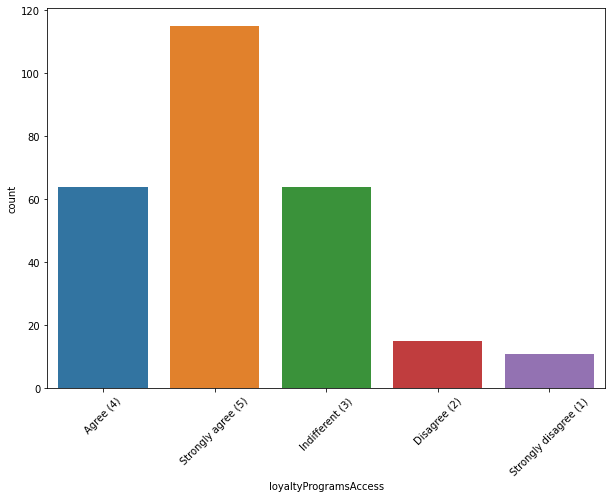

_________________________________________________________--
Strongly agree (5)    133
Agree (4)              80
Indifferent (3)        56
Name: infoSatisfaction, dtype: int64


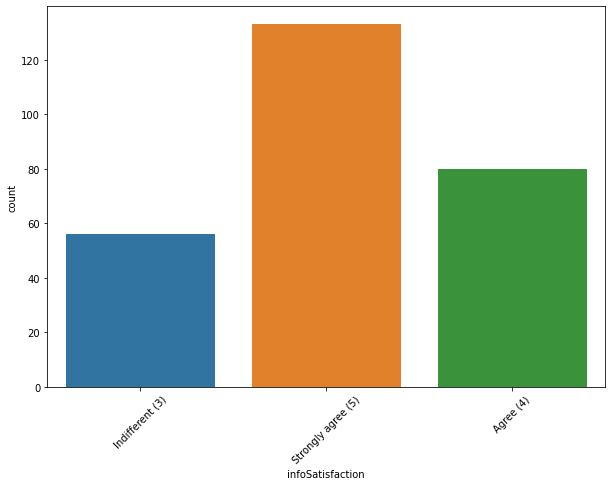

_________________________________________________________--
Strongly agree (5)    175
Agree (4)              86
Disagree (2)            8
Name: siteQualitySatisfaction, dtype: int64


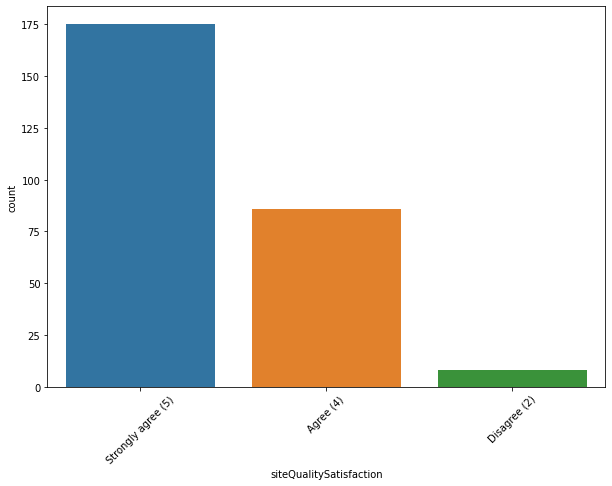

_________________________________________________________--
Strongly agree (5)    164
Agree (4)              54
Indifferent (3)        40
Disagree (2)           11
Name: netBenefitSatisfaction, dtype: int64


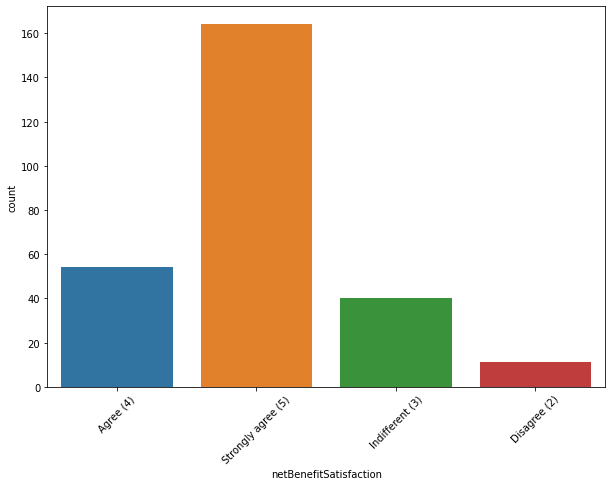

_________________________________________________________--
Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Disagree (2)               7
Indifferent (3)            5
Name: trust, dtype: int64


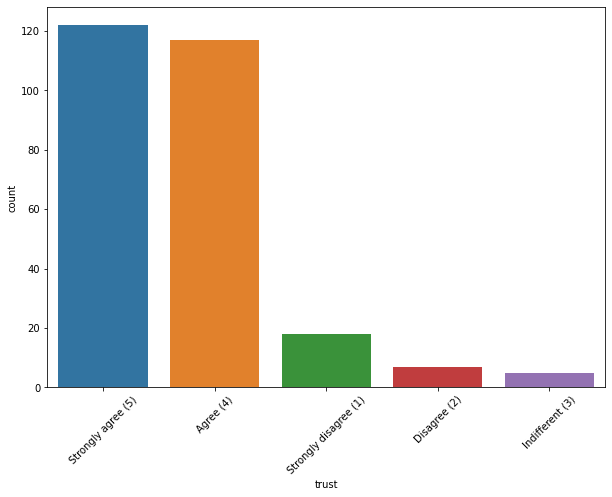

_________________________________________________________--
Strongly agree (5)    111
Agree (4)              94
Indifferent (3)        57
Disagree (2)            7
Name: productSeveralCategory, dtype: int64


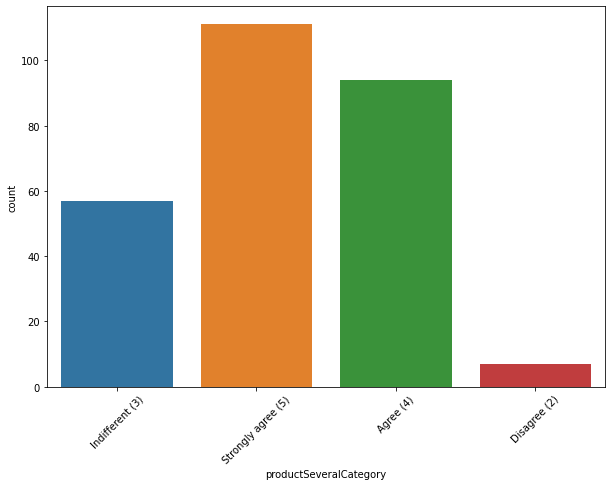

_________________________________________________________--
Strongly agree (5)    135
Agree (4)              98
Indifferent (3)        31
Disagree (2)            5
Name: relevantProductInfo, dtype: int64


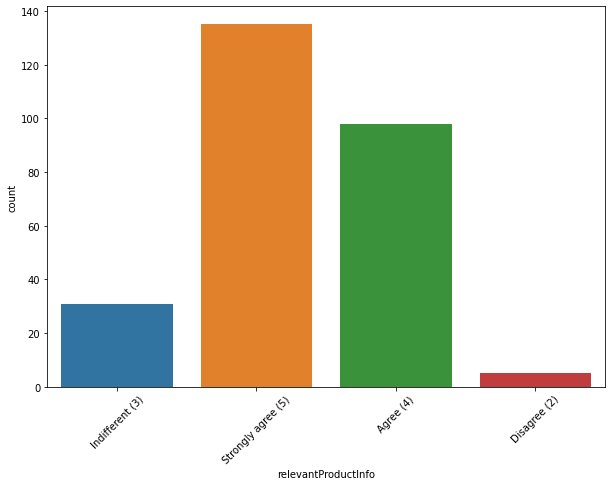

_________________________________________________________--
Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
Indifferent (3)        15
Name: monetarySavings, dtype: int64


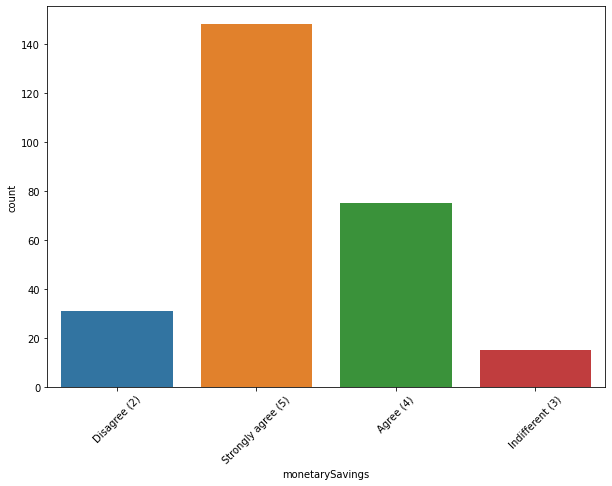

_________________________________________________________--
Agree (4)             138
Indifferent (3)        77
Strongly agree (5)     54
Name: patronizingConvenience, dtype: int64


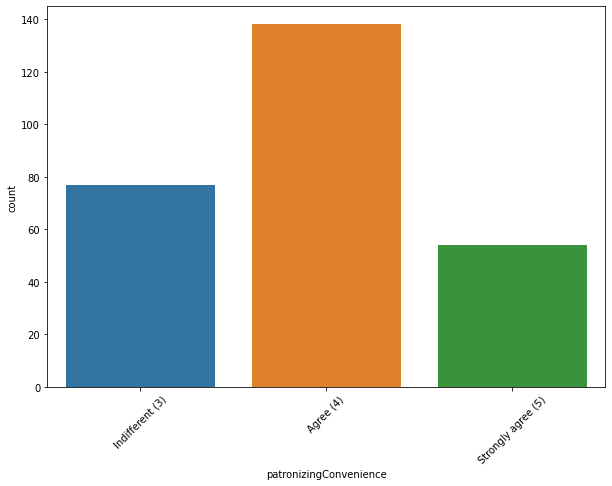

_________________________________________________________--
Agree (4)                101
Indifferent (3)           59
Strongly agree (5)        54
Disagree (2)              50
Strongly disagree (1)      5
Name: adventureSense, dtype: int64


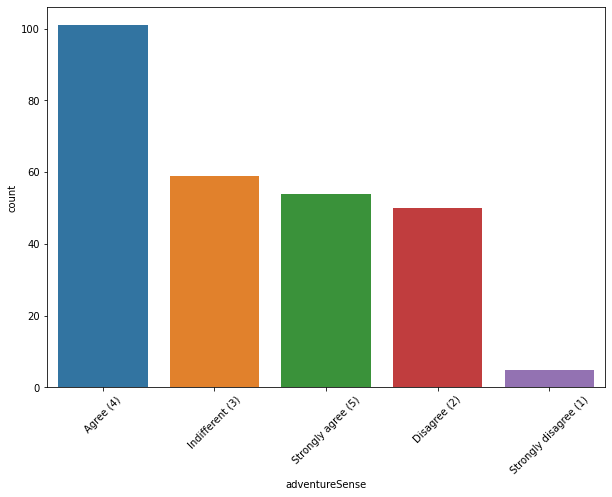

_________________________________________________________--
Indifferent (3)          100
Agree (4)                 59
Strongly agree (5)        48
Strongly disagree (1)     33
Disagree (2)              29
Name: socialStatus, dtype: int64


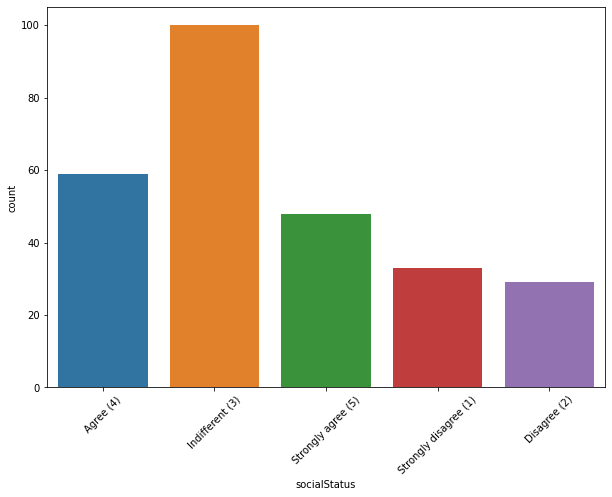

_________________________________________________________--
Indifferent (3)          101
Strongly agree (5)        65
Agree (4)                 63
Disagree (2)              22
Strongly disagree (1)     18
Name: gratification, dtype: int64


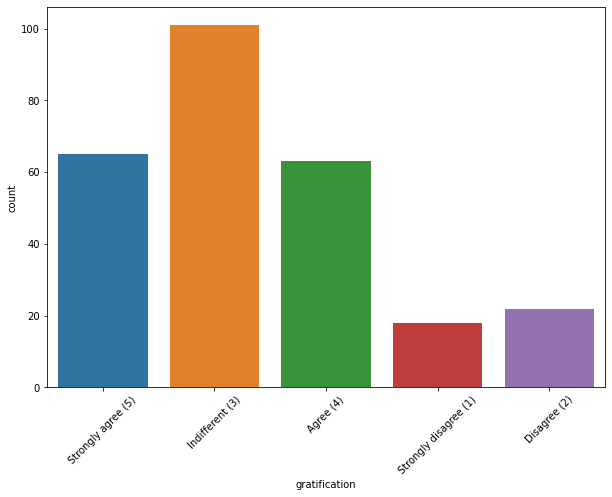

_________________________________________________________--
Agree (4)                88
Indifferent (3)          88
Strongly agree (5)       38
Strongly disagree (1)    33
Disagree (2)             22
Name: roleFulfilment, dtype: int64


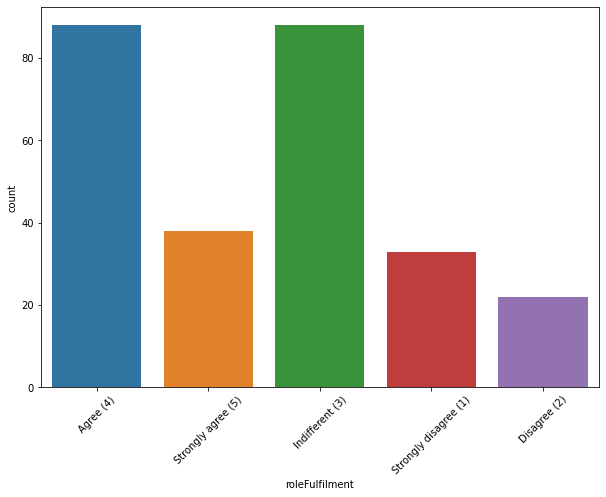

_________________________________________________________--
Agree (4)             149
Strongly agree (5)     82
Indifferent (3)        38
Name: moneyWorthy, dtype: int64


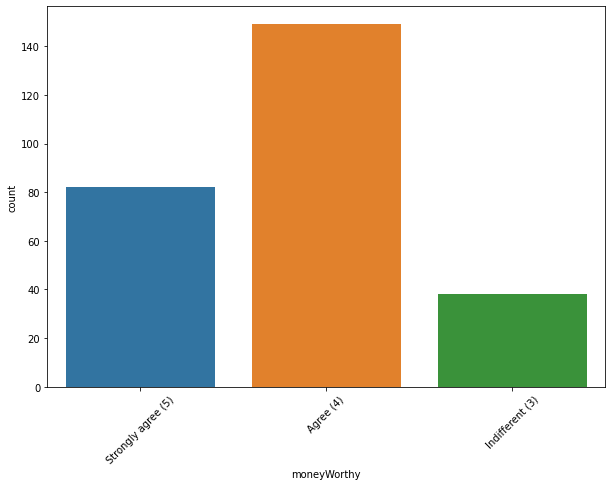

_________________________________________________________--
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: shoppedFrom, dtype: int64


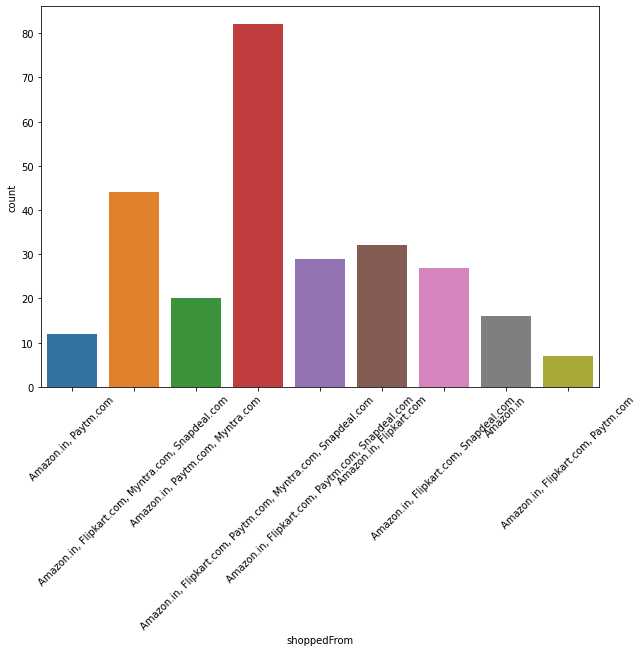

_________________________________________________________--
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com                                         44
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: easyWebApp, dtype: int64


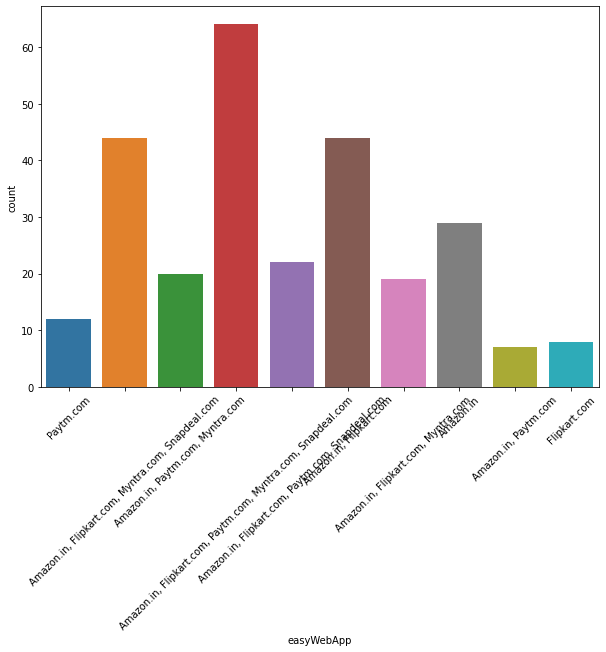

_________________________________________________________--
Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Myntra.com                                                      15
Amazon.in, Myntra.com                                           15
Flipkart.com, Myntra.com                                        15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: visuallyAppealingWebApp, dtype: int64


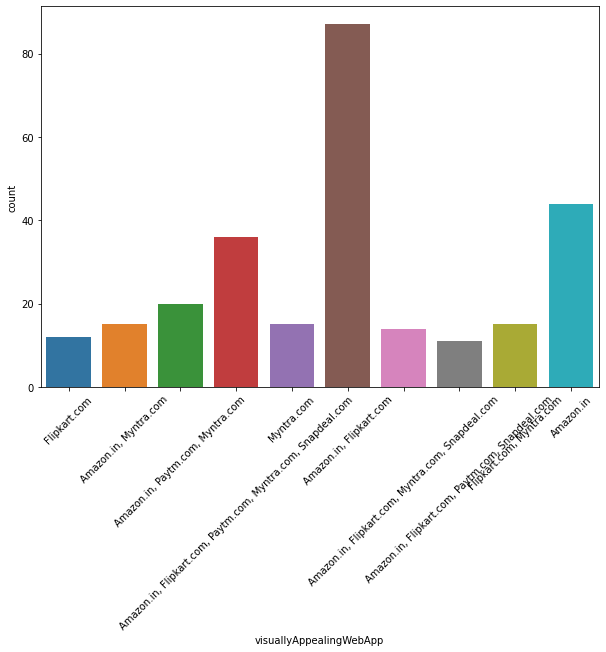

_________________________________________________________--
Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Myntra.com                                            15
Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: productVariety, dtype: int64


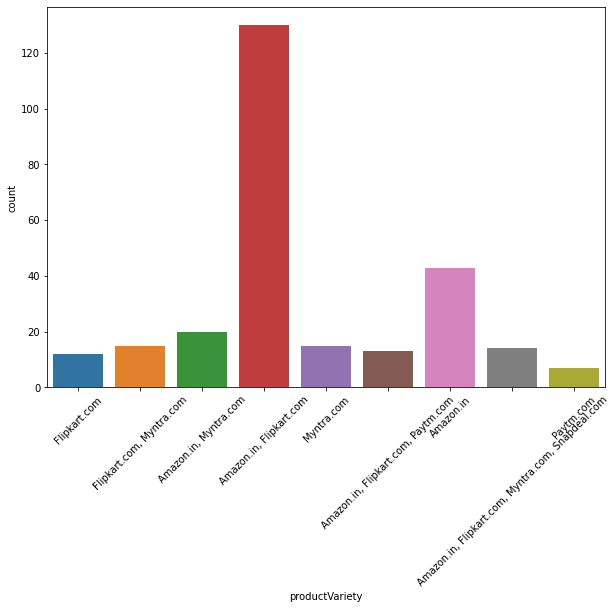

_________________________________________________________--
Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: completeProductInfo, dtype: int64


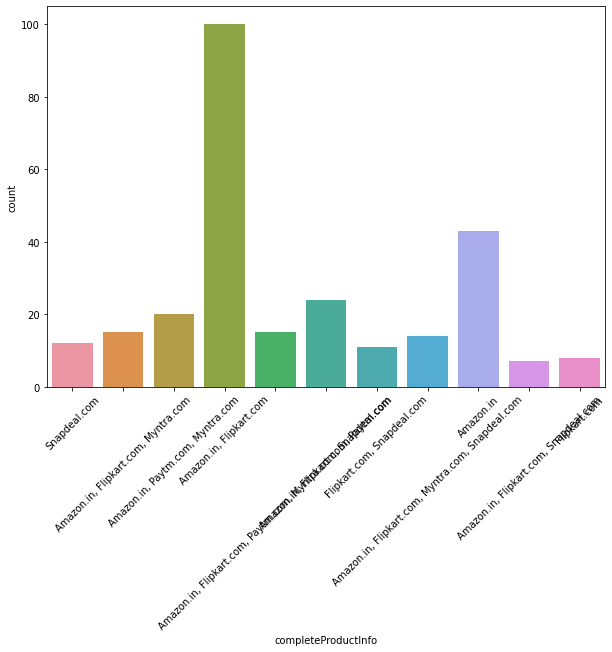

_________________________________________________________--
Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: fastWebApp, dtype: int64


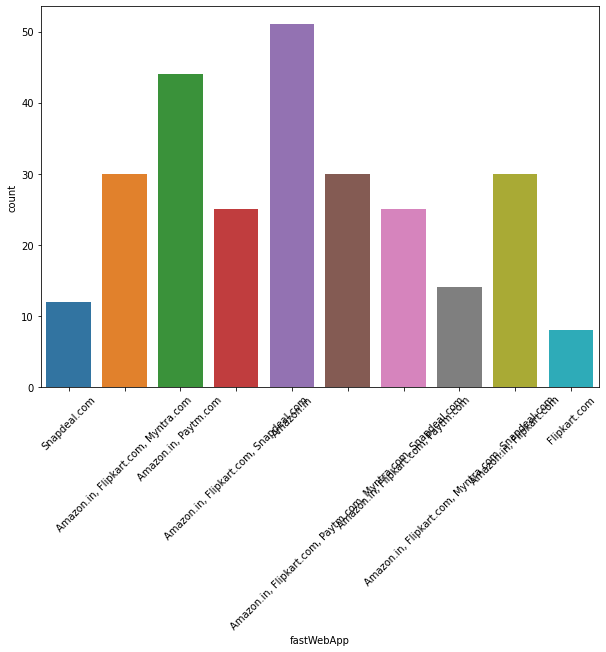

_________________________________________________________--
Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Myntra.com                                           15
Flipkart.com                                         15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: reliableWebApp, dtype: int64


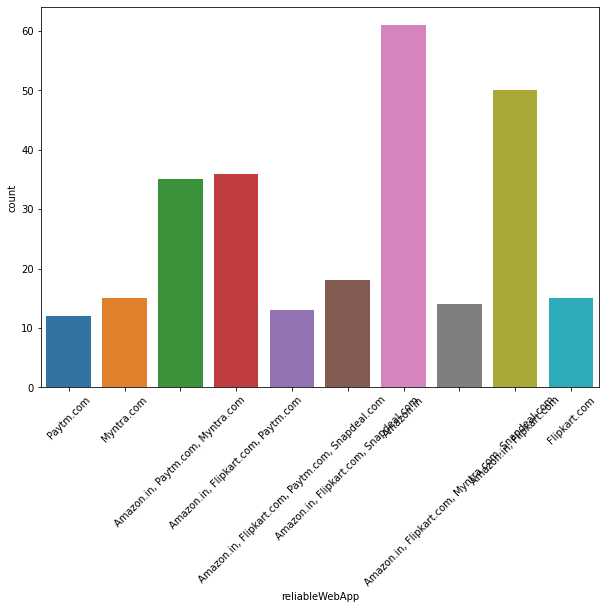

_________________________________________________________--
Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com                                                 15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: quickPurchase, dtype: int64


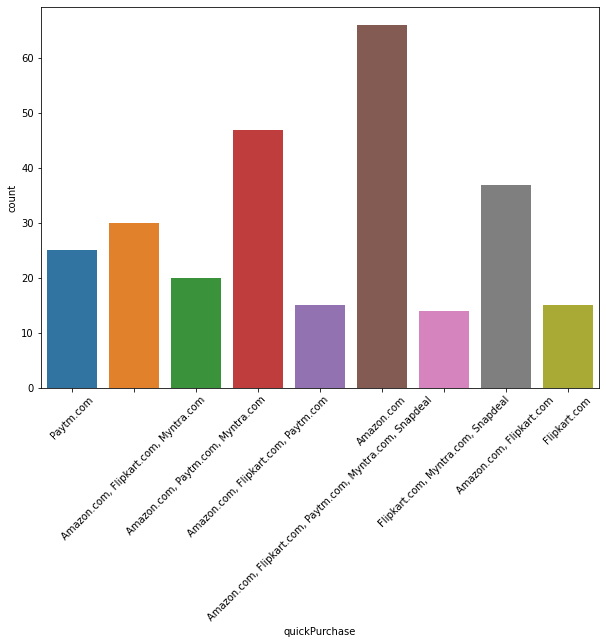

_________________________________________________________--
Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: paymentOptionsAvailability, dtype: int64


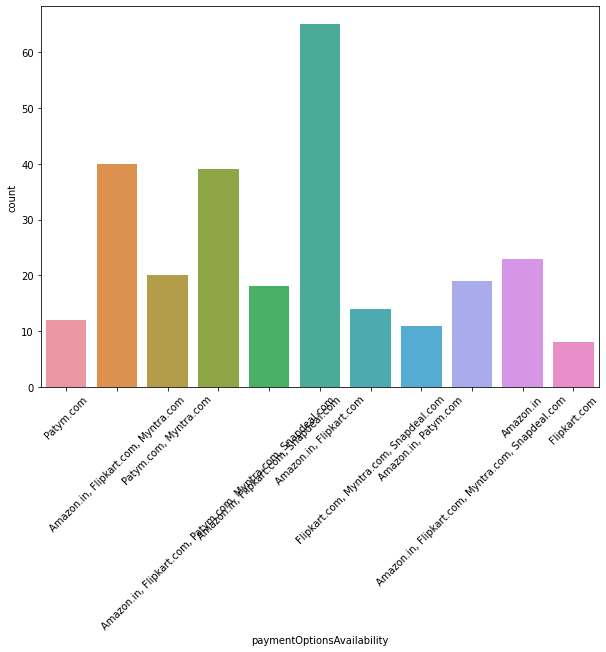

_________________________________________________________--
Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: fastDelivery, dtype: int64


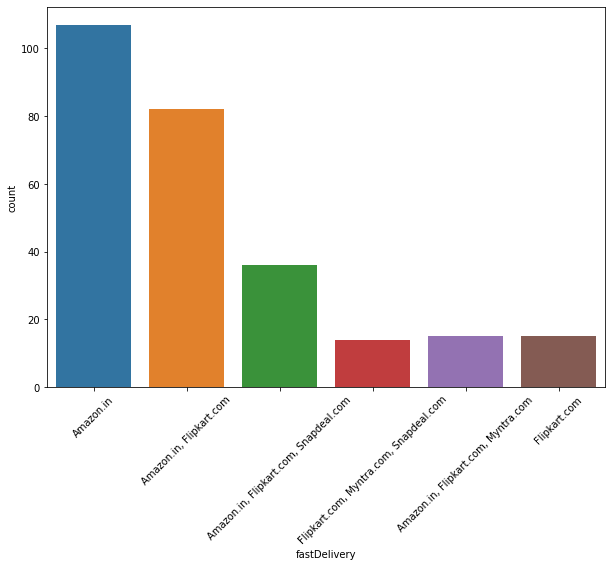

_________________________________________________________--
Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Myntra.com                                                      15
Flipkart.com                                                    15
Amazon.in, Paytm.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: custInfoPrivacy, dtype: int64


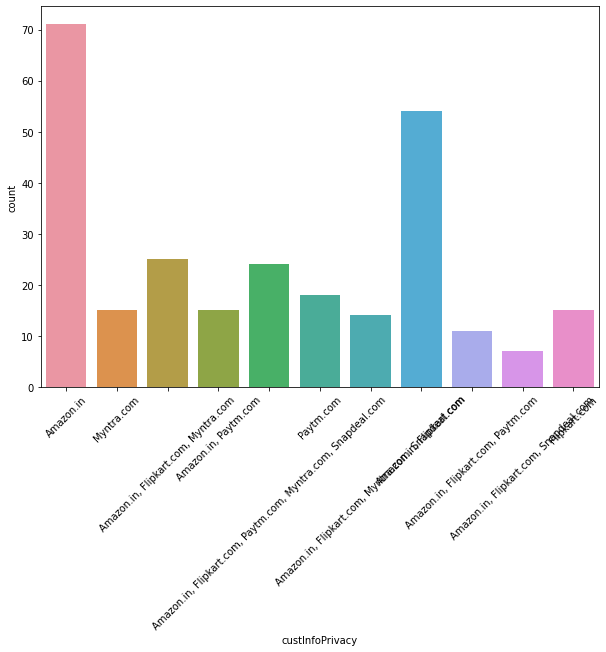

_________________________________________________________--
Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Paytm.com                                                       15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: finInfoSecurity, dtype: int64


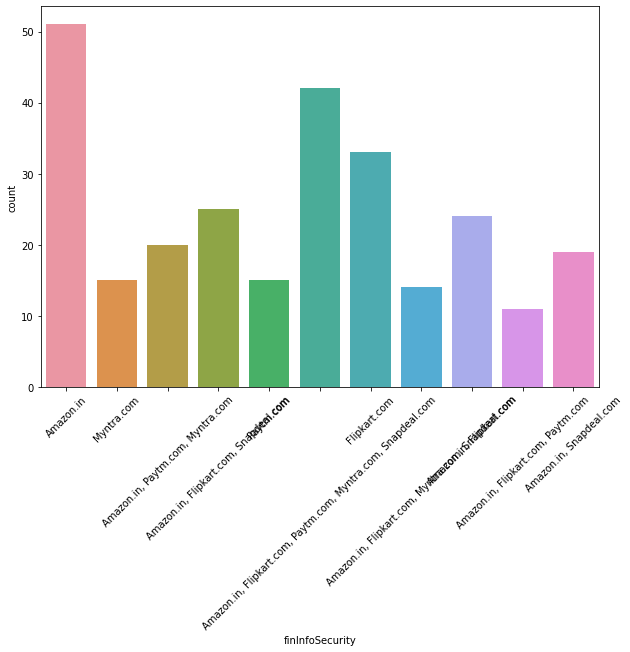

_________________________________________________________--
Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: perceivedTrustworthiness, dtype: int64


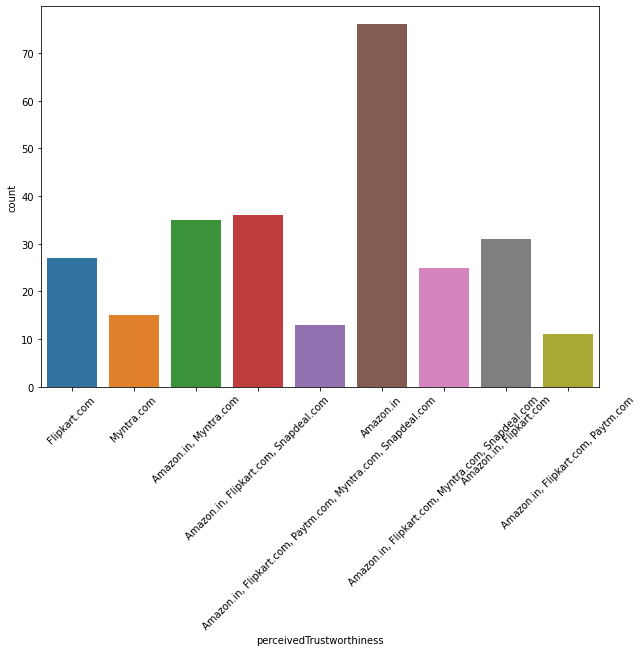

_________________________________________________________--
Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: multiChannelAssistance, dtype: int64


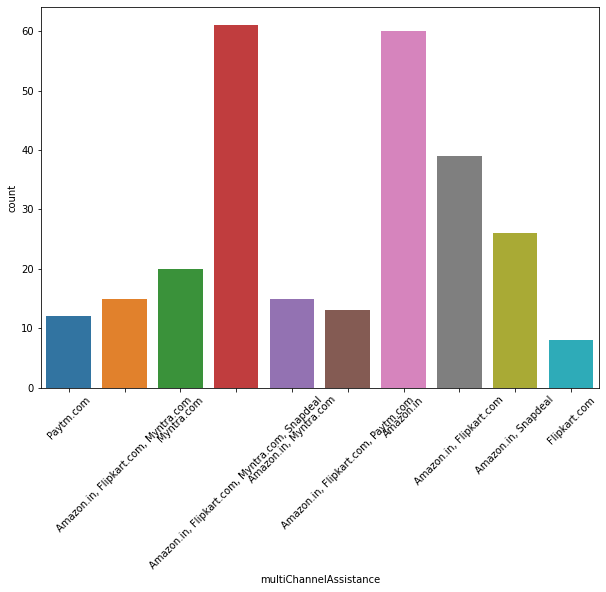

_________________________________________________________--
Amazon.in                                57
Paytm.com                                38
Amazon.in, Flipkart.com                  38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: longLoginTime, dtype: int64


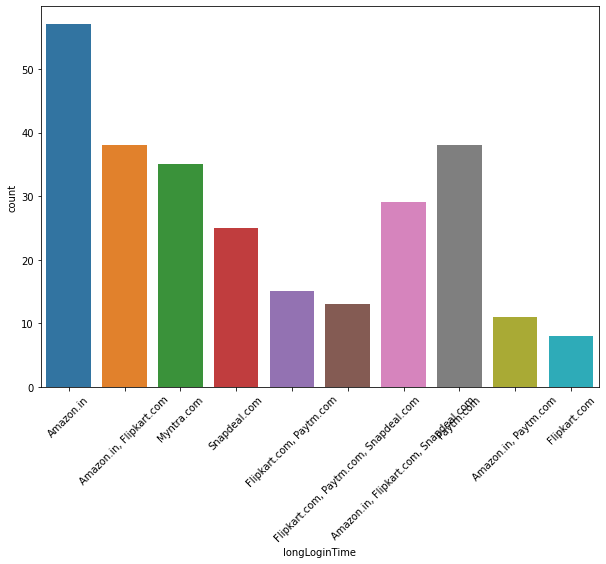

_________________________________________________________--
Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Paytm.com                              15
Flipkart.com                           15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: longDisplayTime, dtype: int64


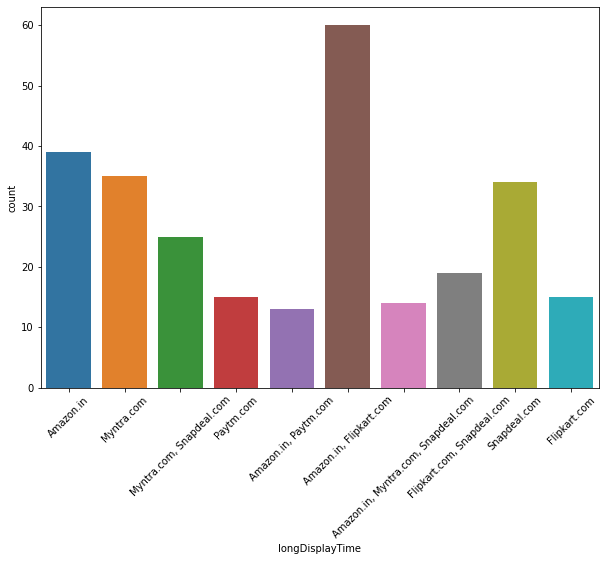

_________________________________________________________--
Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Amazon.in                  38
Flipkart.com               38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: latePriceDeclare, dtype: int64


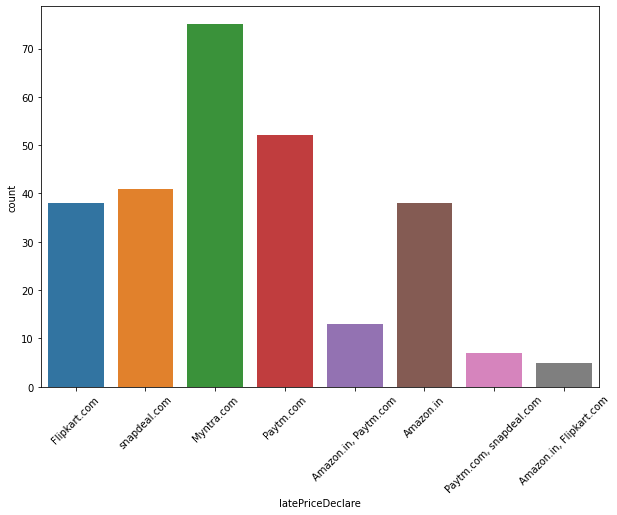

_________________________________________________________--
Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: longLoadingTime, dtype: int64


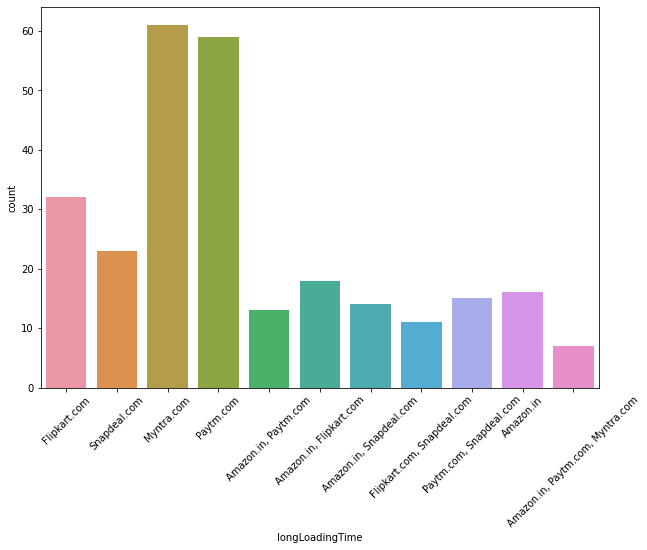

_________________________________________________________--
Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: limitedPaymentMode, dtype: int64


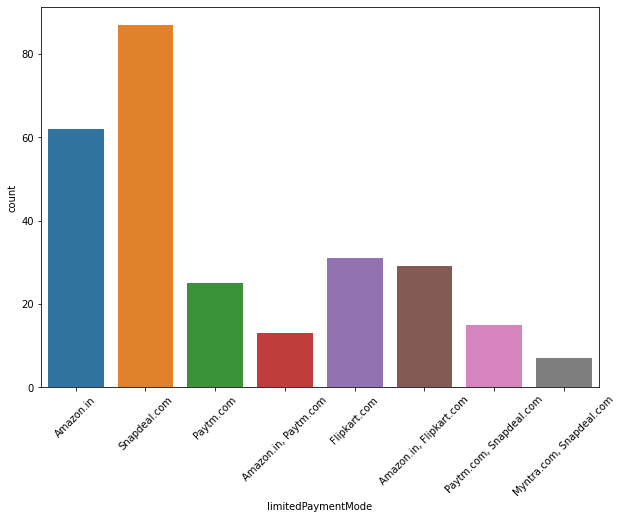

_________________________________________________________--
Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Myntra.com                 26
Paytm.com, Snapdeal.com    26
Name: lateDelivery, dtype: int64


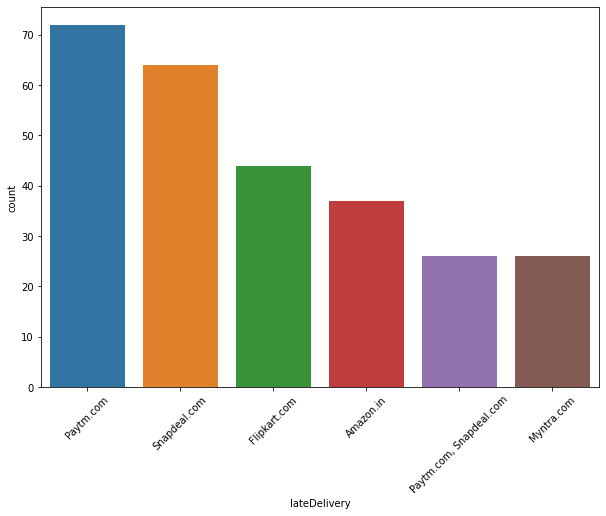

_________________________________________________________--
Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: webAppDesignChange, dtype: int64


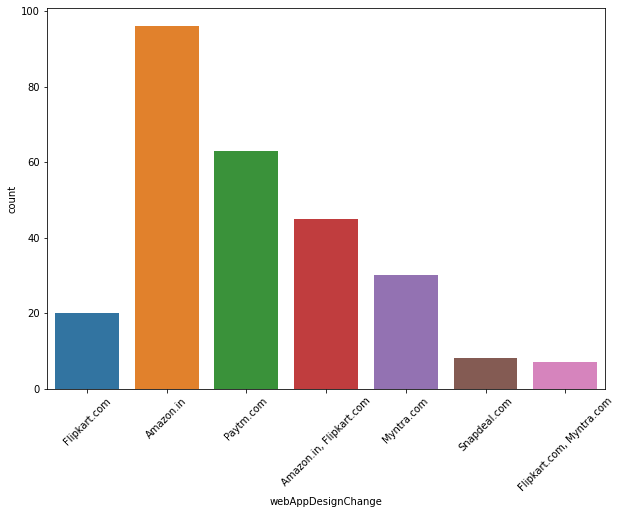

_________________________________________________________--
Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: pageDisruption, dtype: int64


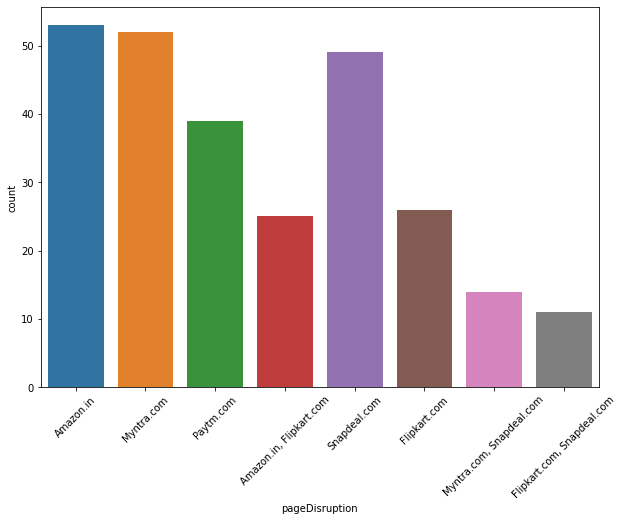

_________________________________________________________--
Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: webAppEfficiency, dtype: int64


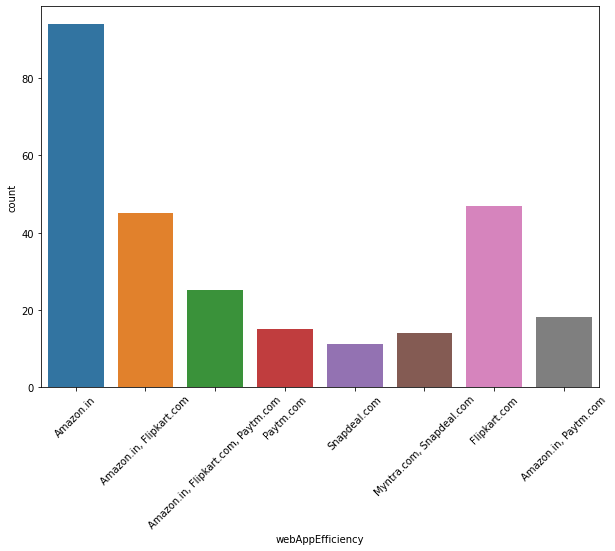

_________________________________________________________--
Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: recommendation, dtype: int64


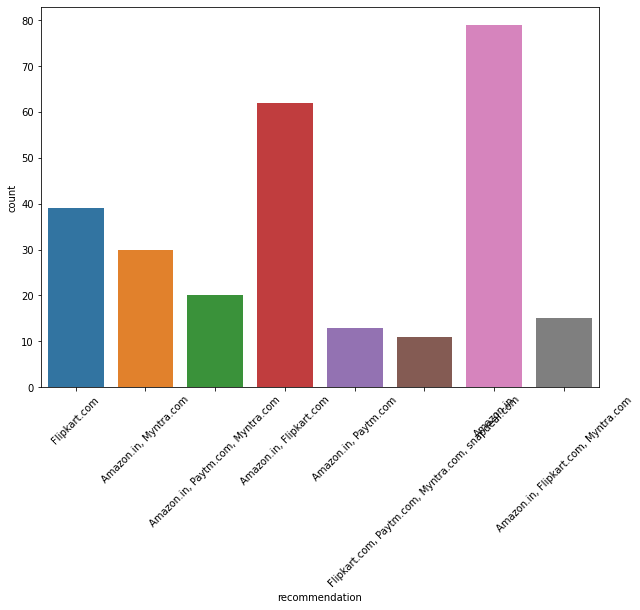

_________________________________________________________--


In [10]:
for column in df:
    print(df[column].value_counts())
    plt.figure(figsize=(10,7))
    sns.countplot(x=df[column])
    plt.xticks(rotation=45)
    plt.show()
    print("_________________________________________________________--")

## **INFERENCE FROM ALL THE ABOVE ANALYSIS:**

1. Maximum people have shopped from these 5 companies - Amazon.in Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com.

2. Amazon.com and Flipkart.com are the major choices of the customer.

3. In terms of Visual appealing web-page layout also, Amazon.com and Flipkart.com seem to take the lead.

4. Talking about Wide variety of product on offer: Amazon.com and Flipkart.com are the major choices.

5. Maximum people have chosen to go with mazon.com and Flipkart.com based on relevant description information of products.

6. Amazon have high score when it comes to Fast loading website, although paytm and Flipkart are not far behind.

7. Also Amazon have high score when it comes to Reliability of the website, although Flipkart and paytm are not far behind.

8. Amazon  take the lead when it comes to Quickness in choosing product, Flipkart and paytm falls next to amazon.

9. Both Amazon and Flipkart are best in several payment options. Although a lot of people also like to try Myntra.

10. Amazon seems to take the lead in Speedy order delivery, followed by Flipkart.

11. Amazon has a good reputation for maintaining privacy, followed by Flipkart

12. Amazon and Flipkart both having good Trustworthiness. Although Myntra.com and Snapdeal.com are also good in Trustworthiness.

13. Amazon.in, Flipkart.com, Myntra.com, Snapdeal provied best online assistance through multi-channel.

14. Amazon.in, Flipkart.com takes longer than ussula Longer time in displaying graphics and photos.

15. Myntra, Paytm, Snapdeal. These companies should work on Late declaration of price.

16. Myntra and Paytm have bad feedback in Longer page loading time. Flipkart should also have a look into it, as it is at the 3rd place.

17. Snapdeal is the most voted answer for mode of payment.

18. Paytm and Snapdeal takes more time to delivery their product.

19. Amazon.in needs to concentrate in Frequent disruption when moving from one page to another.

20. Which of the Indian online retailer would you recommend to a friend?: Amazon/Flipkart

